In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [2]:
# %timeit sirve para evaluar el tiempo de ejecucion
df_vistas = pd.read_csv("fiuba_3_vistas.csv")
df_postulaciones = pd.read_csv("fiuba_4_postulaciones.csv")

# Análisis del tiempo entre la vista y la postulación
A partir del siguiente análisis se propone realizar un análisis del tiempo que transcurre entre que un postulante ve por primera vez un aviso, y el que pasa hasta que se postula al mismo.

In [3]:
df_postulaciones['fechapostulacion'] = pd.to_datetime(df_postulaciones['fechapostulacion'], errors='coerce')

Unifico para que tanto las vistas como las postulaciones esten en el mismo tipo de datos, para poder calcular el delta entre el momento en que se postula, con la primera vez que vio el aviso

In [4]:
df_vistas['timestamp1'] = pd.to_datetime(df_vistas['timestamp'], errors='coerce')

Remuevo aquellos en los que se accede a la vista una vez postulado

In [5]:
aux = pd.merge(df_vistas,df_postulaciones,left_on=['idAviso','idpostulante'],right_on=['idaviso','idpostulante'],how='inner')
temp = aux[aux["timestamp1"]<aux["fechapostulacion"]]

In [6]:
temp["delta"] = (temp['fechapostulacion']-temp['timestamp1']).dt.round('5min')
tmp = temp.drop_duplicates(['idpostulante','idaviso'],keep='first').groupby('delta').size()
tmp = tmp.to_frame()
tmp.reset_index(inplace=True)

/home/marcelo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<Figure size 2880x720 with 0 Axes>

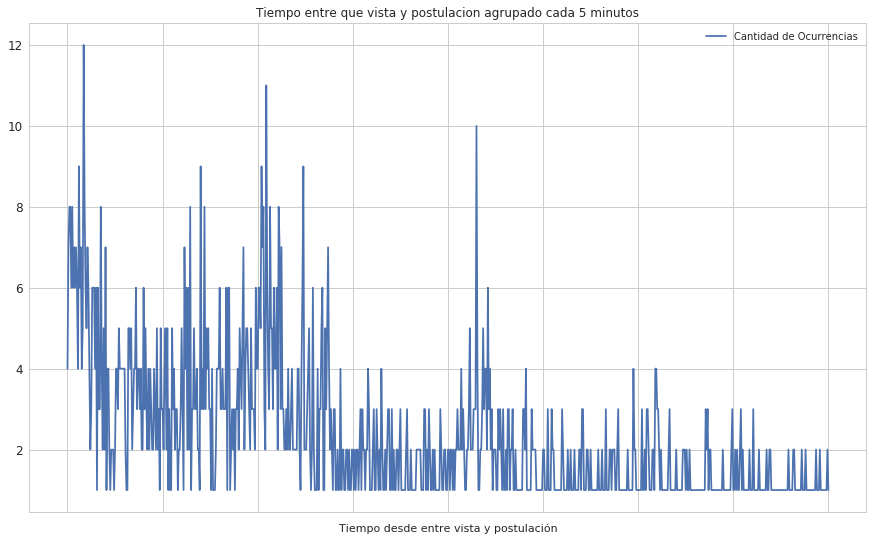

In [7]:
plt.figure(figsize = (40,10))
tmp.columns = [ 'Tiempo desde entre vista y postulación','Cantidad de Ocurrencias']
tmp.plot(x="Tiempo desde entre vista y postulación",y="Cantidad de Ocurrencias", title ="Tiempo entre que vista y postulacion agrupado cada 5 minutos", figsize=(15, 10), legend=True, fontsize=12)

# Conclusión
Se puede observar que inicialmente, el tiempo que se tarda entre el ver el aviso, y postularse es corto. Y conforme pasan los intervalos de tiempo, disminuye la cantidad de personas que esperaron tanto para postularse desde la primera vez que vio el aviso

# Tiempo de Vida de un aviso
Para evaluar el tiempo de publicación de un aviso, como no contamos con información sobre la fecha de publlicación y baja de la misma, lo que haremos es comparar la diferencia entre la primera y la ultima vez que se accedio a ver un aviso

In [8]:
df_agrupar_vistas = df_vistas.groupby('idAviso').agg({'timestamp1' : [np.min, np.max]})
df_agrupar_vistas["delta"] = (df_agrupar_vistas.timestamp1.amax-df_agrupar_vistas.timestamp1.amin).dt.round('60min')

Como lo que estoy buscando evaluar es el tiempo entre la primer y ultima visita, retiro todos aquellos valores donde el delta me da 0(cero).

In [9]:
tmp = df_agrupar_vistas[df_agrupar_vistas["delta"].dt.total_seconds()>0].groupby('delta').size()
tmp = data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA2kAAAIdCAYAAACnTDXFAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJzs3Xm8JFV5//Fv33tnhmWGXVAW2SQHHVDg4hoTCaA/XIi4EFeEJGIUIcQohCAIIrjFoFFQQYQgmyAMILsgYREFhovMADLFOjAMMPvGrHep3x9V1X2quqq7qru6u7r78369YHqprqquqr59nn7OeU7JdV0BAAAAAIphoNM7AAAAAACoIEgDAAAAgAIhSAMAAACAAiFIAwAAAIACIUgDAAAAgAIhSAMAAACAAiFIA5DIGHOyMeaCTu8HsjPG/NwYc2qn96NojDG7GGNcY8xQk+u5xRhzZF771QuMMacbYy7t8D7cZYz5fCf3IY4x5nFjzAGd3g8A3aOpLykA3c0Y86p1dxNJ6yWN+/f/xXGcb7d/r9rHbzRd6jjOjp3el7w5jvPFNMsZY+ZK+rzjOHe0dIdaxBhzuqQ3OI7z2XZu13Gc97dze2g9/7OwnSp/A//oOM778li34zjT81hPL//NAhBGkAb0Mcdxpga3u72x3irGmCHHccY6vR9AVly7DTmUv4EAioAgDUCiaJbCGPMOSWdLepOk5yUd7zjOXf5zd0n6g6QDJb1Z0v9JOkrSjyUdKsmRdLjjOHP95V1Jx0v6N0mbSbpI0n84jjNhjBmQdLKkoyVtLOlWScc5jrMiYT8/JOlMSbtI+oukLzqOM9t/bq6kcyR9TtLO/rqOlDQo6RZJU6yM4l9J+oKkvSStk/T3kv7dGHOhpBP9/dlC0u/9bSxN2J8TJP27JFfSKZJ+KWkPx3Ge9o/TpY7jXOAve5S84Pjd/v09Jf1E0rCkRZJOdRznqphtfELSCY7j7G899hVJf+c4zt8bY/5X0ouO45xijNlG0v9KerekCUmPS3qPpIslvV7SDcaYcUlnOI7zfWPMbyT9jX/sZ0n6kuM4j8fsw+GSTnIcZ9h67N8lvcdxnA/HLH+XpD9JOkjSnvKukX8MjqMx5u8lfUfSDpIe8bf7hP/cf0j6V3nXykuSjpE0Sd51UjLGHCbpGcdx3hL9waFWts0Y84/yzu2O/vH+nuM451nPf1jSNyXt5j//ZcdxbrXPY63r1Rizi6Tn5H0WviUvY/1Dx3HOiu6Lv70PyruWd5e0QtIvHcc53Xr+c/56pkr6kaR/Dt6r/z6j1+675V8H/usPkJWJ8Y/VeZKOkPQ6Sdf5x32dMWZLSZdIeru89sJ98q77F/3X7irvutpP0v3yPuP2e0k8nzHve7r/foYljUr6H8dxvm2MeZuk/5H0RklrJV0j6d8dx9ngv+698j4vr/P3tWStc3dJv5D0Fnmfxdvknb/lcfuQhf/5WiNpV3mflVmSPibpJHl/XxZI+pTjOH/2l5+r8Hl6k7zz9BFJL0g60nGch/xlXfl/L6xtvSjvWMb9zVoi6XuS/sF/7Cp5f0vXJ332HceZaPYYAGgtxqQBSMUYs4Okm+Q1ILeS9DVJ1xhjXmMt9kl5jb0d5DUy/yQv+NpK0hOSTous9iOS9pfXyPuwpH/yHz/K/+/v5DWOp8oLtOL2a19JF0r6F0lby2tw/tYYM8Va7B8kHSKvQfVmSUc5jrNa0vslveQ4zlT/v5f85T8s6Wp5Adllko6TdJi8wGZ7ScsknZuwP4f4x+a9kvaQdHDccgmv3VTS7ZIul7StvOP5U2PMm2IWv8F7idnDeuzT/mujviqvkfcaed25TpbkOo5zhLwG4qH++/++v/wt/r5vK+lheccgzm8l7WqMeaP12BGSflXjbX5O3nl+naQxeUG8jDF/JekKeUH7ayTdLC94nGyMMZKOlfRWx3GmSfp/kuY6jnOrpG9LutLf/7fU2G6ShZI+JC/4+0dJPzTG7Ofv09v893KCvGvhbyXNjVnHUap/vb5bkpEXoH4jcsxsq+Udoy0kfVDSl/wAVP518FNJn5F3/DaX91mzRa/dND4j75juLq/Rf4r/+IC8z+/O8oL5tZH3dbmkEUnbyAscy2P0ap3P6MaNMdMk3SEvuN1e0hvk/RAieV0Pv+Jv453yjt8x/uu2kTTD399tJD0j6a+tVZfkBTbbywvydpJ0ep1jcZkxZpEx5nfGmHrX0z9Y214v7+/dw/79q+X9oJXk7yX9Wt55+q0S/r7ZavzN+rqkd0jaR15A+jZVzmHsZ7/etgB0Hpk0AGl9VtLNjuPc7N+/3RjzkKQPyMvISNJFjuM8I3mFFSS9ycpm/EZeQ872PT+LstQY8yNJn5J0gbxG49mO4zzrv/Y/JT1mjPnHmO5bX5B0nuM4D/j3LzbGnCyv0XK3/9iPgwDMGHODvMZMLX9yHOc6//ZaY8wXJR1rZRBOl/SCMeaImP35B/84PGYt+6k62wt8SF7wcZF//8/GmGskHS4vm1PmOM4aY8z1/rrP8IO1PeU1+KJG5TXqd/Z/nb+31k44jnNhcNvf/2XGmM2jmUz/l/or5V0bX/ezIbtIurHG6i+xjs2pkh7xC3B8QtJNjuPc7j/3A3mZ1nfJa2ROkfQmY8yiIBubB8dxbrLu3m2M+Z28zMjD8rJUFwb7JGl+wmoSr1drmW86jrNW0ixjzCx5jemqrFKQmfbNNsZcIe/HgeskfVzSDY7j/MHfzjfkZRdt0Ws3+c1XnOM4zjx/nWfJy0yd4jjOEnmZK1nP/Z9/+/WS3irpYMdx1ku6x/9sBWqdT/s9St51/4rjOP/t318n6QH/eIxYy801xpznH48fyfvb87jjOFf72/iRvKBE/muflvS0f3eRMeZsVf9QZPuMvPNe8vf1NmPMnjUyb9cG+2eMuVbSMY7j/Mq/f6W8HxaS/CH4W2qMuUReMNuoz8jL3C701/dNeT9WnaqMn30AxUGQBiCtnSUdbow51HpskvxGm2+BdXttzP2pCptn3X5e3i/e8v99PvLckLxfgqMN5Z0lHWmMOc56bLK1Lkl6xbq9JvJcnHmR+ztLutYYY3cRGk/Yn+3lZRfsfU9rZ0lvN8bYjcIhed244lwu6b8lnSEvi3ad4zhrYpb7L3kZhN/5jfbzHcf5btwKjTGDks6SFxi+Rl4XKcnLDsR1N71Y0hXGmFPkZdGu8hvtSaLnfJK/7tA597u9zpO0g+M4dxlj/s1/D9ONMbfJ6/L2kppkjHm/vIb7X8nLHG0i6VH/6Z3kZYDqqXW9BqLXYPSzEOzP2yV9V163xcnygtPfWNspHz8/UF8SWUX02k0j9nNojNlE0g/lZaG39J+f5l8j20ta5md37NfuZO1r7PmM2f5O8rJgVfyM3NnyMu6byDuuwecrejxcfxvBa7eT11XybyRNk3d+l8UeAe/191l3v+P/ePA38rLWcbL+vbNFr4eNTONjCOOuv+BvXOrPPoBiIUgDkNY8eVmQo3Nc507yxkhIXneqoNH9kryARdZzYwo3guz9OitpjE8dSd1+oo/Pk/RPkUZckpdVaahK3r7bVstrbAZeG9nO3Y7jvDfFdiSva+RrjDH7yMuofSVuIcdxVsnLMHzVGLOXpDuNMTMdx/m9qt/rp+V1mTtYXte+zeU1bEuK4TjO/caYDfIas5/2/6slemxGJS2Wd873Dp4wxpT8Zef727lc0uXGmM3kZQm+Jy8ojDuHtY5xmd8l9hp53Quvdxxn1BhznfVe58nrAlhPres1axW+y+V1fXu/Py7sR/KCWMm7tsqpMWPMxvK6+NqixyPNsYiek+Bz+FV/e293HOcV/zr7s7zj87KkLY0xm1qB2uut7dc8nxHz5HXtjfMzf5ufchxnlR+sf9x/LvRZs7YR+La/P3s7jrPU7zZat1uhxVXCdd9ia1R9zl70b8dd78H1V/W3tM5nH0CBEaQBSOtSSTONMf9P3viRSfK6FD4ddANswAnGmAfk/eJ8vCpjOK6Q9B9+l8lFqow7ivuV+Rfyslx3SHpQXuPmAEn3+A2UWhZI2jquK1/EzyWdZYw50nGc5/1xeO9yHOf6mGWvknSRMeZX8oKcaPeqRyR91Hjzz20vr0tdEHzeKOm7xpgj5I1Xkbyuma/GFVzwg4rfyPu1fCt5QVsV4xVWmSMvW7FCXhYwyJAtkDeOKjBN3viaJfKOZZppGH4lr/E7GnTFq+Gz1rE5Q9LVjuOMG2OuknSSMeYgSffIux7WS/qjPyZtB3mFK9bJy1IMWvv/XmPMgFUM4RFJn/Svn7fIa9TfGrMvQaZqkaQxP6v2PkmP+c//Ul4G4kZ5GePXSZrmOM6cyHoSr9eU3Q1t0yQt9QO0t8kLen/nP3e1pPuNMe+S9JC8DEm9IOIReQ30M/33G9et7sv+e1wjb3zTlda+rJW03Bizlaxr2f8cPCTpm3734rfJKxAUdLdNPJ8x279R0tl+APYzfz/f5HdhniZppaRXjVdU50vyjrHkjZE9xxjzUX+7X1Y4CJ0m73pfYbwxtSckHSS/++ZOkmbKy7gdJy84TvPDTN4ekfRpY8zj8sa2vkfe+Zbi/2ZdIekUY8xMeUHcN+T9va732QdQYBQOAZCKP2blw/IGni+S9+v3CWru78j18rouPSKvwfVL//EL5XXxu0deZbx18hpNcfv1kLyqeufIy/g8La+IQ11+Y/sKSc8aY5YbY5K6Qf6PvEbg74wxq+RVsnt7wjpvkTde5k5/X+6MLPJDSRvkNbYullXcwQ8q3ycvq/CSvC5R35MXSCS5XF7W6zc1ukrtIS+wflVecYOfOo4TdFP9jrwG3nJjzNfkBVzPy8t4/MV/r/VcIq97XpqJjC+RV23uFUkbyR9T5TiOI29s20/kZdYOlVfQZIO89/9d//FX5BU0+U9/fUFXwCXGmIf926fKy4AtkzeWL66YSnC8/1VeQLFMXkD0W+v5B+UXE5HXwL1b4YxZIPX1msIx8sYYrpLX2C5X9nS8CpvHyQvgX5Z3PhfKC36SXCKv8uBcecHelTHLXO4/96y8xvyZ/uM/kletcrG86yAa6H5a3udgqbwArlwwps75DPHPw3v9ZV6R9JS8IiySV4Tn05JWyftB5krrdYvldcv9rrwfFfZQOKj6pryiRCvk/X2ZEfPeA9PkBYjL5F37h8jLZka7k7bD8fKOxXJ5482CMYZJf7POlBfEzZbXVfdhVc5hrc8+gAIruS5FfgC0n4mUme5lvf5e/W53CyXt5zjOUzWWu0vW9ANojjFmqryG/B6O4zzX4DrmivkRAaBw6O4IAGjWlyTNrBWgIR9+4Z7fy+vm+AN5mZO5ndwnAED+CNIAAA3zMzElefPIofU+rMqkzQ9J+qTjOHSJAYAeQ3dHAAAAACgQCocAAAAAQIEQpAEAAABAgXRkTNrIyAh9LAEAAAD0teHh4dj5LjtWOGR4eLhTm040MjJSyP3qFxz/zuHYdw7HvnM49p3Dse8cjn3ncOw7p6jHfmRkJPE5ujsCAAAAQIEQpAEAAABAgRCkAQAAAECBEKQBAAAAQIEQpAEAAABAgRCkAQAAAECBEKQBAAAAQIEQpAEAAABtsmjRIn3lK1/RwQcfrI9+9KM6+uij9dxzzzW0rhkzZmjBggXl+1//+tf19NNPxy53xhlnZFr3gQceqKVLl9bdftb1PvTQQ/r4xz+uQw45RIcccoiuvPLKTK/vhN///vc6//zz27rNjk1mDQAAAPQT13V17LHH6rDDDtMPf/hDSdKcOXO0ZMkS7brrrpnXd+2112qPPfbQdtttJ0k666yzct3fvC1atEhf+9rXdO6552r69OlaunSpPv/5z2u77bbTAQcc0NS6x8bGNDQ0lHi/GQcddJAOOuigXNaVFkEaAAAA0Ab333+/hoaG9KlPfar82J577ilJWr16tY455hitXLlSY2NjOv7443XwwQfrxRdf1NFHH63h4WH9+c9/1nbbbaef/vSnuuuuu/TYY4/pa1/7mjbaaCNdeeWVOvroo3XiiSdq77331jXXXKPzzz9f06ZN05577qnJkydLku6880797Gc/0+joqLbYYgv94Ac/0DbbbKNly5bpq1/9qhYsWKB99tlHruvGvoek9S5dulSnnXaaXnrpJUnSySefrOHh4dBrL7vsMn3kIx/R9OnTJUlbbbWVTjjhBP3kJz/RAQccoMWLF+u0007TvHnzJEmnn366tt12W33xi1/UjTfeKEn65S9/qTVr1ui4447TEUccoT333FMjIyP60Ic+pCeffFKTJ0/WE088of3220/HH3+8vvWtb+mRRx7RlClTdOyxx+rggw/WjBkzdOedd2rt2rWaN2+eDj74YJ144omSpHvuuUc//OEPNT4+ri233FIXX3yxZsyYoccee0zf+MY3Eo/fgw8+WA6SS6WSLr30Uk2dOrXha4UgDQAAAH3nwhse132z5ue6zr9+yw76p0OnJz7/1FNPlQOUqClTpujcc8/V1KlTtXTpUn3iE58oZ2+ef/55nX322TrzzDN1/PHH67bbbtOHP/xhXXbZZeWgzLZw4UL95Cc/0YwZMzR16lR97nOf05ve9CZJ0vDwsK666iqVSiX95je/0QUXXKCTTjpJ5557rvbbbz8de+yxuuuuu3T11VdX7WOt9Z511lk68sgjtf/+++ull17SP//zP+uWW24Jvf7pp5/WYYcdFnpsr732KnfRPPPMM/XWt75V5557rsbHx7VmzRqtWLGi1iHX6OioZsyYIUk66aSTtGDBAv3617/W4OCgzj77bL3jHe/Qxz/+ce2xxx46/PDD9a53vUuS9MQTT+i6667T5MmTdcghh+iII47QlClTdOqpp+rSSy/VTjvtpOXLl1dtL+n4XXjhhfrGN76h4eFhrV69WlOmTKm53/UQpAEAAAAd5rquzj77bM2cOVMDAwNasGCBFi9eLEnacccd9cY3vlGSNH36dM2fXzu4nD17tt72trdpq622kiR94AMf0Ny5cyVJr7zyir7yla9o0aJF2rBhg3bccUdJ0syZM3XOOedIkg444ABtvvnmmdb7xz/+MTQe7tVXX9Xq1au16aabpj4G999/v77//e9LkgYHBzVt2rS6QdoHPvCB0P1DDjlEg4ODkqQ//OEPuvPOO7VhwwZtvPHGWr9+vV5++WVJ0jvf+U5NmzZNkrT77rtr/vz5Wrlypfbff3/ttNNOkqQtttiiantJx2+//fbTd7/7XR166KF63/vel+l9xyFIAwAAQN/5p0On18x6tcIee+yh2267Lfa5G264QUuXLtWMGTM0adIkHXjggVq/fr0klbsUSl7wEjzeiDPPPFNHHXWUDjroID3wwAPlwKxZExMTuuqqq2pmkHbffXc9/vjjOvjgg8uPPfbYY3rDG96Q+JqhoSFNTEyU70ff+8Ybb1zz/o9//GMtW7Ys1PVy1qxZVcd0fHw8cR9sScfvC1/4gt7znvfo7rvv1qc+9SldcMEF2n333VOtMw7VHQEAAIA2eMc73qENGzaEKhrOmTNHDz30kFatWqWtt95akyZN0v333183WyZJm266qVavXl31+Jvf/GbNnDlTy5Yt0+joqG699dbyc6tWrSoXGrnuuuvKj7/1rW/VDTfcIEm6++67YzNYtdb77ne/W5dcckn5/hNPPFH1+s985jO69tpry88tW7ZMP/jBD/T5z39ekpfduvzyyyVJ4+Pj5WOyZMkSLVu2TBs2bNBdd91V97jY+3TppZeWx9f95S9/qbn8Pvvso4ceeqg8Ji6uu2PS8XvhhRdkjNEXvvAF7b333g1X7AyQSQMAAADaoFQq6ZxzztG3v/1t/eIXv9CUKVO0ww476OSTT9ahhx6qL33pSzr00EO11157abfddqu7vo985CM67bTTyoVDAttuu62OPfZYffKTn9S0adPKXSUl6dhjj9Xxxx+vzTffXG9/+9v14osvSpK+/OUv66tf/ao++MEPat9999X2229ftb1a6/3617+uM844Q4ceeqjGx8e1//77V5Xn33bbbfVf//VfOuWUU7R69Wq5rqsjjzxSBx54YHkdp556qq655hoNDAzo9NNP17777qsvf/nLOvzww7XddtulOi6BY445Rt/+9rd10kknacqUKdpxxx113nnnJS6/1VZb6YwzztBxxx2niYkJbb311rroootCyyQdv4svvlgPPPCASqWS9thjD/3t3/5t6v2MU0qq3NJKIyMjbrTaSxGMjIxUVaFB+3D8O4dj3zkc+87h2HcOx75zOPadw7HvnKIee3+/SnHPpcqkGWOOlXSUpL0lXeE4zlH+4++Q9C1Jw5LGJd0l6V8dx3m56b0GAAAAgD6UdkzaS5LOlHRh5PEtJZ0vaRdJO0taJekiAQAAAAAakiqT5jjODEkyxuwvaUfr8dDkB8aYcyTdnecOAgAAAEA/ybu6499KejzndXaFlas36F++c4f+OPulTu8KAAAAgC6WqXCIMeZMSTsGY9Iiz71Z3pi0DzuOc2+t9YyMjLS/WkmLPeC8qltGvDKdp396xzpLAwAAAOh3TRUOqccY8wZJt0g6vl6AZu1QHpvOVTOVX15e+6zkB2lFfG/doKiVd/oBx75zOPadw7HvHI5953DsO4dj3zlFPfYjIyOJzzXd3dEYs7OkOyR9y3GcS+ot36tiQ2AAAAAAyChtCf4hf9lBSYPGmI0kjUnaTtKdks5xHOfnLdtLAAAAAOgTabs7niLpNOv+ZyV9U5IraTdJpxtjTg+edBxnal472DVK5NIAAAAANC9tCf7TJZ2e8PQ389oZAAAAAOh3eZfg71sk0gAAAADkgSAtJ8RoAAAAAPJAkJYXUmkAAAAAckCQBgAAAAAFQpCWE/JoAAAAAPJAkAYAAAAABUKQlhOGpAEAAADIA0EaAAAAABQIQVpuSKUBAAAAaB5BWk7o7ggAAAAgDwRpOSFGAwAAAJAHgjQAAAAAKBCCtJzQ3REAAABAHgjSAAAAAKBACNJyQyoNAAAAQPMI0nJCd0cAAAAAeSBIywlBGgAAAIA8EKQBAAAAQIEQpOWGVBoAAACA5hGkAQAAAECBEKTlhDFpAAAAAPJAkAYAAAAABUKQlhMSaQAAAADyQJCWF/o7AgAAAMgBQVpOCNEAAAAA5IEgDQAAAAAKhCAtJ/R2BAAAAJAHgjQAAAAAKBCCtJyUGJUGAAAAIAcEaXkhRgMAAACQA4I0AAAAACgQgrS8uJ3eAQAAAAC9gCAtJy5RGgAAAIAcEKTlxCVGQ49asmKt7pv1Uqd3AwAAoG8QpOWEGA296t9+eLe++6uZevKFZZ3eFQAAgL5AkJYXUmnoUctXrZckLV25rsN7AgAA0B8I0gCkwu8QAAAA7UGQlhPar+h9XOUAAADtQJCWE7IMAAAAAPJAkJYbojT0Nn6IAAAAaA+CtJzQgAUAAACQB4K0nBCkoddxiQMAALQHQVpuaMKix3GJAwAAtAVBGgAAAAAUCEFaTujuCAAAACAPBGk5IUZDr3O5ygEAANqCIC0nZNLQ67jGAQAA2oMgLTe0YAEAAAA0jyAtJ2QZ0PO4xgEAANqCIC0ntF8BAAAA5IEgDUAqFA4BAABoD4K0vNDfET2OSxwAAKA9CNJyQvsVAAAAQB4I0nJClgEAAABAHgjS8kKUhh7HFQ4AANAeBGk5oQGLnscPEQAAAG1BkJYT2q8AAAAA8kCQBiAVfocAAABoD4K0nDCHFAAAAIA8EKTlhRgNAAAAQA4I0nJCjIZex7hLAACA9iBIywkNWPQ+LnIAAIB2IEjLDQ1YAAAAAM0jSMsJmTT0Oq5xAACA9iBIAwAAAIACIUjLCVkG9DqucQAAgPYgSMsNLVj0Oq5xAACAdiBIywlZBgAAAAB5IEjLCTEaAAAAgDwQpOXEJZWGHsclDgAA0B4EaQBSIUYDAABoj6E0CxljjpV0lKS9JV3hOM5R1nMHSTpX0uslPSDpKMdxns99TwEAAACgD6TNpL0k6UxJF9oPGmO2kTRD0qmStpL0kKQr89zBbmF3BaPrI3oRlzUAAEB7pArSHMeZ4TjOdZKWRJ76qKTHHcf5jeM46ySdLuktxpg9893N4nOtzmA0ZgEAAAA0qtkxadMlzQruOI6zWtIz/uP9xY29CQCAnOeX6shv3qZnXlze6V0BAHSBVGPSapgqaVHksRWSptV74cjISJObbo1G92v+/JWhdQwOlPLapb5S1OuiH9Q79s8/P1cjkxa3aW/6C9d957Tr2I88/aqWrlynu++freW7btqWbRYd133ncOw7h2PfOd127JsN0l6VtFnksc0krar3wuHh4SY3nb+RkZGG9+vJJY70qBeo7bvvfpo0ROHMrJo5/mhOzWN/+YuSpNe/fmcND+/Svp3qE1z3ndPOY79ow1zpweXaZZddNDz8+rZss8i47juHY985HPvOKeqxrxU4NhtJPC7pLcEdY8ymknb3H+8vrj0mjQ6PAICK4FuBrwcAQBppS/AP+csOSho0xmwkaUzStZL+yxjzMUk3SfqGpNmO48xp0f52Bb6D0Yu4roEm+NEZQRoAII20mbRTJK2VdJKkz/q3T3EcZ5Gkj0k6S9IySW+X9MkW7Gfh2d+77gTfwgCACjfmFgAASVJl0hzHOV1eef245+6Q1Hcl96Ncqjui15ECABoWfHz4GAEA0qC6RU7C86TxLYzew1UNNCHo7tjh3QAAdAeCtLzYmTS+hQEAMfh+AACkQZCWk9CYNL6FAQAWxqQBALIgSMuJHZjxFYxexG8PQOMYkwYAyIIgrQUmqO6IXkTrEmhYMG6ZTxEAIA2CNAAAWo3ZrAEAGRCk5cT+3p3gSxg9iKsaaJwb+RcAgFoI0nLiMlEaACABY9IAAFkQpLUAmTT0Ii5roBlEaQCA9AjScsL3LnqdS4oYaBqfIgBAGgRpObG/eCcmOrYbAIACorsjACALgrQWIOMAALCVgzS+HwAAKRCk5SQ0mTXfwehFXNdAE9zQPwAA1EKQ1gIuURp6EFc10DiXGA0AkAFBWk5CFfj5FkYP4scHoHHMZQ0AyIIgLSf2OAPGHKAX0bgEGlf5kYMPEgCgPoK0vJBJQ4/jugaax+ejq1jSAAAgAElEQVQIAJAGQVpO7O9duoWhN3FdA83i6wEAkAZBWgvwJYxexHUNNK7y+eGDBACojyAtJ+ES/HwJo/dMcF0DDQvGKvMxAgCkQZCWF8akAQCSUIIfAJABQVpO3ITbQK/gxwegcZUS/HyQAAD1EaTlhO6O6HVMLQE0jq8FAEAWBGk5CVd37NhuAK3DdQ00je8HAEAaBGl5sb54KbCAXjTBZQ00zv9eICMNAEiDIK0V+A5GL+LHB6BhVOAHAGRBkJYT+3uXTBp6EVc10DiX6o4AgAwI0nJCsRD0Oi5xoHHMkwYAyIIgrQXIpKEXMZYGaEKlBn9HdwMA0B0I0nIS+t7lOxg9iLYl0Dg38i8AALUQpOXE7u5IJg29iC69QPP4GAEA0iBIawG+hAEANpcS/ACADAjSWoCMA3oRlzWQAz5HAIAUCNIa9KdHX9ac55eW79sNWL6De8P4hKsb//CsFi9f2+ldaZt168f023uf0atrR6ueK9KPD0tXrtMN9z6r8fGJTu8KkAol+AEAWRCkNejb//ugTvjxveX7dheWIjVm0bj7Zs3Xedc+qpN/dl+nd6VtLr11jn5x3WP6+TWzq54r0mV9xi/v1/nXPao7Zr7Q6V0BUil3dyzSBwkAUFgEaTkJZdL4cb8nLF25XpL08uLVHd6T9gne6wsLVlY9V6Sm5TMvrpAkLVmxrsN7AgAAkD+CtBZgYDi6Vank/Rv3Y38RMwClTu8AkFK5u2PxPkYAgAIiSMtJuAR/B3cEaEIlSOuSi7hEmIbu0jWfLQBARxGk5cRNvINu1Y/t/5L/puMu4SLO/zfQh+cI3al4nx4AQJERpOXF+gYuYmMWSKNWd8dCtjIJ0tAlKoVDOrwjAICuQJAGoKzkRz1xXbKK2LYsEaWhyxTxcwQAKB6CtAbENmDJpKEHdF3hEGI0dIlK4ZDifY4AAMVDkNaA2Aas/fso38E9oR/b/+UxafEXOYAGUfUXAJAFQVoDYr9qyaShB5QzaTHPFfG6LpFKQ7egBD8AIAOCtEbUGa/DlzC6VfeNSQO6Cxk1AEAaBGkNiC18ZzVqGXOAblXy/yJ0S3VHMmnoFm7VDQAAkhGkNaBeloHv4B7Rh+3/4C13TSatD88RulO5BH+H9wMA0B0I0hpQL1FGJg3dqtZk1kW8rgnS0DWo7ggAyIAgrQH1CofwHYxuVS4cMuFWP1bI65ooDd2B7o4AgCwI0hoQ3xWMMWnofgMxmbRaXSA7jUwaugXdHQEAWRCkNSJ2ot/42+hepT7O0hQxIIvTv2cI3Sb4RHXLZwsA0FkEaQ2oN18UX8LoVgMDQQn+6ucKeVkTpaFbuKF/AACoiSAtJ6ES/B3cDyAPoYCs3AWyeFf2AP0d0W2K9zECABQQQVoD6mUZyKShWw3EBGSVMWkd2KE6CNHQLdzIvwAA1EKQ1oB6X7JFbMwiu35M0gTveWKi+rlC/vjQjycJXalcOKSInyMAQOEQpDWCMWnoUZXugzEl+Nu/O3URowEAgF5EkNaAibrdHdu3L0Cugkxa7GzWbd2TVIjR0C2C7wW+HwAAaRCkNaDePGmxDVygCwzEzlydXPGx40iloUvQ3REAkAVBWk7C37t8CfeCvmz+x2TSKnFb8a7rvjxHAACg5xGkNaBeW5VMGrpV3Jg0JT7SeSUyaegyBfytAwBQQARpDYibL8plUBp6SPy4y+Jd18Ro6BblMWmF/LkDAFA0BGkNIJOGXlWeJ83u7uj/W8TLmhgN3SIIzgr4WwcAoIAI0hpgZxTKg8HDC7R3h9AafZimqTn+rICXdR+eInQpvhYAAFkQpDWpnDVzYx4DukwpJpMWREIThWxlEqWhuxSx2zAAoHgI0hoQHn5WXVaZMQfodvb1XORsVZH3DbDF9roAACABQVoDYoO0hOeBblKrIVnEDABBGrqFW3UDAIBkBGkNsBurcd0dC9iWRQP6MQAoV6CLm7C9kNd1H54kdLVifo4AAEVDkNaAUNZsIsg8VBcTAbrNRLn7buUxwiAgB5TgBwBkQJDWgHAmrVsyDkBjgoxiMQuHFHGfgGpuTK8LAACSEKQ1qdI9zH6Mb2F0p1qBWBEv6yLuExCnPE9ah/cDANAdCNIaYDdkY8futHNn0DJ92c0v9uIt7pEgSEPXqDHeEwCAqKE8VmKM2UXSTyW9U9J6SVdL+jfHccbyWH/hxMyJRiYNvaB2Jq2I13UR9wmoRm9HAEAWeWXSfippoaTXSdpH0nskHZPTugsnXG4/rnBIm3cIyEvMtRuMSSvidV3EfQLilH/k4JoFAKSQV5C2q6SrHMdZ5zjOK5JulTQ9p3W33Zp1o9owOi5JGh+fqHo+rnBIXpm0uO0hf40e514/P3YmLXivQWdHe+L28Yna13ivHyegUVR3BACkkVeQ9iNJnzTGbGKM2UHS++UFal3nvtkv6RNfv1mfPOVm/eK6R3XkGbdp7fpwr81wQFa9jjrt10Rr14/psBNv0I9+/XBjK0Aql9zyhI7+zh0aqxdIRCZKe+TJhfrEKTfr6ReXt3DvOsu+dA878QbNmbu06rkTf3KvPn7SDYnrmL/oVR124g26+s6nWrOTFpq76Bbl7o5ctACAFHIZkybpHklfkLRS0qCkiyVdV+sFIyMjOW06X/c/7EiSRscmdO+fn9eKV8f1h/tHtNXUyqFauGK0fHvWrNnabJNBrVq1qvzY/PnzNTLyauZtv7JsgyTp9zPn6W/26M9v8nZcF7OeWKxFy9bpTw+MaJMpyb9TvPB85RyOjIzoAedVrd8wrvsefFQrFmzS8v1st5GRES1cuCz02K9veVhj415WeeXKlRoZGdGc55eVl4/zxye8z8LFN/1Fu26+soV7LM2d+7xGhha3dBvtUNS/h/2gXcd+2VLvc7Ns2TLOt4/j0Dkc+87h2HdOtx37poM0Y8yAvKzZ+ZLeJWmqpAslfU/SiUmvGx4ebnbTuRsZGdFrtt1OXqwpDQ5OkjSu6W+aru1fM7W83POvrJRuWiBJ2muvvfWaLTfWVX+6V1rkZR1e+9rXaXj4jZm3/9xLK6RbFkoq5vFptZGRkba875sfeUCa/4r22ectmrbJ5MTlFm6YK830smbDw8N6ac2z0shy7brrrhred8eW72c7Bcf+T88+Ij29uvz467bbVnPmv6j1o6OaNm2ad34uf1FS8jX60ppnpT8/WnOZpvn7sPPOr9fw8C6t2UabtOu6R7V2HvvfPfagNG+ttthiC863uO47iWPfORz7zinqsa8VOObR3XErSa+XdI7jOOsdx1ki6SJJH8hh3W03Nu5W3a4afxMz/szuwlLMSX8RKM9XlPE0Nfq6bhJ9b4ODA9aYtHTrGBpsX8n+Xj4X6C1xc2oCAJCk6SDNcZzFkp6T9CVjzJAxZgtJR0qa3ey6O8EepzTq344GXfa9uIBsotFBaWiLSmOp9nmqCjX6oDhb9JjYAVfaxuXgYPumX+zlcwEAAPpXXq2pj0o6RNIiSU9LGpX0lZzW3VZjY1aQ5t+OBl12QzauwV+v8h2600TK4K6bRd/awECpUoI/ZUjUzkwaaQl0i7heFwAAJMmlcIjjOI9IOiCPdXWanUkLblcHafbtYJ60Cro7FlvjjaXeb2RFA7GhwYHEblqu66pUqg7IBgfal0kDug0l+AEAadCaihi1grQgOKvq7hgzT5r9vdtod8e4Bi/yVy6FnbGxVDntvdvIqh6TlnxNJl3mQ3R3BKowJg0AkAVBWoTd3TFQlUmzb8fNk0Z3x2JzI/8miMbM/dDIqhqTNjBQPky1uv3aagV2eevlcwEAAPoXQVpE3ATHE9GHYio52lkZYrRia3xMWR90d4yp7pj0hpOOYzszaT19MtBT0hYsAgBAIkirYpfgD1RXd4wrHGItT5RWaCkTaVX6sXDI4IBd3TH8ZNJlPjDQxkxa27YENKc8hUeH9wMA0B0I0iJSdXesVzik0TFpDb0KmTUYbMWd614TV4I/Kah1C/BjRA/Hy+gxbqO/DgEA+hJBWsRobHfHGoVDJqpTaVR3LLb0BUPiw+ZePr3RtzZoVXeMPpl4nbfx+FApD92mlzPxAID8EKRFxI1JG68xmXVMccfGuzuSSmuLRguA9EN1x2jgZc95Vl3lNH4dBE5AMj4dAIA0CNIi4guHRCeIsp6LmXOLMWndIXOQ1geFQ+JbkPHdPJMyAm09Pr18LtBT3Lhf9AAASECQFhE7Jq1GBiGuoRrNvKFYKm2lxuZJ6+XuStFrfWLCHkuTrnBIOxVgF4BUGp2fEQDQnwjSItJk0uyGbNx4HTJpxZa2kZQ4T1rO+1Nsbswt/37G0vyt0MPxMnpNH8yzCADID0FaxGhcCf4aQVfsPGmNBml8ebdF2iprVY2pmK6tvSaukmlCIi2xcEh7D08Pnwz0lF7OwAMA8keQFpGuu2P8PGnB9FCNVnfkK7y96h/vhIIxfdTYcpXczTPxMLSzumP/nAp0uaQfOwAAiEOQFpGmu2OokqP1jTswMBC7fFr80toe5fnOMs+T5v+b9w4VSO3xl4o8R3dHILUGx8ICAPoTQVpE1uqOdoN/0C9X3niQ1tDLkFHa45wUlPTyPHix7znh/U5Uf1S81+S8T0Av6IvqsACA3BCkRaTp7hgqHOIv7koa9Ps7NtzdkW/vtqp3uKuGpCU90UOqujTK7qaV3O03/Hjl9njLi+j08MkAAAB9iyAtotF50iRpoBRk0hrbNs3N9ihnPzNWDqm8rndVvTf7B4nIU8k/RlQeH4/5POWJ3zXQLfphCg8AQH4I0iwTE27s3E/RdqbduLcLh5RKzWXSerr1XyDNHuZebmO5MeMvsxYOsR+P+9EjTz18KtCjevnvBwAgPwRplqA9OWkofFhqFVOoPOeqVJIGBkqNj0mjydkeaUvwR+/3QX/H+PccP5YmsbujdXs0pvtws8LVVXv3XKC3cKkCALIgSLOM+cHV5EmDocdrVXesFA7xJj8eKDURpPEl3hblAfz1lksqHNLa5FBH1Rp3lnaeNPvAtiKTxucE3ahSOIQLGABQH0GaJShyMGVSJJNWNcFvQndHlTQwUNI4hUMKLfXYkMQMau+ep+rANPl9J8dolSfGYiaHb9ZEjcARKKp+mMIDAJAfgjTLeEImLVqhLqm7o0rS4EATJfgbehWyqlQrTLdc1td1s6ogzQq5opd1Uiat1WPS+DEDXY3LFwCQAkGaJWhP1uvuaAt1d1Rz3R358m6TJjOdvXyaqgIvN+G2ahxGO0hrwZg0++PFOE50G65ZAEAaBGmW8fGEMWk1xunYDcZy4ZCGg4CGXoaMKhmx2gc8rutfmtf1Eq9uSBCcJn8Owq+pPD7aikxaOEoDuoL9gx4AAPUQpFkqY9LqFA6x24iR7Eoz1R0bLt2PTNKODakKShKqHPaSuPGXSd08k67zVnd3DI1Jy33tQGswJg0AkMVQp3egSIL25JTJ6TNpbtAGdSWppIFS42PS0CZpT0/CoLR+6q4U+kGixnOhx63brejuGP6RJPfVA63FRQsASIEgzZI6k2Y/Z3UFK5W8Ca0b7+7Il3c7uGrsJ+0+KO4YOydgUjfP5BL8dnXHFhcO4TODLtEPY1oBAPkhSLOUqzsONdDd0S8cUmpqMmu0Q/rujtHX9UEjq+rNJZe7TzOZdWtK8MdvCyiyfqgOCwDID2PSLJXqjpF50qq+VasLh3i9HUtUd+wijRcOadEOFUBcJi3+To3ujtbjoy3p7tjDJwC9y438CwBADQRplrTdHUO/5Fst92arO1I4pD3SN/LjxyL2cpAQfWe1inQkX6+t7e7IZNboZv00phUA0DiCNEvSPGnRyawVF6TJnietwR3gu7stGu121A/dlaIBaK3hX2kyaa0Zk2bd5kODLtEP1WEBAPkhSLOknictqbujvExaVVCXEg3O9kg731lSL9dePk+1xp2lLRwSCtJa3d2xd08FegzBGQAgC4I0S7lwSHRMWsrCISqVNMhk1l0g3YGuCliyvbwrVWXSEm7HLRu3ZEu6O1qr7OFTgR5TycRz1QIA6iNIs5TnSaszJs1uGU5Uvnmt7o5Udyyy9JPKJoxJy32PiqPmhNXRj0FC/BUqHNLiEvw0eNE1+uDvBwAgPwRplkomLRykPfbsEt38x+c08y+v6K6ReaFM2W/veUZznl8qP5GmgQGvG9jyVet16a1PaPXa0dTbj2twrl47qstunaNlq9Y19qb62IpX1+uyW+fo1TUbQo+XD3PWMWkpu0l2wrJV63TZrXO0Zl366y1OrS6N0W6eid0drdvLV3nnYFXkHDSjXQV2Zj25SLc/8HxbtoXe1w9jWgEA+SFIs0wkdHd84ZVV+tk1s/XL3z6u8697NNQIfXHhqzrhx/f686SVvOqOE67OvfoRXXn7k/rVzX9Jvf24L+9Lb31Cv77d0U+ueqSRt9TXfj5jtn59u6MLb3g88kzwi3bWEvzFHfj/p0df1q9vd/TIk4uaWk/VW2uycEiwXzP/sqCp/Uqz3bxd/rs5+tmM2e3ZGHpe5bot4B8QAEDhEKRZgq/OwYH4w7J63ag2jE0ktBJdqVTp7rhw2VpJ0qLla5vapyUrvAzawqVrmlpPP1rkn4PFkXOQdr6zxBFXBYzSgvnIGi1aE3BdV5ttOlmn/OPbJEXL3afLpMWNSRvPsdtjuLtjbqutMjo2ket+A1Ixf+QBABQPQZol+PIcGow/LOvWj2lsbCKx8V5SZZ60gYGSpJjxbDW3n7xsqVRKvR74/EOWUKSxrlrl6IsmuM6aDSBd1/uhYZONJpXv28+Fl61f3bG8X03tVVitwDFPE66rJmNeoCLlj0MAAEjSUKd3oEiCL8/BwfiAaN2GcUnxgVfw2oGBkt/QVeKyidtPv6tIoXwWk0rpZ2wtBcFBERtZlSCtufW4Xr9dBb8JhLJWVcsmrCN2v/I7aO06/va+8yMJmlXpXl3APyAAgMIhk2YJvkSTMmmB0Zi5n8qFQ/zGXMkPEbIUOXD52T5XQcM6Ovas2XnO2lW4IotyANnkeoIfGIJjF7okXTcUbCUeh5hl8jxk4Uxafuut2o7/5vlYIg9pu1kDACARpIWUs2Glkmr9cB4XpHmt41K5m2NgIsOQFr67WyOp4EW94522e18RlDO2OXR3tHKQVZm0uDkCq9YR2q/ayza+j9XbylslwCzueUf34WoCAKRBkGYJ2mJ2RixOfCbN9UvwR4K0LJm0mEVpIDYu6RSmLbJWnYHz/y3gKclr7Jcr18+k+fcjQVkoAEtR3XG8BWPS2jVPWiu6aqJ/uWl/HQIAQARpIXYmLRps2UbHx2NfGxfcZZvYmm/vPJW7OyYMpsrc9i63sYp3nsZzyvpM+P12g+66VZUU0wRIcd0dc+wz2Ohk8dm34/9bvNONLlQZkcYFBQCojyDNEnx1lgaqM2K22Eya301ssKq7Y3OZNDQvMSNWP5UWMlHgX8LzKhwi18+k+X8ZwpNZh9+6m9CVN7ZwSJO7FdnFthhvQYAJ8HceAJAGQZolyAyUSqXa3R1H41uncd0dxzN8I/Plna+4Lnv2/czzpPkPFLJwSE5BWiWTpqr1uW44e5Z0HEIl+F235rKN7WO7C4cU73yj+xT4Nx4AQAERpFnSd3eMC9Lc8mtt2Urw8/Wdp5KSBqWlO85VwV3VjeKYyGvngkxaKaY6qeumLBxiBXIT+bdMw8VM2jEmrWWbQF/Jp7gPAKA/EKRZyt0dGykc4lYms7Y1292R7/PGxc31JTUeLwTrKeIpyTOTVgpVdww/l6ZwiL1QK8rYh95jKzNpVHdEjsikAQCyIEiz2Jm06Ngy2+hYTOEQxXeTzNRVqsaizKXbuOTujvX6OyaMZStgo73SrbDZNXlVSuMD3PA8aalK8JeXaVF3x9zWGrMd5klDjpgnDQCQBUGapTImTRqocWTi50nzuztGXkd3x85JDmzTZcSiz3dDJq3ZvZtw5Qdppch6g+qOsu7XH5MW3M4yX2A9abpc5oES/MgXURoAID2CNEulu2OdwiGx86TFFw7JEqTxi32+4srIe/eDG7Vf32jBkU7Ir7qjd/3HFg5ROIuVfL3GPdGaTFortaLoCfoX3R0BAFkQpFlSFw5JHJPWbHdHvr5zFXTZizxcidEaO95FzKxM5JTlm3DdUCbNDafOQsumyaRV1tvkjiVtt5Vj0igcghxVukt3dDcAAF2CIM0SfHnGZcRscWPSvBc2WTgk9ZJIo3wmEqK0+iX40wUlRVCpotjcPrpBJi1m+oIJt/p+0jqqH8vv2Nnzs7VjTFqRzzu6EdcTAKA+gjRLOZM2ULu744bYedKCMWnhDMR4TpNZJ5aTR6LYbJB9P+OgtCJ3dxzPqciF67qhKy2aCXYjyyasJWa9ze2XLTxPWgvHpAXdHXMcT4c+VuC/HwCA4iFIswSN91ID86S5fsGFQT8wKDeaM7Wa29P47Bt1JrOup7pwSPBv8c7NRE4RpDe2svIjhRu51EPVHROu7dhMWo7Zgzb1diSThlwFnwGuJgBAGgRpltTdHUcTSvCr8roxf9xaljFp9i/2FBFpXrn4ReTxygD+bAe53Mgq4LkpBxRNrsf1x6RVAtzwGu0fHcZTlOCvrLfJHbP3oQ1Rmuu65c8ghUOQhxbMRgEA6GEEaZZQ4ZAGJrOWlYEb87NtjWbSChkJdJlS3MAq74H4h6NLJVSFLOJUCXkVuSiPSQvWGw3SQl0Nk9bR2u6OoWxefqsNmeCjiJxVYjQuKABAfQRpluCrs24mLaa7o/yxPEFwNzqevbtjXFEGGojNS86kNbi+Ap6TSnXHZguHRKs7Rp8PL5tlvXlpx/EPzw9XwBOO7hN8RrmcAAApEKRZmirBr3Bw10h3x+QSDRJ1Q7JLSqS5VTfiRV9X5G5vuWXSZGUgFZdNrNxPKqgRX92xuf2ytaNwSHg+uOKed3SPciaNywkAkAJBmiVo8JVKpXIBkDhxY9Ikf560SHfHuKRb8vYrtxmT1rxS4kRpDWadilw4xL/Omg7SJtzQ2Mro+sZTZJjijmu+mbTWH/9wJq3lm0Nf4YICANRHkGZJ3d0xkkkrlcJZOKmxMWluGzIE/aScSUvIUWYfk1bc7kqVbE+T3R3lXcPlMWmR69e+n5hhisukNbVXYe0YL5bqfQIZFHkKDwBA8RCkWVJ3d4ykxwYHBiS5ocmsm+3uyBd5fhotwV+1niZf30r5FQ7xruM00xdkiNFalklrR3fHIp5vdKFyBh8AgPoI0iyVEvy1qztGG22DgyUFbdsB/4g2VN0xpvFJJbDGJZ/CdMc0oShkIc9JntUdvUyad/CqJrNOESC1ekxadO62VqBwCPJWGQvL9QQAqI8gzRI0xgYGKsFWGoMDpapJgBsZU1Yrk1YjZkSCcoXCpFL6GRtLlQmjm9613JWrOzY7mXV5XGbt7Xi3E1eSuN48tCPLFeruyABR5KDAfz4AAAVEkGapjEmrnUmLGhyoDEobjOkmOZ6ykdeGOXr7UkJCrO4xToxBmtudlhjPazJreV12gwC31pi05MIhMY/lmUlrR+EQujsid8Ud0woAKB6CNEulu2PtwiFRpVKQSYt/3XjKEo8UDslXYgn+lFFaUgauiIUkKt0dm82kef8mT2Zt307f3THPYxYqHNKikHmcwiHIWeUy4noCANRHkGZJWzgk6XVJGbix1EFa/G00plKjMD5KyxrQuJVBaYWTRyBR7u5bKin50NXPMLV6zF6afWgWY9LQKlxOAIA0CNIsjXZ3dF23EuDFBHdxk1/Hbz+mcAhf6I2rM5l11kNbGVNSvJOSR+GQifKPDUosHJIqeGlxJo3ujuhGjf7dAQD0J4I0SyWTkK27o91ojHtd2kya/e1dVTgk9d4gUE4GJXR3rD9PWvR+cQPnXAqHWEVD6nYVVXJBjdhHczxm4XnSWnMymCcNuUv5dwcAAIkgLSTUbTFDkDZhNW7juzumLBwS2he+yZtVKiX02Utbgj86CXaBT8lEDoVDypk0lcpBWvWYtBTdHWOeaFUmrVWnJJwxbNFG0FdcojQAQAYEaRa7cMhghu6OQaKspPjgLv2YtNY3PvtJvUxa/coh8Q8XsSR7PvOk2Zm0+OkLGs4wtSiT1qoPSpoCKUAWlOAHAGRBkGYJvjyzFg4JGq6JmbS0Y9La0I2rrwRd9iIPl8eGZDzERT4nlTncGt/Hypi0UmKAmy6TVmP/ctCWMWkUDkHOcviIAgD6CEGapTyR70Bj3R2lhMIhVHfsiFJilJaua2BewV075NHdMTSRdSn8WGWZ6uWT1hN6rIn9qlpXG7oihoK0lENKgdooHQIASG8orxUZYz4p6TRJr5f0iqSjHMe5N6/1t0OlBH98Riz5dVYmrZnCIdaXd1XmIcP+wFMufhEdW1Z1I151gBIEQsVrZE34l1gzGSt7TGYQ4NbKpGXZVp7BVDvmSWv0fQL1cDkBANLIJUgzxrxX0vckfULSg5Jel8d62y347qxVOGSjyYNat2E8/DrrSzduLFsj3R0LGAd0nzoVCus28JNeV8BzM57DgBf7x4bEwiEpslhxj+fZZTC0rnZk0gp4vtF9GJMGAMgir0zaNyWd4TjO/f79+Tmtt61qVXecNDSg0bEJbTR5qCpIC9QrHOK6rl5Zskau62rLzTbS0OCAN8eapMGBUuF+vd8wOq5SqaRJQ/G9YtesG9UmG01q816lZ9d2XLNuVBtPGdLa9WPl5zOPSSu/rrFzE+xDKRLIu66rtevHtPGUIb2yZI02nzo583FtpLvj2vVjmjJpUAMDJa1ZP66Fy9ZKCqo7pi8csm7DmCYNDmhwcEBr1o3G7kPrMmm1rVs/pkmTBjVYp/ty9FoepwQ/clbJ4Ke7nuzPFQCg/zQdpBljBiXtL+m3xpinJW0k6TpJJziOs7bZ9beT3d0xGphstulkrXh1vSZPqvGFmdDdMZjM+lc3P6Gr73xKkrTNFiuR2xkAACAASURBVBtr9doNWrveC/i2nDZFh/7Nbjm8i/x87KQbtdHkQf3mOx+qem7WU4t0ys//qKM++CZ97MA9OrB39QWBxsKla/SJr9+st09/rR52FqZ+fSix6bqpx7LFmbdglY75/p360F/vqn/56JtDz11w/WP67b3P6h17vVb3P/aKNp4ypMvOeH9icBynUt0x3d6tHx3XP5x8k6bvtrVO+Oywvn/Ny5JelhTNpEW2E1M45PD/vEk7vGaqvvPlv9bnTr8tdnutyqTVW++xP/g/vXGXrfTVzwwnLnPl7Y4uvXWOvvvld2v6bltLir5PgjTkIOPfj8P/8ya9bptNdf5/Hty6fQIAFFYembTtJE2S9HFJfyNpVNL1kk6R9PWkF42MjOSw6XwF3d8efvhhvX6zUR345s2022unaN7iDdpui0lavnpj3fv4yvLy++62iR55bk25sbpq5UrNfe6ZqvU++dTTGlg7X088vUSStNGkkhYvD8evy1at14vzKwnI2Y8+pvnThrR8+QpJ0prVqztyzNZtGI/d7k0zl0mSrrxjjnbZfGXV843K8z0uWbI0dP+Bx18J3X/22We1yXj4MdvChcvKtx8aGdHq1WskSStWrMi8nzOfelWSdON9z2n/nUdDz/323hclSfc/5u3L2vVjemDmiDaenD5IW79hgyTp5Zdf0chI/d9GVqzxMoqPP7tEf7j/kfBzK5Zr1qxZklR+z4Enn3yqfHvhwkXl4zB/0au6/Z7kY7Jo8eLczu0L81aVby9dtqzmehcsXaPJg2M1l7nid97xv+H/Zmndss0lSc++sq78/FP+57eVivj3sF+069iPjXs/yLlu+m2+vLgzf/fbpZffW9Fx7DuHY9853Xbs8wjSghbhTxzHeVmSjDFnq06QNjyc/Mt2p1x4+y0aKFX27ZCYZR76zh1a9upqSdIRf7+/Jm76i2Y9tViStPnmm2tPs7t0959Cr9ltt900vPf2uv3xmdILa/XabaZp7svVgc32228vzfIe32v6dG3/mqm64eE/SS+v06abbtr+Y3a513iN2+7M52dLTz2nocGh3PZrZGQk1/d471MPS8+tSXx+11131fC+OyY+/8DcWdJT3rneb79hbXz33dKyFdps2maZ93PB+uekmcslxRxP/zjb3vKWt2jaJpNTr3/w+oWSNmi77bbT8PD0ussvWbFWus4LCo0x0u8qGcYtt9xS++yzj3T1S9p4442l5ZWgcrfddpfu9n5s2HrrrbXffvuU9/8Nb9hDunNx7Pa23nprDQ/vl/r91PLs8ielR1aU9zXpXLiuK13+oqZuOrXm+Zq4wtv/Hbd/nYaH3yhJGnAWlt/LbrvvruG9WjfMNu/rHum189gPXPOKJO/HkVTbrPH3txdw3XcOx75zOPadU9RjXytwbLqzu+M4yyS9qEjvsGbX2wmuq6rxQlF2d0Z77I7/gIZiuqgFlfeCblNDgwnbsI5a94yDKe5+Vmb7ipfpELtuOdPayDvOPidbtuWzTrBtX7fjkdd68/35643syFikoEbaYje5jklLOSgt2Ga9z1LwtD32h+6OyB/XFAAgvbwKh1wk6ThjzK3yujt+RdKNOa27bbIGaYqU6i9JmhQzyLsyXsi7nzQQPNT2LPh3eDdMCFBv1oK6hzgSC1SqOzZwcjK+Jus2gqAi7cvsQxMNYuzPQFXhkPFwQQ37+VrBUJ6N0lDlxRpn0a26UZv940m4QEqWvQPq875raj3PRQcA/S6vIO1bkraR9KSkdZKuknRWTutuG1eu6s1hHQ3Kol+0QzEBWFAePWj4xS3j7UD3/dLaJbsZr16GJWHRhmK0rMs3mElL/TLruo1m4bzrOn6etPGJynQSruumDmDyvE7GQ5+TWtv0P3cpN25XgAyX4O/mixxFkWXmCC45AEAuQZrjOKOSjvH/61quK5XqRGmh7o6lcHfHUqmU0N0xkklL2EZcz7HCfld3QSqtXla0fkMpfEaaaaxnL/efMZOWsbpj3GsDA6VKR9Ho+sarujumzaRl3q1Eabt2Zp2XKrG7Y9q56IEaQteh66rWH9HC/t0HALQNE7BYXFf1M2mhIC2cWZPix5sFjcqg4ZeUSauVranXda9TityYyPOYuW6l21tjmbTMUVomWbs72stVBVcllduP0XgoOn/YRMr0QMu6O6boYpl220OhTJq1PdIayEG2TBrXHAD0O4I0i6v62ZfBUjSTJut+fAA2EWksDiYUDnG7aGB5vePUDbIcYjf0/9b3d8y6hUp3x7RZJivYismkDSRMZj0+bnd3rBPs2dtLtVfppB276aZYxhbKpNHdEXlL2U03zfMAgN5HkGbJXt2xutpj3ATE0e6OjWTS2i11w7TTO1pD/UCyzpi00PlwrcIh2fcl+5i09K8IjQ1rJJMWTZfVmMw6mklzUzY888xGpe7umLELqJ0Ft8e9UTgEeXBr3KtatsB/VwEA7UGQZnHdFIVDItUds2TSgn8Tx6QVqHBIvYZwN+TR6oZodX/NDvdPaqa6YytL8KesSJ+4/mgA5WXREjJpkQxTOKuVIq2Vg7QBX9ZM2sAAmTS0TpYf4bjiAAAEaZY03R2rqztGx6TVyqTVHpMW2peMmZG8ZW0IF1H9cR9Z15Vt3Fe2vYksnSVIayCgCHd3rH4+uKyrqjuO29uK/rBQYx9bNiYtebnMY9ISSvATpCFvdf82kb4FgL5HkGbxCofU6+5YuV2yxu4EUlV3TBqTFsqIhL+k603MnLfoBMdVuiCVVr9x3WCXwob2JePyGfZtImWgFF5/xXgkSqtd3bGy7MSEG5lPrD0Ny9TzpAWZz5TrHRyIr+44TnVH5CJ94E+IBgAgSLN4Y9JqLxPKpDXY3TF5TFpyY7uhYhVNyFrmvBtlHrzfxu6OWU5385m0yA8CJXuetFrdHSPvq1YmLcfMQNqgNGsmzf6MkUlD3tJ+VrxlueYAoN8RpFkyFw6JZNJKpVLseDM7kxZXtt/efvk1nR6TVjeRVvxUWrPjPsLVNiv329LdMcOy4cxSyvXXuNbsqqVVhUOs7o7RwiGFmyetvHy69boJZfdpMCMPGWI0itUAAAjSbK6yFQ7xxqQlLxuMcQmyDxMTrhfYpZjMunynQ7FQ+sxHcVsTzTauo/MaVbrPtT6TlmXf085VlrT+bJk0uwR/eJ60WpvOMxMcLV6SpPK+msuk0WBGLrIE/vwwAAB9jyDN4rpSqU6UFs2clSLdH21Bt0Z7nrSBkpKDtLisRIe+q+tWdyx+Iq2uTO0gK2vUnhL86ZdtKJNm3Y6OubKv6WgWKlq0IzpNQeL28sykZVxZ2iAraVoCMmnIQ6bsOJccAPQ9gjRL9u6O0WqP8ZUeg4ZusP56xUmCZW3t7l6YurpjgRsT9fct/c671tKNvOWsDf1MhUMaCChqFfwILk/v3+QxaRPRTFqK8WF5SBuUZv2hw15sIu4HE6AJmUrwc80BQN8jSLO4UrZ50hTJKJXCywSVHoMuYhNune6OKbMS7ZBnoYdOqRfoZGkohbJG7Tg3WTJpDVR3DL0+2t0x+LdUqnpubDzc3bEjmbS0E8P5z6UOshK6gNJeRt7qXVJccwAAgjSL6wdRtQxGujvGBVxBpqySSYt0d0zYRCgoyLTn+ctanKGImi8cYq+rEqU1Er9mbXRlyd6kHaOVtP7ouQ6u35JiCodUdXfsQCYt5diecjfj1Out3G7kmAKp1S3BzzUHAP2OIM3iutkyadHJrEuRZSZFgrQJNzmwk2KCgg6q1xCuF8x2hcxdEKM3srw247YaHJOWfgPW66v71nr/WN0dg0s22k0ybcDUqkxamtWm/yzFd3FMWx0SSBK9BsmkAQDqIUizuMpegj88T5p3J5gGbWjIux+0KbMUDnHd6sfaKW11uyI3JpqeMDYyhqRcOKSxKK1lGunumCaTJpXK537An+jZLsEfLRxSawL0PDMDoaCpxmrtsaBphAuH2I8X+CJHV4heQoxJAwDUQ5BmSVU4JFLNcSAuk5bY3dGfSy1pG7XG97Q5cVWvu1c35NGabeaEK9u7VuDc+n3JVIK/RhGQrK+XKvtaKkmu/1zww4Jdgn9iwg29tmaQlmcmLdQtuH5gmH6Cb2sbTR5TwBa9gur+gMQlBwB9jyDNkrm7Y6lO4ZBICf66hUMi+9JJqSfz7fSO1lL31+p6Lw9FaU0FfVkPU5bFG+nuWCsIGfeLg5RKlUxaMEl7OJMWnsx6PFrL39KywiE1pAmqw4Fl/DEp8iWOLpG1azXXHAD0PYI0S5rCIdEAK64Ef1WQZhcOGUju7likhmG97o7dMCSt7jHMcJDd8v8azKy0sJEWKnaYNmtkvz5ygoPApVSqrK8cpNWYJ22sRpCWZzYqbeXFyrx2yQvZ+2wfBuZJQ56qM2l1lueaA4C+R5BmcaW6c5jZ8VXSZNbRdZQLh0zUmSct0r2uk0KN1JpjjYqrbgn++iuo3HRdq/tcI/uScfkGuzumfVVo4vRokOZny0rWcrHdHSOFQ0ZrBGl5yjqHX62lx8bsKQWsbaQckwmkUTUmrdm/TQCAnkeQZnFdqVTniNTs7hizjGSVAq9TOCQuk9apL+uemMy36e6OYZX4JPvxaOUhHA9VuUj3mlDBj8jOjU0E3R0rq4vPpIXnSRsbC6/H/mzkOe9eNJuXJM2YtHD2L6m7Y5de/yguMmkAgDoI0iypCocMhLs3hrJipeplpOrCIYlBWo0uVu3uXZi+S1kbdqZBdXs71p3sOnoMGs+kZQ10Gy3Bnz7LZI8lC79mony/VN6PuCBtwg1vL9rdsVXTNExMuOWMds3CISnGpIUn5w5vo3y7yBc5uoRb417M0lxyAND3CNIsrtz6hUNKyZm0aHXH4LmgYVsuHJLQeE2bIWiHeiXIu2GetLq/Rmc4xvb4q4aCNGucV7rtZenuaL8w5fqt29HgKsik2Z+FcnfHUFATLhwSXY99nec6Js11y/vT7Ji0Ubu7o72NAn0W0f2qS/Cn/4EIANCfCNIsaTJpg9HCIZF506KPSZHujgONZdLaLdzdsdaSxW1MNLtnbuh2JWfTyLkpB2lpt50lkxYqSZ9y/VY8ZY/LkqzMmvVZGAzmSatVOGQsGqTZG0y5Yyl4mbT6RzJ7Js3KLtLdETnKegVxxQEACNIsXgn+rJNZVy+fWDjEVe0xaQUqVlAvYOyCRFr9cR9ZXu+q3Npv5NSUA6mUBy5L4ZhGgnt7/UHBj4FI5tfe04GYEvz1CofY13krMmn1DmW66o7xGbPQZ7HTH0Z0veg1WO/jUKQf7AAAnUGQZnFVvw1tB2AD0e6Odcek1enu6EajAnXsJ9W0Y3KK3H6oP+Ys/etdWYFzM90dUy7f6Ji01Jk0OwPmB1dDQ4OS7HnSKssE13S08RjKyNUYk5bnZTIx4Qdpqt2AzVrd0T4odHdErqq6O6Z/Kb8RAEB/IkizZC0cokjAFcyTFu0SGa3uOJhw1Gtl0to9Bizc3autm85N/f1O/8a8YCDIpDXR3bEFp7GRrnmhsWR+VcbJQ9EujXZ3x5gS/BORwiGR6o72ZyXPbIDd3bF2dcf62w51d7S30QvVTVEY0Suo3t8QqosCAAjSfOX5oDJVd4wPnmp1d0xb3bHTgxLSdrfp5uZD3Uxawq/fjbSZKoFUyu6OmQqHZA+o4zJpkyJB2oD112FwsOQvG8mk1SwcEr+9ZpULh9T5rFa6OyYvM5qiuiNtZOSu3jVlfxVwAQJAXyJI8wVtsizdHUul6OTW/jKRoxokH+p2dyxQ2e9QJiFmjuJeqO6Y5RC7brrMTJLs1R0zrLuB/bF/yS8HaZMGQ/dLVkAZXLM1C4fUGJOWeyYtQ3fHWt3FwpNZx1/zNJLRrKoxaXWWT1+4CQDQqwjSfI1k0qSETFpCd8eJiTqFQ+wv8i7JpBU5zdBsd8fQPGmqTNzcyDtu25i0tN0drSAkyCZNGox0d7R2drA8Js3q7lincEhoTFqembQJ73NqT7Ydu1yK1CfdHdEJWQJ/lygNAPoSQZov+NLMVjikFCkcUqpaRoopHJKqumPj45/yUK9wSPHzaDlz03WfS9K+6o7pXhPKpPnZpMmT/CCtnEmrGIwGcIrp7lhVgr81mbTxoLuj6kRpaTJpdHdEG2S9hphMHQBAkOYrJw/qzGYdLhxS3f2xahmFg7SBGt0dG6nS1yrhgevJy3V6P2vJOuas1vOufb/A3R3Tvs4OXJLGpIWqO8Z0d5xw49dTeU3ldp7XSbm7Y51jWTkuNTJpoWIn8Q1jGsloVvQKql9ZNv2yAIDeRJDmC7qU1O/uWLmdOE9aUndHVyoNpOvu2OlxML0wT0/dEvxZ1hWq7phd0EuwFRnIcHCfOpVWVgnSoiX4Y6o7RiZ/rlk4pIVj0gZL/pi0FO+3ViaNwiFoi6oxaRm6WnMBAkBfIkjzBQFSvV/nB0Ml96uDNklV5cHHU3Z3HE+YWLcT6nW3qUwr0LZdyqx+pqxeQyl8uzLEqYFMWsrrK7p8qmUbCCjiSudXZdKs5QcG4wqHuKHtRUvwt2xMmuuWP3e11pt5TJq1XPR9As2ouoIyZPEZkgYA/YkgzRd8KWYqwV+qXThkwvXmRbNL8A+UkrdhN5zXj47rvGtna96CVzO9j8BVdzyph55YUHOZeQtW6fuXPKSfXTNLs55apF/d/JdygzRLF7qfXTNLy1atS7Vf1939tP706EuSvIbwBdc/pqfnLS8/v3j5Wv18xmw9/uwSnXftbG0YHS8/98BjL+uaO5+quf71o+M6b8ZszVuwKtX+SNLtDzyvOx58vu5ywWFYunK9zpsxW48+s1gX3vB4eOqEBJVl0vZ3rP306Jh3fTz/ysqqgO6ZF5fru7+aqQuuf6y83Xv/PF833Pts/Lr8QGXyUFDdsXr8XLm7o/VDwtKV63W7ddyihUNaXd1RpVLVYbpv9ku6/p5n/I36y2cYkzZn7lJdFDmnac4vELjitjn6s7Ow5jLRK+qhJxboqjuerDxPJg0A+t5Qp3egKFIXDgkFadHCId6/h71ndz3y5CJ97O/eoO9f8lBoMuu0hUOeemGZbn/whQbeibRhdFyX3PKEJOmG//5w4nL3/Hm+7n1kviTp5j/OlSQdsN+Oev1rN6ufSbOev/mPc7XnLlvp74Z3qrtvv7r5Ce2+w+Z6597ba2TOAl1/zzO6/p5nyvt59uUP69FnFuum+56TJO3wmqn60Lt3kySdedGDkqSP/t0bEqcAeOqFZbrxvuc0dZPJqTNlV9zuaKBU0sFv2zn8vMINJXt9N973nG709/Ht01+r6bttXXNbWTNp9bpDPfPiCt34h+e00eSh/8/em0bLcZxXgjez6j2Ai0hxEzeJokhKEGlrhd1qy56WvHRb7vbSPTo+nmPPuKfH02fa3Z45M8ceW3LbHm/tkS173G23ZLU9aksWLVkaUZZF7aJFiatIABTBBcQDQAAkFmJfiOW9h6rKnB+ZEfHFF19ERlZlFd8D4p4DvKrKzIjIPb6497uBG6+5xGrnPRuex4Obq0D4n33va3D91ZfgD+7cCAD4sf/mFqs9gAlUfuTtN+PRLQfwMz/8eqetZjJru10PPfGCU47C1OZJqyezzjK34E9/fTv2HDyFn/hHtzryYemasSz4Afyff3o/AGDtfG8qbU84v3Hi1DI+/tUFAPazl19D/Nn02W/uwObtR/Dffv9t6Pdyr9NoQkJCQsKFgxSk1TDzpDUwaVzuSL4rudj611+Lz/7Bj6HXy5FnmWMc0otg0niHt820ZLEv9ZEwAZqRaLq/BcsauWXJdRrbdsqSKRw9uWh9X1weOusUJdDzHA/F9IyKImK+2HrdUYFSOMBe4xAGfq4kdG3Br4KlwbBwztWABB6DoXuMqxXNR9X+22++Ul+3vK09Jnf8hZ98M/7r3U/h7NLQKUfBZtLC+9MGajLrDC4jMRiMyP1mfi9L+R7y5YEunRuJ6yQkhOB7FjjzpLFLSrHXRVECPXuKjHT5JSQkJFyYSHLHGmPNk8aMQ9Q8U4CxLM/zzDYOCc2TZkms2rXfV05bUKmmgsRI8SoiYzSUZWkCYiFk4UyNhND+jUrS2YnNzyoiOuKBxb7zabUrdrb0iPoAc06Go8I5V7SjOBzJBdk5adX6eZ7p67ZqqiR3rNbt5cBll8xbZXILfisnrUN/R+ru6HZ2CzJVAjkugbKakORmCbEY91LRkng1wIDw8zchISEh4fxHYtJqxMrRLLkjbElXv+fGvHmeWS/goHEI6TBKLFcsYmM0qYOqGJOmnBzecYhhG5TRREhaGhWkBepSbR0VZXPnRrOGJZo4rlBJTYE9QK6vxjXt9b3tqRcPR4UzdQM18PAxaZbhx8gEaRS23JHPk+ZOJeHKHc3yLtO6lNxROpqDkRkEoFVW10J4UMB3zFMfOSEWvsGIJrmjGchzWeBJBuwSEhISElYvUpBWI9o4hM2LRtmCfl8I0mq5I2XqYuZJm0RiNRGTlglBmtAW/lMcI1H/VXb0kvys8LMxMXXRzk6z3JFsI3SEaEcqVGcvgklrPU9aU3mlkTtabSsRxaRJ1vn8uqRMZ6/nBnA8qAsFaV1GOlruKOgdh0MPk+ap3rq2Y9ZJSAjBc6nwpxFfzWHSknFIQkJCwgWPJHesYdidNu6OttzRy6RRiV9m2/ZT0M72yNO5jkFskCatpvoDTe6OvNPRRjZWBI71pHJHq7PTKBk024iBKC030FGKkTu2DpzHlTuCyR2ZBFEHMOS3Qc28OfshTGatFwlB2oBZ8NPrfDpMmnsdVnJHd3oAX0eXjgn4mpj6yAmx8F4qfAEf5CqNAgDgFvzpAkxISEi4EJGCtBp6suGGI8I7prFyR4tJi5jMmr+Ym4JHXzkhSB1XHUi1ZdIi6tQytID0jzM/0joxcseiKJvzoEjQKAZREZ38WJg2x53Hprar5nImzTEOYeyWNFJvmDS7Dsk4hC5tkjtmU2DSVE6jNg7hTFrdBiqrBeJy0qLYtoSEAGKfE14mTQ+iNF+XCQkJCQnnN1KQViPaOMRhFKhxiDBnWpahKOw8rBi5I2eU2gQJsayNVGQhBGllgxQwtk7DpFXfMyFY5XJHCXFyx+bOjVrsY9KsdQOL282TNv65sZcTJo0FGrbckQVpQs4LIM/5ZxmHCIMTTQwiXd4Vk6bK6dXzpHEo5tBh0jwNaDLICf2ekMDhu1QcIs3z/NSDKIV/3YSEhISECwMpJ61GrHEIzz+iki4xJy3PMKJyxzzOOIR3/Nu8p6ODNCFgkOSOXeWk0fniAJlT4jJPOW8tjklrApU7ysv954OijUQzNliJneNtOBTkjkR2yIO0UVFiTihfOs6WcQhfIcAIK9iDEd10NNVxzDPFpNnlqv3lQfokTFrqIyfEwm8+08SMq+dWvT65YhOTm5CQkHBhIjFpNaKNQxwHPHeeNL5+UZR6JD8od2xwVIxFvNzRv63deZWCNDYSHFGnNg6ZNCctVu7YyKQZiZHoYBlbZ5TU05UZhtsWV95wVIaZtKFP7miXJ12S9PTk3DgEQuDGMB0mrdRlZ5l9nKo5+KrPZVkixsbcdsa019HTUXSZUJdwXmNcFQOXO1peQOnyS0hISLggkYK0GtHGIQFJmJST1qvdHSlT55U7krfxbOSOASatgWEYh0lz5I5RFvztAjnb3TGuTWXpCbQiO0pt5I7R57EpwCxUkFY49YfljhDbIV/3xN2Rud2E5vuj65gGB1eNhmbScteCn+5r4RiHeMoL0G39ev9SJzkhFn5Wnn9ng1wF254sTkxaQkJCwoWJFKTViJ8njX1vNA6xO4x5lnkt20NMWpvX9MgKsPxbysFX9eOILGxyPgRi5Y52HW3MUGLrasOkobSZpdCximHvQtCdsNgYrVEeVf0djAr7XBW2u+NgxDuD9f6y8hqZNMdUpJ3csauOpiV3ZJNZU9bQMQ6JYtJsqIm9Uyc5IRaxc+3xtdQ9zOdLk7ZNSEhISLgwkIK0Gl3IHX05adTdMcRABOWOLV7UIUbOKlJ4+0s5XTFyx1FET8Jh0hq38OSkBeoa8RHpUHtYWW5gHBfstpI7RucLNixXckc+Txrsyaz9ckfOpLl10HuhxwYgsrydyU5XHU0jd9Ql62U0OHWMQ3zlBa7zfi8Tf09I8MH3vHVYfY8SQZRdp+svISEh4YJECtJqRDNpbIW8Qe6Ya7kj6vL9k1nTF/yIuRzGSPcU6Iued9KtMkUmzS1DdKf3dDJi2hXrpNlUjriMMIHN5hulbdbC1qdfY9i7EFQ9nRuHOO6OpWW7H+vu2HQuOPtbMWnBTawovKuOJpU7OkyaJXeMM36hgwu8iSowTX3khFiMa9rEg7TQ4FFCQkJCwoWBFKTVGJ9JM5/nApNZR82TZjFpcvtiYAVpo0CQJm0rJq43j+62cVPUbFJEjDaJu2PMMQtNe2CtFyhrGjlpTasZ45DCPldoyElrwaRZckdhErXQvcJzL7vqZtrujpl1nAZDm0mL6dsGmTRlHJKitIRIeK8VTqTxQS4ucyz96yYkJCQkXBhIQVoNLUdsMfcT0GwcouSOlnFIxGTWLpMWD1oOn8zYKjMQfLU2DoloIJc7jttzjwmYYoNGulpom87kjrFBWtNyn9yxtNnTidwdSRSdwQ7aMoSNQzL9n93eSUHdHavy5QGJaj/9LKm9ngzDpKVeckIcvMYhkdsZxr352k1ISEhIOL+RgrQa6iXZXu5oPvf7vsmsbeOQmMmsnRdzixe1LXcMBR7+35o6Cfy3ceZJi5NwShNeNwdMlL30oSxLdsz5cvmz255gNfU6LkMZblxDefXy4ah0zpVtHCLLHXk7RBOXzP5Mr9tGd0d2nXfVz1Sd2DxX86SZZUNiksIDcN/xDBk0mJy0SVqccCEhZs5F6bszmXWDkiEhISEh4fxHCtJqjC13zCOYtJIahwTkjuRdzCd1bsWkkX55UO4YU/+QBgAAIABJREFUCL4sJq1FABaCVvLoQLBxE7muWLljy7JCxiETuztawcDkx1OVMeA5aajOubrEhh53R35FSZdkbjFn9nUbyq2s1pfbOym4uyPFkMkdY2zMQwMjyd0xoS2i56j0bCcx7unyS0hISLgwkYK0GgUJokLgBgrRxiF1/zHLm+eXou1RaJWTRlYOB2n+35qMQyZh0qS8Cx/aujtaI9IR5QfdHWknP7B/Mc6WvuPpDV4aitRyR8E4ZDgqsXZNXy+32uph9ORp0ti1ToM0NMgdp5WTVu93r54njZbL50mLkqEGWFDJ5j8hIYTYedKa3B3p4jRIkJCQkHBhIgVpNYyxR3g9dzJr83nOZ8FfklyaLGusAxBMLNoEaZHGISEZYyPz4+lkhGCYNLeONoiWOzYctLJskJha607IpHkMKnybNrVdBRfDYWEH5TWbtHa+b3039TE6s4bEillqR0fu2DRPms10xU490AR7MmtY1+HAsuC3l/mCsZDcsXKQzJK7XkI0fNcZv5+dnF5H7piYtISEhIQLHSlIq6FehE1MWlvjEMW8KSOQxlyeGiHpXZttBwELfgmxxiEOkxYld5RZnBCkIxV0YdSdnebOTQkWpE3T3dET9PqCv8a21yuMitKSxqrzfdGaHgC/u2MMk8Z/y239I3oN7o5WkOZdsx2cyaypccjQz6T57h9bKsoC17waUEk5QQmxiHZ35Bb8jtwxosyEhISEhPMaKUirET1PmiN3NJ99ckfA5JjlWeZIJiXwQKTNe5rK79oyaWXh1i92EsZg0ni+xdhMWozcsWwOa0vWkXfljs3BVFN7pLJj5I5NJdIyzg1G5rNi0mq5o2McojZ0mDS3jgz8Wm8hd4Q9gNFVoBM2DrGZNFqjr3rr3LF1elnFpKU+ckIsoudJa8WkpQswISEh4UJECtJqRBuHOHJHwqR55I6A6UA2GS4oTCKxipU7SpGAaBwSkEUqhNgtUw4rL2YXW86TNqLtbx08+QPjMnAYW8sdG/L9qrrDZdLlyyRIG2omLSx3jHF3tCz32eBCo9yRGXt01c+05I6ZPyetLMuojm7o/Gu5Y+okJ0TC9xwMXUF0Tj8ll4x99iQkJCQknL9IQVqNWOMQl0mjckfBgj+3mbRYuaPLpLWQO1o5Su0YoFjjEP5TGzZJd0imkZPWwt2xLBljOKY5SJt50vhnX65WrNwRsJm0wbD6rHPSfJNZR7g7Zg5zRpc1T2ZNmbjO50lTQaDnWudTMPiqt+4ztk6SOya0he9ZELLgt+ZqZGqDUJkJCQkJCec3UpBWoxPjkIDccVgPkea1hKqJTHNz0uLRBZM2sjq4UjBn/xZnHFJ3QDwTKkvgkjvaRgl6UtiyjCrfnkDcv8GkxiH0NMTlm4TLtOSOhC0bcCZtZAcr0kg90CzzBbjcMcyk8cmvu+pmUiaN186NQ2wlo4dJs/LWbKh7NfmGJMQi1t2RfpXyYunyFKMlJCQkXJhIQVoNJSnJGqK0nB0xyjZInVa1PmXSgGZZ5SQ5aZZxSNuctEi5oy+nIgTN0nHZY4symtYzsqGyMTIowSez9o92T8vd0esz0IJJo3JHdb7XztfGIcNCDAp5+aK7Y2Z/5sYhTYywnZMWXDUaKsjM6yiQFmtZ8BdxTFroOs9zJCYtoRWiZeqegZqRHsBKTFpCQkLChY4UpNUY3zjEztPxra86kGr9pg6u+7KPf1FLluwSpBJFuaNQhBNgtZD8aUaNLZfiSXGetGi5Y2OU1jCZNS3XX0x7uSOpwyuPii9PyR3z3JhcrKmDtMGoYEya2wkEqvn7OOzrmU1mjTDrXMI9d10EO1ruWFfuNw6xmdSYnDQfk5b6yAmxiJY7Qn7uSIMoaZAgISEh4cJECtJqjG0c0nAEubujYuqagzQ7KhiXSQtPZu0WGjtP2iRMWlnKgUKM+Qhvm29ZESF3LFlZoX2Y+TxpjcYh5rMK0qixx1y/h34vrya7jgjS5Jw0sHUy63Mjk8YEiV3IBh25o2dAoix5MOwpL8C2JeOQhLbwyh35d8qkSXLHCBY4ISEhIeH8RgrSasQah3D7/MagTjFpZJ60mO2cuaynEqRVf+kk3JLcUTQOcYK0iHbpAEouQwrSpKMUZLUKt/0+lGVY7uiTJHE0BZe8LY0ThcPt1DnLBSaNXpv9Xoa5flYHaaStHrmj6O5Ijn5buWNZCgMYXTBp9c709DxpBpbcsSxBl0YxaY7cMUOeJyYjIR6Tyh1NkCYvT0hISEi4cJCCtBrRxiHOZNZx649ayh2FFkavGS13rNejQZqV08XW89UhfQ/Vpz67TFpjEU7bfMt4TpLcIDvgC00gHpzMuqGekLW/Xx4VLNJq9/Kg+tIjxjVzvbxi0oaFbflP5pGjaGLSeJDW5O4IuAF2F0yaCjIrJs2WInLjkCgmLdAobRySLNATIjHOZNbSQFGMJDohISEh4fxGCtJqqPdgowV/YJ600PpDbRySieXEti8GscYhqsz5fo/85nbiYzoJbeSOVflxTJqEGDv8qMmsATaKzZZHdpSaOvHhSbJDrfOjkUnr57Lc0VPhOO6OwUnZy1K4N7pj0qp50uwyuQU/Pbi+mpvkjsk4JKENupI7InKAKCEhISHh/EUK0mp0MU+ahJ7DpNm/x6LNe5rGZYMgk1b9pZNwK5dLi2ESKneYtJi8rEYmzS1DKjWeSWtsUljuSNsRUWfscnpsuzAOUefYljvm6PdzDEal2CF0mbSwuyM3Dolzd+RtDq4eBWueNLaMG4fEsBFNcsdkHJLQBn4Lfs7Sk20EuWNi0hISEhISUpBWY9pyR4dJa3vk2zBpVO44CgQedaHzltwxkkljP0XJHVlwwreQSD+p2OCk01ZOWjMbFe3u2Knc0c/eSevIy93fch6kKbmjZI7CtpeuY2syaxaU5VkWHKAo4QZ+nbg7UuOQLOTuCGuhX+4I7zq9LBmHJLRDiOW3QFYbSQNF9NpNctuEhISECxIpSKuh3pNt5Y6xbpCjlsYhHM3iPYPujUPcuvlvMVJFbkMfxaRF1C0ti3V3HEkBjKk8rs6X2DgEqAYX6LVryx3dunmTxZw09r3Hr/22bHAXTBqVO4IZhwxt4xBpv53yLEmky6QluWNCG/gHXdh3X06awKSlQYKEhISECxMpSKsxKyZtXOOQcXPSooxD5kxOmmwcIm3sr7OpPqCSDzo5aQLrJ5UaJ3eMOGalXRYfBaffJrHgD01MPrZxCA+yamZJYa6XYa4O0mQmzS5AdHe0ctAE45AGd0e+vNN50rKsahUp0jIOKVjQ5al6FLjOjQX/pK1OuFAQLXf0PAOk+zMNEiQkJCRcmEhBWg0lKclaBk+xOWwqJy0bN0hrsa4td4xg0noukzZq6CSM5+5orx/j7tiaSas7OaMYuSM8HSSxXH85k8gdvZs2yh05k2bnaFU5aRmGQ3metBgmzSqQuzsiLHeU29xqdRGO3BHytc6ZVC+T1uDumGdZ6iQnRGMc1ksaKLKZtImblZCQkJCwCpGCtBqxxiG+7Xzg7o6qn9u2g9umhxvv7litNz/XIHeMmQOttXGI63Amyx3b1dVK7shz0gKj3ZMwadOQOzrGH5XeUX+nckcpWOHSPjEnjX233B3zpoGG0s1JC6wdi2BO2tA+rjG3TOhcmDpSLzkhDvHujvLgkHrW0vszXX8JCQkJFyY6DdLWrVv32nXr1i2tW7fuzi7LnQVi5Y4cTR10zaSpnLR8BkxatNyx+jvXb5I7NrNZMTlpfJ40nncRnZMWMg4ZmSAz5phZo9hcbhnBxAAxk1mzYmMYniZ2jtVZzRtmoIxDipIxTMJkuYDP3ZExZ+RpkXm2sQuwv3Ypd6ycLG3nRW4cYnWEPXUnuWNCl/A+C/yPFvs5WD8sYgeIEhISEhLOX3TNpH0AwIaOy5wJYo1DOKQ8KgoVixl3x/r3aeakxcod666CaBzS0MHlP8UxafZnPposNTXG/l9aVs2TFW5PWYb3057MegImLSAN9csdg0WKQRYNmpQFP2BPw6COMe/4ye6O9meLScuy5pw0VmjMNdIEzaRlmdPmkNzR55BXFKWeusA9ppULa+okJ8TCz6QFBoDoQJEeRKHPnu7al5CQkJCwetBZkLZu3br/DsAJAH/fVZmzxLhM2qhBC8hz0rRxyBhyx137T2L/4dPeVc4sDrD1uWM4szjQvx1/cRlbnzum/+3af1Lvq2HSqAU/sLg8xPMHTunfTpxaxsJzx3BuMMLRk4sYMTOKaruKCTtyYhHDUYGjJxf1srNLA5w6e85h0qzRZK/c0f3t9NkBTp89Jx4Da560CC6NO6sdP7WkJ4emVR86tsg3NdvVKy4uD/HiGbtdx15cwo69J5w6Dx0/W7OJ7eWOR08uOvPfmcmdK8z1cp1rqPaHtlUKSDj4TGTOHIENT4+mK/zcYITjp5b091Nnz+Hs0sBZ78DRM3h27wkrkDfModmRAZsnzbreyHqHjy9a14kO0gR3xyzLouS+qs5Dx8/GrdwB1H3VBkVR4vBx/7WcEMaIPds4fPJZ9VE99n1yR/UMP02e4UdPLgXnu5w1fPdpwsrDtJ5Jo6LE9j3H07MkIWHK6HdRyLp16y4D8NsAfgDA/9xFmbOG6qj1ifQvBhetCR9C4+5oG4esmWtXz5GTS/jf/ugbAIA/+cV34jU3XO6s8xt//hC2PW8HBI9vP4zHtx+2fvvFn1mPd771lbrjcPHaOb2sLEu8769sMvRz9+/E5+7fiTfedjWe2HEEb133CpFJu/v+Z/Hhzz2N73nD9diw5SA+9lvvwqUXzeE//OWjOH5qCf/Tj32nWZ91ov1yR/dYfPKebfjkPdtw9x/9hLOszWTWPCdtMBzhZ3/zK3jFFRfhw7/2T6x1v/rIc95yVBnv++gGvHD0DP78vT9Ul1fg53//73F2aWitv3n7EXz4c0/hvf/yu3HDNZd62ibXdeTEIv7V73zV+Z3LHXu9DP2ey6QVwkg9APR74cmsMwA9EpVlmf1dAjfh4QHpBz69GY88fQB//VvvQq+X470feACXXjyP9/2779PrHDx2Fv/69+4BAPz8u99IBjngTDRtW/Bzd87q777Dp/Fv3vf3+Nc/8Z348X90K4qyRK+XAUM4kXFlwR8/T9q3nnoBv/eRDfjdf/N2vOm110RtMwl+6t9/EQDE+8CHD/3tE/jSQ7vxf//b78V33nr1tJp23uKvv7IVn7l3B/7qN9+Fyy6Zd5bbOa4Av62y2ojGljuab3fduwN33bvD2ubjX9mKbz35Av7TL76zi12YGD/9618C0O66S3hpcOeXt+JT92zDv/9X/wD/8Duv76zcT92zDR//ylYAwCd+50dw6cXuvZCQkDA5OgnSAPwOgA8vLCzsXbduXdQGmzZt6qjqbjA3KPCu9Zdj/twL2LTpYHDdn37HVZjv53offvxtV+Cma+bFfTp44EUAwP4XDlR/9+3Dpk0v4nvX9XHm7Dz2Hmk3Eg4Aj2x6CsdeWOv8fuDIKev7W265GBevNcHgsVNDPLNnEU9u2YGXlQfx4qmqba+7egnbrluDnQeW8dxzz2PvCxVb9/bbL8VDzxjm7okdRwAAjy0cwiuvth/KZxeXsGVbFcg8s/MQhqMCDz/yGK58WR/7D53AqcURtm3frtffvPkJPLfHjMI99u3HRcZi37592LTplMioScf7xMlqn0ZFieXlZcz1MvzAmy7DVx476ax75MgRPJubY7Z12y4AwKHji9i0aRPOLvpHCXs58LZ11fE5dPgINm3ahH0Hj+P46aFu1+K5AmeXhrjy0j6+49UX4eCJAbbtW8LTC7sBAI8/tR3HXyG/3Pbs2YNNm044vz/7wpKwNjAaDrAMw5jt2L4NL56szt2TTz+jf3/uueexae0xvHCgKvutt16CS9bmeMstlzjH88RJU//ze/bg1Kll/X3r1q3Yf9Rcuz/wpstwblBi+/4lHDwxQFmWOHzokFXe5s1P4GUXmetx997DOLM4wCMbNmHNXI6DR0/j1Jme1Y49R0ydTy/s0tvv3r0bZxcXMRya463OPQBs27YdB46b9m1dWMDS8TV47lBV3jPbn8ONl5zAuXMDfW0dPXbMau/hQ4ewtLSMwWAY9bzavL063o89sRXDF59vXJ9ikudhm22/9NBeAMBX7n8SyycuG7vO8wltjt+2nccwKko8/OhjuPqyOWf5/hfMPbNp0yY9+LdXX8fVtbZjx7OYW94PANhzeBlN2Ln/5Ip7Z3bRnpW2T+cbvvBAdY19+f6n9fWmMMmx37bzuP780COP4SrhXkjwI133Lx1W27GfOEhbt27dmwH8EIC3tNlu/fr1k1bdOdbObYpqF18ltMmOYwvAky/iqquvAXAar3rVK7F+/W1YD6Bcsx1/+fktrdt56623Yv0d1zm/9z//ZYB01H/qR96K77jlKv19w5YD+O0PP4IbbrgR69e/Fv/ftx5Advgo/vE734aLr9yP9310A175yldh83M78fKX9fCj73wTHnrmQbENl1xyCUACzPn5eVzzilcAW0+j158DMMLrb78Dr7r2ZZj/6j0ozy7i1ltuBb55FADwhje8AafxArDxRP39jdjy/CNOPdffcAPWr19XjVB/Yp+1TDpXdz3yIHCw6vTMzc/j5fPAv/vpd+Arj33OWfeqq67Gq199JfCt6oVzw403AnVgtH79elz09a8DkGU91199KX7u3d+Dh373a7jiyiuxfv16rP3615GfPavbdfL0MvDp/Vj3mmvwy//jP8CHP/cUtu17FldceTWA07j+hhvx+tuuBr50yCn/xhur64Qj23oIuPeI8/uaNWsqdvZUFSjcccft2H1iF/DcHrzmltsAVGzqja98JdavvxWb9z8NPLMDP/Oj6/G6m67Apk3utf+VJx8F9r4AALjppptwenQUz+ypzsEdt9+O+b0ngQ2PAwB+5sfehldccTH+8M5NOPjtvUCW4dprrwUWTJD/hje8AVddfpH+/plHHwSwjDe96c245KI5lJ9+AfPz81Y7Ltp1FPhq1fZrr72u2n7DCdx66y3YtGsbziyZ4/3xB74JoLomb7vtNuT7TgKb64GI174Ob7jtasw/ewS45zCuvfZarF//Hcj/9iDmezmWzi3j5VdcATxvAvMbrr8Oh08fxvEzp6OeCwcWdwIbTuDmm2/G+vWvalxfQTr2Ufh4FXC12rbe5vrrr8f69a9vX+d5hrbH/hsLm4BdZ3H77XfgpuvcIPfxfU8B9cDWW97yFm3KdOlzx4CvHkY/z3GuKHDLLbdg/RtvAACs3XkU+NphpyyOFfPOHOe6EzD2dZ8Qjfm7D+PM0jKuvvpqrF//Zv37pMf+W7s2A9vPAADW3X4HXi3cCwky0nX/0mGlHvtQ4NgFk/ZOADcDeL5m0S4F0Fu3bt0dCwsLb+2g/FUNk5OmjEPY5FN8/aw5UdyXnM6ZqJ6TQ1R91+YaRalbkJNcicGoRL+XByfqdnLSCiMdVNJO9bcoSwxHBXMxa543raqn/utvit0OluvRq/OKxH2AbVZyblCw5X5kWaaPL517jDtWAua4q3acG1aBNLfH562T4JPe5bntvphnRO5Ic9KY3DE2NTLLoMurvmfosfp4eU1lj/Rxq6+bYeFOV8ByBk3uqJonzYBa8PPrSQnMeD5mUZYm106SO+ZZtOGJmYd4tk4PZVm2NjxKXijjwTfPIF/O11EfM8GkZpy51RISYmByILstlz7jQg7SCQkJk6GLIO3PAfwN+f5LqIK2n++g7FUPM0+aMg4xy6R+VZ7nKAKOjECcnXhVFgvSMjuoqNpgBxBFWT1018z3gh0/KSdNB2n1Q1vlQhVFZbdPTVa4sYNax61HzqHygTul9epIgs+ppfaBHktqsNGEPHOPp7RPANAjeVQAMKiDQT7RNG+bBF/AUNVhzleeZ8Y4RMxJq76HzjHPSaMGMxmf3Dpj2wiBAx9EoPmDyjgmNKdcQc5XllXGJvQ4DUbm/JVsCgbl7qj+0oGKXs8Yh9BBEuWYGRukmTkGo1bvDKOiFHMKQ4iboCKBg16zoeVAdQ2aL9Uf/czwGIckJHQLNSjQ7TVmTfPT0F9JSEgYHxMHaQsLC2cBaPugdevWnQawtLCw0KzfuABg5klzmTSpf9zrZRg2xAq+TqAzwTGrIHeYn9JMCZCZh/lwVOCS3lzQgVJyd1TP7cHIZtRUfZSpKhx3Rzkw0Uxa5DuGz3uW1VJ5lbAfWn+ZBWmhOqkFfUECSTtIq/76mLSB4JKpgklf1b55mPLcvp7yPCMW/JK7Y309+nfRcXekTBpgX185C/ar3+zyeGBAAyUVwDvTFThMGkw93ILfYtLsTrKqm7tbOhb8JJrXTFrsAMFLxKQNh4VzbnzQu5figrFAr1kJI2aGpKA+5rnbaU5BWsK00NZEOhaWYVPDNEQJCQnjoyvjEI2FhYXf7LrM1Qzu7mh3XN0nKJcoSogZxaV18++6I1FSJq3+qQ7S5no5skC/j7egKEz9ktwRsIOFsnQnG5bnY2vHpFmdpKIwDI9nfXrMXCbNXydlkuLljnU9Q3V8XAfKPMsw8kg/aZkc3N0xJ/JEKzhWTBrZLrSP9AsNBHI2T5pzHQnlSewrUO2TYV35OuRzSeWOqi5TqGPBT8thwT6dD1C5VJZlzaSpfayDNHWtNkkKTZnB1TpHm5HsDNURS92q8UCv2dBywL7e1dVomDSyzSqSO6aAcnWBCBs6hTUXa5I7JiRMDV1PZp3AoF7KOieNdGyl/nGTrTlgByIUDpPWIHcsSpOTxuWO/X4WZtLYc5lK1Yzs0ZZ/0WChYp1I2z2W+SX72wQud1Shi9TB5vOUOTlpTUyaPp6mPGmEnM+Np+WOI1fuqNrZVu5Y5WjZckcdpA2FnLSIzpbF+oLZ9PvkjkxySSGxr0B1ntRoLGcKuSxMHeusDkrtEV16fbH7QTFnJDhTZWq5Y6n2tG6/dY6bj1fbAYWuMGgjNyKMeUJ7qOsvZqBMYtJ6q5xJW00BZQLM/d7xsAy9fls9fxISElohBWlThm+etOqLu34vIrckmkljRXGjixImaORyx0bjEEG6xl/gap9Vx5vL7lwmTahHdXxjzRtYkKaOsbQvJVu/dU4aN2IpbYaw0Thk6BqHGA+LuHOst8szQe5oB4WACfA1kxbKSWPf+zQnjW3L2cKQdFWBBvWcdeXrqM/UOITuB8DnSSuthVzmqc5TUdrsdc6OIT/HIbx0csf4+qakfrpgQAcWQssB+V5VY3CrNkhbRW1NmKZxiPmcctISEqaHFKRNGTwnzTIOeYnkjrQzaZi06u9wVHVcqyAtlJPm1s3rH7CONzWwKEvmcFa0d3cUc8zIbxWTVkHcl7KjnDTmmEjznQBz3B3jEIlJ8zgNKoTljjYLFDIO0eWEk9LMxwy6vOq7T+7o5qkpOIE9acuQmMxQ0M4wHQiofFIyb2eBs6Tmd1pW9dnJSSPt5/dvCKtC7jilTtuFgnHljgqcfQ+VtRKRgrTVhWkNylhyxxSkJSRMDSlImzK4u2OjcUhMkNaR3LEsTXu0FK9mefr9vL1xCHuB8443Zao48zaOu6PUYeDMi+M6aJVtH7M2OWmSFK5kwVrBAnMVgIWMQySGiCIkd6RvZCp3HAhyR+42J8EeRMhc4xCBgQrNMOEE9uQ4eZk0do3o2DKrW+fpLPDDxGWOJQnQdU5a7e6o0Ou1kztytm5WaNdJSnLHSdDs7mg+W1NAMFZdMhhaDVhNAWUCpiZvtgbHUk5aQsLUkIK0KUP1a1VOms2kSes3nxKpg8BzvKq6fEya6UzqIKauVuVlzTXIHZ1OcFE6uXKucYjNpNnleXLSSnl9Wi5vhw2bxbLKhh1YnmMvm+B7zSN3tP/aHTPHOGRYOLl9OWV1BPjdHW25Y4+4O9qumnbbQuDGMVTumOd2zmIUk+aRMhZFaVhXnpPG5KvcOEQtrWS6dqfYKouwx3p5/ZnmpFmS0YzMhRfRxylbHNsuMQ6TljAemtwd7SkjyPVY/6W5v3q9VcROraa2JhDjkI7LTUxaQsJskIK0KSOUk5YJkUPIbU8hLjgJyB0FJo3nS/V7YSaNP/YluaNrwU/dHW0mbVTI8rQQOyEFLK4Rh/4k7kJI7hhCxaTZ7eCsn5a4srw/Nbm0JHekk4pLGHleiHnG3R3DxiF6vZC7I/2cscms2bYSY8lLdiWy9d/SZV2l9lKJYsWkmRq4DbTPpEQHqeR6pe6O3HyF3zMhlOS+miUGLUaydact9bXHAp+AncMrd1TMtcCk+YygViJiZL8JKwfZlKI02zgkXRMJCdNCCtKmDO3uWAhBmrB+lsmsD4Uo8xNe9Fw6qb7SHKpML1MBRNXOJuMQxyo9Qu444LlRbDQ51FeRFjXJHQHzkvIdU9pB4nLHIJGWKYdHO+gF3NF2PodYyIK/yd3R56RVMWl2gKHljmx+Otq2YEqa4+5IHheZmaQbIPtIt29wdxyRtsTLHckxzcxx4qO5RWGzFYaRNefKBGmyxJSyhXFyR3k/p41WI9kNctqEMBrljl4mzX4WrFrjkFUUUCYYyXrXpy3JHRMSZoMUpE0ZhkkzMi0NIQqi82/5IL3UpRHORrkj3PmtNJPWtzv9Ljhz4bZBjbBp45CBLXe0JD+lnJMWkheJ63vkjtKxLtn6Tk5a4MWmc/nIZMfORMlKTucYhxh3R98E5D53R5+TX09wd5yLYNKa5v6imOvToE02DskDgxAuk0aDNHPsfB3YorCNQ2i4wQMVPh2CcQmtyyJMbq4cVUu7jdQ4JKZzanIRG1ftFOMZh6TO9jholDt6mDT1mZs3hcpaiVhNbU2Afgh3bcFPr4Mkd0xImB5SkDZlaHc4Se4obhGenwzoUu5YEqapZtKGhkkLBYvSu5pL8Ya1MYZq7jlmwQ/WGRc7joF3SwyjGGLSeN6Sy6T5K6dzn7nujoxJcyyDkijvAAAgAElEQVT4q+MkGoeoO9JTte+FmGeuu6O24A+4O4YuNUu6yOWObDBBf7S2YUwaK19yd6S/O59L2zgEIEwaG80tWMBV6t/NOXKYtLK0WtnLXbOdEGZpHELrSBb8s0OTu+PICtLcC1CcJ20VBcyryeQkgdzv02TSUpCWkDA1pCBtyjDujrbcBZA7yHk2HpMm9SF97o4mh4pK8ap1VKDSZBwiPfR5XtBwVHiDIDVHlW5/UYodAM5SWctEuaP9PRQSl7CP2/KgPSNhM2mw/3rkjgpVEGuX2+TuyF+IOWmHz92Ru2oCcIIdCfZgQcaCNNk4JHR9e/PEiHEI/d35zOSOWZbp46S2pzl9NMjmATSVO6r94uxulZNm6m4CZ1CnCdqcZME/O5hrNrycf1bQQX+SOybMAPp+77hcyzgkyR0TEqaGFKRNGWaepZpJo2k9otwxawzSRMOMceSOZUnUgIxJa7Dgl17WvLPI5Xzc3ZF2on3ujsa+L64N/NgYWaJcdpBJC7zZrCDNx6SpgILJHRVC86T52Bh+jOfmeroOWrxtwe+yVKr8NsyKM5m1dS2TBfo3npNml6faMiI5aeo7X6f6THLpNONYfVfbq+PB3U5NAKX+ls75KWFvM67ccRb9WHpcfHmKMsJy2oQwmi346cCA+V3npOXustUU+KymgDIBmNaUG7ZxSArSEhKmhRSkTRk8J61Z7hieuwoYX+7Yc+SOhIlRUryBcXekbV0z37PKkh75/GE9HBVWh5szOlZHpcHdMZpJ87yMpInDS5TeILJa7gdljnjgwztyXO6oMBy6csdG4xDWxvk6cFLMkkIld3SZNM2isvpC+1h9do1D2uakOaYgVO44aid3rPbX7IcazVXHo5I7hpk0dSzoZNZ0m5VsHDLuSPa03N4uFOiBBc859l27rkw3MWkJ08e0mDRb7piuiYSEaSEFaVOGlhgyORYgyx3jjEOE3yRpTcRk1qorbYxDZHfHi+b7VllSR5R3Fgdc7siZNKujIgcmocd/G3dH6VhTyZuIQIdE56QJckfN2hRsXZFJ4+WqMiKZtL5i0tgcX5ZxiCslVAYabXLS5iwL/ubcSScA5EwaCWqtnDSy3oh1Zi3jEFK+6iio4+Fj0ijLyXPS6HqAbcEfYz1esutgmhg3cT/FaJOhzTxp1iBB/dfkBZNtVlOQtoramjC9QZk0T1pCwmyQgrQpI8SkSVwad82TEBOcADHujqWd0wRgQNwd6fZr1/SscqQYQpY7mu+DYYBJK2V3Rx7wUISYN4WMBaHO+mN2OkS5I2fUmJyOW9IPRq5ZSlPgw0ct5+dyXYfNpIHIHV13RyW/amHuGDQOkdrPy/YyaUWISbPXdxmJ6rvaXh2P6vpyO8yU7TLumyYnzWLSWsodZ2kcMra7msDkJMRjXLmjnidNYtJW0blIQdpqw3TkzbZxUQrSEhKmhRSkTRlqLimVk9ZkHJLlzR31rtwdi9I0QjsP1uYZ3DhkLWHS8iyTmTRH7sjdEymTVoJLfqQytTxNeMlEBass585ZP9BBCr3WbLmjKssus9E4ZFhoRktBsujm21BoJo0FaJkld5Ry0uz9kOAYh/Tta1cK0mz2LW6woShLa0LUsNzRHFNavJKBGiZNdncU50nrmUCMHvY8z/T9u/KMQ8brJOlDlvraY8Hc681BmjhPmhD0r6bAZzUFlAnTMwqy5Y4pSEtImBZSkDZluEyaWSYah0Du/FLE5mLxYozcsf6hNEyaaopm0nq2cchFa0iQ5mPShjxIs+WOlNEpmbxxVISZNKm+GAMVLXd0N3cs+H11S6BM2kh3/O0ASLWvlXFIA9PBX4hrLCbNtAkA+j2bHQVcticYRzG5Y8jdkbdfKts3UbUrd5Q7uiMmd1QoSU6bYtJKFnBxJq1yE7WDaLoeYMsdo4I0FgBPE7ZxSHyF08pRuVBAJ2CXYMsd4Xym+Y+6zFUUpK2mtiZMb8oNK5c7BWkJCVNDCtKmjOA8adITNMLdMVbuyINAPopLmTRjHGLcHen2a4lxSC/35KRxC37m7mgxOqwT7XN35IYPFHFyx/qvcEzLsqHTEZuT5pE5Grlj3QbOpEnzpDW8VfkL0eSkZUTaqYK0CCYt8BrnS6wgDXYul/49kz9Xldpf4+SOnG2tPtN54cqSyB3r41HlOLodZotJU2XVAS7PYzsv5Y5Tcnu7UNA0T5qPSVOIkTu2kSDPGquJ9UtoHvQbFxaTluSOCQlTQwrSpgw+N1nI/U791mt4S4es5+fnes4y3RbOCghMms84ZO0aJncUyucBRDvjENndMcSk8Q4D72QDMHJOob1AXGdLgjo2PeLu6BqHlHodQGDShq5xSJO7I38h6pw0Iv9T1cz1BeOQ+mNMThp3Ip3r+90d5W3s5dxUgcpDvUEa68zaxiFqX8xxUW10jUPqAIp0sqn7Zgb3mLd1d+TnfZoYN3E/MWmToTknzXyWOsaSnJnn24ae4S81fMYoCSsbXZ+q8QeJEhIS2iAFaVMGn5/LTvORmQhxTi+CkNxRyd/EtrAOZ1GajrRaZskdSSfclTtKTFq83FGy4BeZtLo7GZOTJrKJ6q9wrGleklN2GU61pvOveU0qmNwxikkjc3ZJ8Lk79ojcMdNyR8E4hEkygxb81hc2mbXH3ZH+wmM463yzTqpX7uhh0qx2l6VmcVUH1z0ndr1U6qqmL+ABe48yaRH9EH5spwnKACcL/tmhnbsjyGf7WRCy4Fds8EqE1xglYUViWqysZRySLPgTEqaGFKRNGT4bfMDDpE0od4xi0vQDtiQW9TaDM9fzyx2zLDInjckdeaeFS37UbqlcKrqNyKR5cpwozP6525fw56T5gkZerpI7WkGHI3eUg7SidF9wuZCzQsGDNMvdUQfc1TIVVPFguPqttNYV95EtjHF3tPaR7a+vY1oUpcXCRhmH5Mw4xMlJk4NCW+5ol8WvBSsnLaJHagLBGTBpY45ka4lo5y26MNAkdxyx61VBfVLXrC/vEggPtL3UsIO0dBWtdFBJeJcoS/PuSHLHhITpYeW+Dc4TcLYhy/3LgNo4pGH4S5pINSpIq4sd6Y6GP4ipLPjNd8qk8QBLt4t1crm7I0VZ2h1F6u7YI8FAMCeNlS3ll/E8LaeMoNzR/2bjk1mLrA2TuEoBEWW56Dq+DhCfzHquR9wdWcDd77u3N89JCw21ZuwzLc83mECLc5g02g6yfyPChAH+ji41+6h21wQcZjJrM0+afW7NNa/KNeen2kN+LbSXO86OSRs7cb/h+koIo5UFPz0t9c955naaHSZtlcgdU3raKoCWN3d7soqyNEqNJHdMSJgaUpA2ZfCOrM00uOuPzaRpuaP/BV858tGcNDvYoOhzJo0EaU0sk8JwVHiNOYqy1PlBqkzNpAmTC8s5afy7sBLL06JokjuGwCezlliiJrkjYJt6WOtEMGl5Bm2Lr/KqaBmU+dJtY4FE8FJjpBhlOLPMM8gwJpNm5aRFyB1pUFqW5rionDR+Wl0mrbTcN7MM7nQIWTt3x5fMOGQcC/6EsaDOcei5Jn1uJXf0PMNXQmCdmLTVhelZ8JfI80oCn3LSEhKmhxSkTRlBuaOnxzSZ3DF8SlVQAVSdCC53VHCMQ8g8aTwo8WEgWMwrcIt0mqNmM2lmfQ5X7ujWE8pJA/y5RpPIHX2TWUtBjcukheVow6FZkpE8sTzPtDxR1dLLMycIMyxq8/njxh9zzN0xlkmTJJxOkDaU5Y6cVTPGIbRuasHvYdJYAOXIHeEekzw3+aESe83x0skd4+ubVqftQkEbd0eLXa//SkG/K3eUg7SV4KxoTS6fLqIVj2kNyhT1AO9cP0tBWkLCFJGCtCnDkTtaRJrcyR1vMuvqb5NURsnzgKqjRg0wKPp9Pk+aKXdUxOW0DIdFgKkSpGz1dzsnzS8hizIOUe6OUk6aI4kzGBVhgYiRMNZyRyGh3pnMWrjbzjEWRBppp6DSkizLdOBUWdKb3xU4m+bkXYXkjuxatYKyCLmj6iI02Y5HuzsWzN2x/l1m0krrIjUyR1Mudd/M8sxhR9rKHR0p6RRBm5Ms+GcHw5J7lguyZ/pZT47uGbAA/M/wlRAU+fYvYYVCePZ2gbKsnKH7vTzlpCUkTBEpSJsy+FxSud3zdTCp3LExSCNMWlmWXqbJNQ7hcsfmhz53d6QoeSe68DBp7C9FTJCmILo7BrbhnXy3wOqPOp6SzClO7uhh0jx1u3JHOpm1G3DzvDRuahIaauXSXPo9z2SpJB14aMOkDaLkjkaSqBwZgeo0qVw9w6SxTq3EpFG5I9xrIc8yff+2mSdt5kxa6iTNDI3ujgGGDIiVO8qv5ZUwkXSSO64u6IGsjstVA7xJ7piQMF2kIG3KcHPSyDIxSItg0oRnonp5hnLSVHv0iD/8TFO/l1vto+6OvomnOYYhuWNhd2JGJc1JM5dlKM+HS9DaujuijOtsSXCYNGHUXLXPyB3dcrgRSENKmv1CzDLNHNkkVwSTVtr7IaFJKtPEpKnPqgneIK30yx0t6SOR2WaZaWBZEgt+Mk+azKSZTjZ3d5SmQ2iTk2akuY2rTgxraosx5klbCazMasS4ckd1MUpuofw55mXSVkCQZsuPX8KGJERhWlNuVKkSGfr9HINkwZ+QMDWkIG3KcOWO9LvQyeWyMgGy3FF1UtvIHU1OmmMc0reZtDnSceA5WD6E5Y6cBXOT66tG1n+EYtrIHaVgJCR3LIqwI5aVk8ZYGxMIwKq7HZMm181ZEysnTZ9Ld7nTNhrseBDwAEFGWCb+O/9s8uxklsExDrHyXmCtpwOrzBYLG7ljz1mX1k1zHG056uTujjM1DiF1tLPgr7dPPezWsCZgjzIOodtWf2PcHb05aSvglKXJrFcXpJSKLlAZhyS5Y0LCtJGCtCmjrXFIlrkSSQ6pg6BGY9sYh9CcNNc4xJ6Haq4ht0lCZcEvL6OdZFVeUdYyOrL/IQmZG+i16zSUCLu0hfog6jyqczUauZ0XnfMUNA6Rc9J8sDrkZWkFaaZ8wqRxuSNj0kKTWVPwl30GeX9Y2ppuW91cjRE799T8Isrdkcg7URILfjpPGmmXDs5I3hiVO1qup3pf2s6TZp/3aWJsuaMOOrtu0fmPUB6Z9HvIOIQ721KsZCbNx3InrFAQtUGXKIokd0xImAVSkDZlhOSOvu7xeMYh1W9r5lvIHS0mzV6PW/C7srnmB3PI3ZG/3ytLftNhdhDDpNV1cat4wH9Mi6IUA6Nmd0c78BqR46G2cyezdss5x90dW0xmXcKclx4pnO7OXM+ulMu1QldaMIDLfAGlwKQ15OHEyB17LPePtq2EwKSVnrnryLmxzg9hmBV6K1juSIPccdwdk9yxPZryzfg6gtpRDPp5Wb6BtpUQFHn3L2FFYno5aZVxyFwK0hISpooUpE0ZPDigHVupE0xH730Yd540Vb6KJ0r4mbQ5xsCo+bhMfcFqADQbh0jOfdQQQv1e1ecPTPn3vmUVr5LSpEagrtMNOJo6sZwlkpggx91RlDt6ctI89Q+GdifJmidN7SrZF5/c0dQXyEkLKHP5eRK3J+uq9krtcIxDhM5wv59bhjWWIrY021tMWmmvw/9SOWoG95oe191xJsYhSe44c/gYXu86gtzWTFZPtomWO7705yzJHVcXmubdHBdKhdPvZ0numJAwRaQgbcoITWYt9nG9DIWBJNEz86Q1M2lKGlkW1N3RXo937qWJkZsQykkrmZxQyQtt2V4YvNMykoI0D1MIVB2noqgCQ15n1W7/m42zRCPKcBV2+5QPSqt50oSqK4MM+kIsjQU/kf9ZDKhH7hiXk0auVWeZbxt3+yYmbcRy0kbCev2eCtJM2bQuLXfsm3nSZCZN7b8td8wy93pqL3dUf2cQpI1pHKLljqmD3RoxUj9LjSywTiKTxk7fqpE7pmto1SA8oUx7aOOQxKQlJEwVKUibMoJyR6Gn68v1oQgah7R0d6QuhRRdBGmjogzkfLmd9qIO0uh8YsGcNJ/csS+0VTQOqZm03GUvm+WO1V913IaChbxrwW+2V8fTy6QJL1V+LMuSGId45I6uTNVsW9UXYNK8S5qXVmXX7dEdU9oOu7PnnSet/jzXy5nc0bCkZUnkjnNmnjSJSaNSX9t9M5PdHccyDmlcdWKMm5OWmLTxwZ1Gm9aRDrE4HYUjd1wlQVrqm694GGVGt+XSedKKcmVMD5GQcD4iBWlTBmdwmgKwap60cJnhedLCG/eYu6NWA7KG8kCHyx9jsczcCxXK0g5DlJSNy+j0y0V4B0TJHQNMmtomzzPwGLQoIyezrrcbsaCDtkcKhNXk4A6TFshJ453xEvY8aVpWSY1D2I5pFpXkI3phDSiwRW2YNP2j3IEtCnvfJHvyfs+e6iAnTFoJCBb8TO6o/pbmLz0/ee5eTzR4jxks1oHgSpY71scsdarao63csRQuQHFid8c4xJOTtgKYqyR3XF1Qp6jr+70oldyxulYTm5aQMB2kIG3KCDNpwgYRckcxSBMCFLk99oi/CSDs9bpg0gDXYl7hg3c9gUeeOqC/f/KebTh0cugYhzyx/TD+4988Jr4E7vzyVrznAw/gG4/tBWCzLgoqYJGsiJ/YcQS79r8oyh2bXmqcJfqzu57Qy3hnXTNp5BCuXVNNDr7n0GmrXNqOLzy4C5+6Zxs++bUFfOnh3fizzzxhrcvdHXXATXaFu3IeO7mE93zgAWzZdSwip8yflBYjSOXH6H1/tRGnz57D49sO4T/+zWN6PdeCX5A71jlpmkljF6xoHAK3Q6m2P3pyCX/8iaoNvbza15C746fuWcAXHtyFsizxZ3dtxq9+8EE8tvWQtT4NALvAvsOn8f6PbcTGZw7iD+/chKVzQ73MYtLYsfvTTz2OxxYO4cziAO+/cyN27T+pl6tzKnX4775/J97zgQdw9/07AQB/8dkn8eAT+73t27X/JN7/sY04vThwln3poV345D0LLfbWxUNP7Md7P/gAPvL5p/Vvn/jKVnz1keeitt/2/HH80V9v8g4UxWD/kdP4g49txLEXl6xj/uDm/fjzzz7prM+NNc4uDfB7H3kUH//qVgAQJ0fn56LnGaX7o7/ehKd3HnV+37HnBP7wzk149OkD+E9/822MihL3btqDj35hi7XeX979NN77wQfw8JPVOT27VF0fz+49ETwGAHDPo8/hPR94AJ+8Z5vY7qXlIf7wzk3Yvud4Y1kSyrLEf/nME3j4yRestu3cd7Jhy6ptd375mbHqlfDlh3fjPR94AH/7jR2dlUnxF3/3JB7c7L+vOB59+gA+eNfmiYLiEAv7mXu343P3P6u/j4oS/8/HN+HXPvQgntl1TNxGDaiq98uH7npCXI/j5OllvP9jG7H30KkWrZ8ehqMCf/yJx/DolgPOs7JrqOcRzSvn+KsvbsHXNz4fXebm7Yf1PZ9wfiIFaVMGt9O3jEOEru7rX33lRHLHPMtw4zWX4p3rXyluy90ddVuYXE61++brL8Pb33g9Lr90DV517aVWWWqC6++6/VpvW31BWlGUWFweOr9b1uoAzg0L/P2GPThw9Iyz7sFjZ/H0zqP48sO7AZCcNMr6CYELxx2vuQq3v+Yqp30oS8z3c2QZ8E/ffjMA4Ee/7zUAgHd9T/X99puvBAA8s9u8zHROGpM73njNpXjZxfOY6+f44be9Ghet6WH53AiXXTJv9p/kDN19/0589ps7cOeXt+KDn96Mr2/cY7WxRHV+rrxsLW658XKSXyjnpF1y0RyGo0J39JoCrV7PXeOH/+GrcfXLL9L79JobLsP3vOF6sobZ5qZrX4arLl+LH/yuV+njsfW547h30148u9e8DIuytCZEFYO0Wu5Y6uucTtRa6qkM/MYh9t9TZ8/pZTdffznActJuuu5luPTiOe2aeej4Iu6+fyfOLA7wxYd248lnjzjnIyTNHQcbthzEfY/vw2/9v9/CN7+9F/c8al7edpBmPh8+sYivPvIc7t24B9v3HMd9396Hb9UdXwD69Eidtrvv34mndx7F3ffvxOLyEJ+7fye+FgiIvvXUAdz3+D5se97tmN/9wE589hvPClvF42uPPo+nnj2Ku+7doZ9Vn/nGDnzhgV1R2z+4eT++8dhe7Iro6Puw6ZlDuP/xfXjq2SPWMTu9OMDd9+/E2SUToPKOUlGW2LH3BB5+8gXsPXQaa+d7eM0NlwNg01HU5+9t33EdbrzmUusdcVE9mAMAW587jvd84AGnje/54AP45rf34nf+6yO4Z8PzOHj0DL788G58+uvbrbZ95hs78NSzR/HVR6rr6AsP7sJ9396HX/vQQ43H4YsP7cbTO4/i8PFF/Rvdh7/f8Dy++e29+KU/ub+xLAlnl4b4/IO78LVHq+vtSw/txn3f3odf/aC7vxxfeGg3PnNvdwHVFx7chad3HsXf3TfZ9Sth6dwQn7tvZ/RAAwB87dHn8KWHduPFM+eaV2aIeSb93X3P4vP3m3vq4LEzuHfTXmzefgT3Pb5X3EYpMdT7754Nz0cNhjy98yjue3wfNj5zsM1uTA0bnzmIr2/cg9/58CO479v78Jt/8a2p1XX/4/vwjcf24sAJ/3m86+vb8cWHdkeX+c3H9up7PuH8RL95lYRJwAOuuZ7JN6CLfv8Xvg931IHC++/c6C0vy8JyxzzP8KH3/GCwPVZOms6XkiVyf/pL368/f/CXfxDv/9hG3Pf4PgDA6266Av/h578XX3p4t/eh6wvSKH7lZ78Lv/9XG3X7pCBVdYB+6odehxuuuVSzIIA5HopRWDNHmTQ4+0exdr6HX/+5t+nvH/n807jr3h1a7njjKy7Fn/xidQx+/t1vAgD8L//ijXr9f/6O2/DEjiPYsMXsvzoXIxI4A8BVl1+Ej//Oj+j1fuofr9Of3/0rd+PcsLDn/hoVDoP4Xbdfi0svnsM3Nu1FWQKvuvZl+Oj/9cMAqs4FAEsuS6cj+MWffiu++47r8NO//kWcOjtoZNIk2egv/OSbrXXUsZFw03WX4SO/UbVtzXwfH/7cU9U+MdlmUZReuaOZVkEyDqmlYzDn3m8c4g5MAMC/ffcbcdurXm65O77jLa/EL/336wHYgyrDUSHKWpvqGBf83C+fM/eST3qntilIPig1FgnlpKn1RqXZNjQCT+tylg39E8XHYmTleQK9rLqnYo1SpP1vC7WPQ890IjRA5uerLEsM61Hzn/2nt+Mnf/B1OsiR5Kq//D98F+bnevjKt0wH/iO/8U/wkS9swZcCHTd6XQDV/tLzRwfmaN1L9XY00PRBGqmn17kaZBk3b45fb+qcnVlyB/I4ilHFxJe1mcWkUNOpTCMHsIi4rziGExzbmLkbR0Vp5ViOrGta3k7JHd/9A6/FM7uP4ZGnD2A4LBrdpUPPjJcC/LpeXG6+F8aF2nffY3FU5+W3OTaq/YlJO3+RmLQpg0sXqZW9JX0kDERI7kiDLAqe/xRqj2RwYJlNBPLP7CkEqr98Li6K5UFzB0l1rFX50i6ol0UmTFGg9kd31OdoIKyCULluZ7JxMi9WlbLX/NLnx1wdVy53DEK1MzdlDEeFI43wBbHVNuYYKdiBVmb91tSfsacyiIOvTHWNDEeF02mOljuW5pjyvEUjd8z1dlJOmuPgSExdVF1UlkoDXj6lBL8Pu5Y78k6/zxHQ6vAPTaBlBi8oY+5uw+srCrNtKNBSdUnrDALTb8RCCkT5tRKz/SQW4aquwVA2QaJtcQYfhOtSXU8lWVWt01NzHtLrL8usORCj2kxcdSUmhQcKMc+n0MBgVUarJnrLj32P8XbQHNNJMc2pNMYpO3SfNdbH3kW+NvlcO333TlmW+pyr90TMfanWWSlBhTNFUgdBvg862Pbsun7+tjjPs5z2JeGlQQrSpgxuFS7lSwGsYxh4UNAgi0I9H5teuGpU1cw3FWbSpO11m1mnXwKfrFkCDQq53FFBjW5mGZxOi+6M1gGN5Y6m5Y7ycfE9pPVLK+KZ7QsaVRlc8iqBu0WWKEUmLc/95ZVCk61jq85XXwVp4XaFgu+20AnmQ3efYt0dAcpOmu0rxqJAv2cC+EruSJg0LfG120Wvfx2kCcsBl03h9yE/75NCYhybPg+EQMuaAL10t+H1WUFaoN8VZNK6CNKEQJRfK+Ht3f1vC3VMfPtDz5HEpKnzYQZGMr1MYTAsavOiapn1PMkiB3lom8h1KjE34wRE0juH/tQ2kPSV32pgq0YXjKnVFiZX7xLjMB+DCQKbGCbNCdIEZt7dxn3/x9xnatBxpQQVoXSUrqGeFT6lBX3+xmIcZjZhdSEFaTNA7guAMvFjsFPPpSsKsS83xcTpGCSjy4Q2CtvzNoeYtxi54zzZvueTO7Zg0qjkwsgd5bq9TFpZInYGUF4GfzHGdILUGvrcl/IopjRdAK+XBl9zgmQxmknr023jXl6+teiLfFy5o9petYc2aTgq0O/lup2OBb9QNkCYNLLMys+kcschkzvOmkkj9UlzydFtqMkKPbbBII2M5MbksgxCQdpQlge2AWd/1NyKscxYF0Ga2ke/3DEcpKm28nuOyx3pM9eeTsN/v+t1HBOd0um8SUxJm4ComUmbMEhjgwKtmDSBMZ4Eo4jAZlyMM5AziUSQ50f72uSTT/sCX2UcAhh10CDivjT70rjqTOB7/08D5vnasLyN3HGK12rCykAK0mYAeuPbHV+Qz23kju7vmrWJlTvqDqnbhmi5Y97MpMUkE89ZTJocPKjOcZa50hqexyDKHT3hQ6PcMeKZzY+5kTvKdUhQRdAgYyB0OsJyR7OOgtT5M3OrhdvkG1AYB6qswah0OlMFyzOyR3XV9lUDRqNCt9ueJ62sgzTUv9nujr45zPS5yTKS7yYsr9tuBUqFux+0rknBO0i+wEySJxVlqY+dOIdfrNwx8PIPybC6YdLs/W0bdJkgdfx2qGuVSggp6DnindSiMG3l8xnSQzYcFYUxTRMAACAASURBVBZrzSXljRJ2tnxWckdLLt9VkDYGk9aFrDXUli4xltxxDBmcri9isGVUND9POOgULuPIHVdKUDFLuaN6VpSew5TkjgkSUpA2A9AXTs96AcdJ8HhZQXfHtkwa3PaEZG62O2WFYJB2LoJJm7Nz0mQmzcgd+XIjd7Qd/ii8TJpX7lixLzGP7Ca5Y1yQpmR31fcS8ksvxKQZe3rzmzUoUH807Fq4XWNNu+ApMiR3HIwK2+1OkLn1dEeAmAOQugbDEfr93OoEW7eJZrkYkybkLHImQ6FJ7ti5ccgYckcp0KKBhE/+VJYmeI4O0prkjuVkx4J3HDljHrt9Z8YhkXJHM1efkWZyibHDpDHJt4KkHODgywczkzsSJq0ruaN+ZrbYtgPGVCpvGlN/jSOlHEcGpzA1uWNJ+wvm2dyESfLrpgF+nc1C7ujb90GSOyYISEHaDEAZDBqY0ceBb/ReKkvSppsRyIa25JnVeWovd6Rtth/SEmLkjpztCTJpaGscYv/lCMsdAxsGyphE7khz4qQHb1juqJosM2mGKc3qusJtsgK88KqNmCOjrbzTzNlWPupPA/dRURB2tEKJinWkTBqXO/pkRlTuKIEe66IoLeez6csdZaYOkJkRuk1RGMc2W0qqtvHXRQOiUWBnfK5zVsA3wbHgzKHOPYpkxkYddN7VsRvUQaez3JI7VivMzam5+sz2c4y9pgHOcFh65Y4ZmjuO/PFLA0rJpZOf27HljuS37uSO9aBMS+MQoMMgbRZyx3GYtDHa47vfeZt8pkS+Y1rJHavPdACuCSuNSeMD5bOQO/pO/ThSUHOtTtS0hBWMFKTNAOrGn+vbDwArYIuUO/Z8OWmRAYGeTFXLBwX5Ykt3x3BOWvPTgzNpfKJigOYiCcwV64zZOWmKKfGwljxII0FS7HvUYfbUi7GNdKcuQ63r0/eH5I6aSSO/UQt+LndsCkDnhACvCT5ZaSgnjQfyfFS3ystBvb3pHFjTFQwLzPVsJq3J7AAgQZrn/uPnjgaU/D4cpwMWgmuwQj57AraBJXd0O698Um+prtZMmlOWP5Btg5DcMYah66Lzrpk0j9zRsuBXTD5h0pRkWd2HGbk+FQY8J40zaW3ljqPCMDarRO6oDTXGkTvq4H0VyR1b3BeDCQY81H0SGmxxmDSL5ZW3o0xaK+OQFRakOYN2U5Q7NuekNZ8rjiR3PP+RgrQZwOkcC6CPhrDcUb4h28gdAWCogzS6DI3ttDqwer/cOlW5qlMbevbNMamPtP80qHTljtVfI3cUmDRP3XzEVu3fqKIbx5I7TsSk1WX5RiV7ASZNSfpofSHjkKYodCy5o6+svtkv/jJXgbxmwchbbFSWFns4GhVOEF9CScaMM6jjvOh5mUlyR2m5aas8VxkwY7mjl0kzo7GSoYLutLGeAg/SYuZJ88lzpBy4ceDKHc2yGKc7LoMeB8Y4RGa2JbmjYtJkuWPdNi539AZpEc90bhwyLBxDAdvwBtayceWOlnFI53LH9kFa13LHqTJpK0TuGJLD0rqlcnm/JkZWvNLkjj4jqWlAPYeTu2NCG6QgbQZQ7BXv9I5vHOJ/Yca+0E2Ol8vmxbo7Kkjrq0BJdWrnA5NczjObeOl9rx5wudBpUR0SNeIo5qR5jourSa/+FmVlOxHT93CCNN4JirjLuCzTN3VBFcTKZRh3QvNbyIJ/2PBg7/fbv7B8x4u+yN0gzb5GeADSy8ngAmXS6nVUZ5gbh8ij//Zv6t605ikkO8GdVs8FmTRVh1PtWHDmk/MEZlS+LDk0ynJHFlgxd80YVtDMeST/LtXTBrTuERvtjwm8uui8Wxb8wrGwjENYTlpRRhqHDAt7oIo9k2Mk7FabidxRyoEaz93R/c2a4qKxhKby2w9s6W2nJHek7ekK4zAf3cgdfYyY2x66bsjd0ShpwgOLFJNMzD0NzJRJ0wGqZ/kY53ma0tyElYEUpM0AetJHJgu0X8b091BZDcYhTdIYyhRBDhRDOWa006rKkuSOaoJq3QHv+4M0PoosGofoXoKQkxaSOzYwabwsxaxp5i5qMmv7+zg5H+rYq30Pyh1bWPD3BSZNzznWkOgtbTsujCSmdF7my+wakeWO6ro1OWn01FTzpOXWPGkUvgAq5xEf+8yPNZXvSrlYVV0dMWkBC35fgCjNdSYah7A2cnfNieSOw46CNI/ckdYd3L50978tGo1DaE6aljsSJo1b8POcVygmzT9I11buSF1IpU44Z0ljnk8Sc2nlfE7YSeTtbVOaYUy7ue98jHWXZbdi0iZwd2x6JkntGZXN9xmVO861kDuutJw0X47yNKDdHT27PhjjPKtuURuJZMLqQgrSZgCv3NEnsQoxaU05aZFyRz3vmMUgVH9jc9IUpKBuTc1mqU7tGoHdomWqTorXOEQxabnbKeFBmmjB78tJ88gdW+WkdSF31ExaQ5AWYRxiTfkgGYfoiaHDL9Vx5I6+PVVMQTVBt31gVSCvrhHeSaL7TN0dbQt+Nk9aYSfD+zorWu4o/MY/AywnzZE72n8nRazckS4T50mzAjC3LGedMq4z6ZPnWAFfp3LH5hF+afsuLPgHbI48s1ySOyomzcgd1fWvjUNYwEnvNS7BDs2bCchyxzh3R7k+CU1yx4mDtEB7G7edktyxbTuiyi7tYx+DSeSOjUyaDo5laWRQ7sgUQm2CtJUSVPDruulemwRNwfZYcsfEpJ33SEHaDMAfZgrejuEYcsdY1kaxeqqDLjFpUo6Z2M6APFIFSssRcscsMxbreZ6JAZXpIGXOg5TLuiTWzptzFHR3LKNsDV23yfpv/SHmwa8CDrVqKEjzdaqkh78ko1Lnq+k9OWe5O0728tIv8qHr7tgkd7TcHUdknrTMrFOUVXuNex6s4XhfAKXuB5/rqsukRRiHdPTCdNwdA51izhqNypbGIex602xLhNwxGPB1JHd0mLSIwEuaJ64tmuSOsgW/YtLM+TCTWdtMr3LC9FnwS985gnJH4Zp05Y7B4p3tFSwmbcJONw/OWrEJHTCmUnm0PV2BG6TEwMiKJ2DSGuSO1Wf3N+neUZPKc+OwmHtyHJv5aYIHy7OQO/pO/VhyxzHul4TVhRSkzQDa3dHJSaMRkvno64SrJPJpyR1jDE6sDkGAedM5acOYIM0EXj2P3FE9wKSctBi5o++4NLk7xjyyedm8Ixzn7mi3x9fhCMsd3fZIksXYXLOxJrP2HGfL3dGx4LcZUEnuqK4PaZ402hGmxiEWkwYPk6bdHckuBNwd7SDN3sfOjUMCcseRvt/tZaqjRIMaGkj4Om08IIzpTBmbfX/AtxLkjpMEacY4JEbuWC1XTJotd7QZfdO2sl4eCNIaBvBkd0ce9JjlTv5XTE7atJk0xfCOMdAx6iAYt9viBrRdoS1TOCpKMXiKRdnQiZcZ1qYgrfo7lnHIipc7Tq+uZnfHceSOiUk735GCtBnAGDb4X4ah0Xu6TpPcsVEaow0YJOMQ1O1s6+4oyR3tnLQ1oSCNlOWTO+p9zvxyR524PxfPAIXkjkCc9Tw/5l3MkzbwzC8Xlju6gbc0Qh8rY+zU3ZEah3gs+NdIQRqTO46KwpEoDoY0SKt+K8vSymuhzAWF5O5oM9z2fizTnDRHcmjXNSl4p2ckdB7VcY2WO6oOX4D94uV42+d1d+ymk2tfB80j/L7tJ3F3NBb8shHNgOyrYxxSkCCMyx1Lu3zfPGmA/Mz1La/a2iB35INIMXJHkUnrLpjpRO7YgQV/WZZiQNsV2gahk7LSTXJH6ZlC15XmJOTvmXHkjiuF+eGM5mzmSZP3nQ6wxYK7uCacf0hB2gzQ68mdY+7ipX/3PSiyLODu2LAtK9sEIbR4mfHztrn+K8kj27g7ZoQd8hmHGCYtMJm1YMHPGSpnfwJyx9jHXpPcsY1xSGNOmhCkKkhMmjTXWej8UlgsXNQWAXfHvgo+3dwefo3wSYzpNUFlNgqDmq3t9+31LPc5zXLZ25pzE3cvUiaN70fnxiE8J806LtXfvnYSZEFaSY1D3OPgGIcMPUHahHLHcSRaCkG5Y4sgrTPjkNZyx9IJwlwmzc5ZA9zR/NC8fYBkHNIgdxyHSZOCtCK8vA26kDt2waTx3Zjk+hXLb7l/k7LSreSOQtukY6rHS8cxDhkjEJkmHCZtinJHFfD6dn2cOeSS3PH8RwrSZohY4xAfNJPWgdxRYtK0cUik3FE/pEW5Y/WbkbIF5ogjEsamnDR1DCgMi1DWddHJrMNwRq2pu2Pkg68LuaORZVZ/vXLHAJMmWvD36PmqfwswpRSU+Z303aVe5Evnhs4yE6QJxiFF6QTmvoCWyx3p6VOfXXmLwKRl7nLeVqksH1s3LmLcHUNMmrpnoiz4OZOmWbLm9oUCvsnkjvRzaXWYYyYu7qLzbuWkNckdBeMQ1c45iykjUyYw90cgLHeUHs18/QGZeFvKLeTLVobc0R9Uxm7bSZDG6n2p5Y6Tzjmon3udyh3tvkY7C/7m58os4XsfTAOGSQsvT3LHBIoUpM0AukPFOsc+iaNPYqeCGeldFBsQaAMGEvTo8gOW+nx71R4A6AlCbp5f1MikUbmjUL12o8zdecLCOWmmXHF/fExaMf48aaYjjGDdFFruqHLSAnJH3/UhWvAHjEOaEMu4Ufj2tK+DNHe/1PESc9KY3BFwJYg0SDNysjKOSROuD3vgwq4s5O5oZGTOLo6FYJDmkTtSCaIUpPhz0jiTZnfkQ+0LlTVJJ5dLsdrKHU2QOn4bVD008JGWV/W4xiF8Mmugur7Urph8Sv811yR35HJryvp1IXdURhHu7+bzpMGMkW3V3yNvoiZpXlv4XFO7wuzljg1MWhFedzgqnEEnPhi4muWOvhzlaaDR3XEcJi3JHc97pCBtBlAPwpBxiBUseUuqnP1COWlNDxn1QteW9kLnNCh3tIJJ9zcFnoPmy0njZUgW+wBxoxTqc+WOgkzPc1h4B0fnPgkBjw9eC/6ytFjCIFSwoOWWnvZ6cvaqeq2iAHiMQ8aSO0728lKd1MUll0lT0DlptPNX1BJXep0y9kuzFX3DpJWMCPWNKEvnxjd4AjQxaaX1d1L4HBdp3WG5I6zfaNua3B1j5uzxWUbPxN2xTU7aRMYhpoxYuSM1DhkITFmWZc756tY4xJ0nTbp2Yt8ZbaRy4yLE/AW3axm4x7bDfJ+4SLH82P2blJU297v8XGqSO5alXzHAp3SJkRWvPHdH9j6YktyRSp+9TBqZ7Dr2HZLkjuc/UpA2A6gOv2PB74nMfM8J1eEPyx3DbaEGDLxeLXcMGofQ9vgr48yZj0nLWHBSMUXueppJk3LSWO6JmJPmY9K8csd4AwhH7kg6QbEPfbVaU1CY5/5wqWky6xgDGwrrOoh9d3nar4LhxWV/kCYxaaPCZdL4PGm0o6uqLziTpv6yk9pjAR//zIP4cyHjkFLV4d3FVuCOi1LwM9ezmXHtuFjI7o6qjbw/5dQV0ZlSAQxPvp+Gu+OIB2kxFvydyx3d5bRjaoxDzGCDbAxirkMdxEVa8ItBGntcD4YjR9YqdsYjJfK+DiC9l6QgsA04uxcbHLUN3NuUR9vTFXzzFPowKSttDXgJmzfJHQE3+HLljvEW/Bcqk1YUJRkolNeRDJ5iyqV/E84/pCBtBuD5Iwo2k9bMpSkWSTYOiRsVpZMCAzKTFmJaetb6/np4DpovJ00VocrlrInCkMzr5rg7lvZIlSV3hOrQy+DHS3XK2zz0QsYhsQ99I8uMqMuzjiSvnGMyKyBextjlxJ5ZlqHfy7Eo5KQpzM/ZrJD63GMSV/WZM2kqJy3LaiaNlN0kd6T3X0juGMOkddUB4Z0jO9iynyk8IGsrd3Tqmsg4hJ4/7+aN4NfBuO6OnRmHiHJHN3BU7o62cYjNBKuihmLOWiBIE56NTk7awA2SJbljbE6aT3rokzuOxqCfHOMQUmeIVbAD9y6MQziT1nGQ1lruSIOo9vVZDpyBfgP93DSAo4pRl2Ir45AVbsHflQqCYyA8g0PrxB4f3zlLOH+QgrQZwEiT7JehFZZFMGkgAQy/ibV8sUnuqHLS1F0tMWmhyawpoxGgV+LljjaTUXWy3XJDTBpQHQ/J3bGJoQpPZh2Zk+YxDhkVRXyQptvbEGRnmfe4y8Yh48sdpekZGrcJLJvrZ1gKMGmiBX/hNw5RMEFappdXI5fCKLFv5NRz//HztzxLuaMnT4zWHePuWJRVR5vmFjXJHfUEuiN5XyizFQr4umLSipHNpMUEXlwGPQ6oBb80AbFsHGImZR8OC/R7GQv8iXGIwLTxwRE6MCbLcwPXqBAU8HnFms5RnNzR/B5j6uKrgzNqVTsDQdq05Y6dM2ntBnK6cnf01WldF5qF9w8O0TL5lC5tgrSuXTPHhdOPmlK7YgauKBMZO9CR5I7nP1KQNgPwUW8Nq2PY3CGu5I52mbyOeHdHP5MmuTXy7UPtBNrIHe1yi6IUy9VulLA7MT0SVEnujuoY+9rqkzuaHLjm6CRkHNJW7hjDhPpz0qQgzR2Fj3V3tNo3YU5a1ZZcNA5R8BuHcDbB3o5LxlQnWHpvOfOkKZmt514M5qR55I5d5bH4AifAdCYc4xDinuYaAJC2evLI1PXSxKSNaCDGVpmK3JHk2PE6mrbvQu448DFpogW/YtKq3yQFRakDJTvYBtrLHXnwKLG9ktwxVnqmdpsP3vlYmlBQ5a/Dz6SFzl/bwL2xHU5OWred35GwfyFY9/ykckeJSRMYVvVbL7efBXwbPein5Y4RQdrQvR5fSkybOVWgx6b0HKZxcnmT3PH8RwrSZgBfgnbm+RyUO3qYtNgkcD5PmlV+hNzR54LHMW5OWlHKeVzajZLJIfXcWkUlLerlmRXEGYbKsz/OnETV36JFR4OXQWVv8UyaChYigjTPMtVin7tjzPmdFKHmN9U7TxgIBSUZ7QnXnfo7rOdJU7Ib5Z4njSL75I6wyheW1zgXCEC6ZNKKonRGdSWGyid3HBVMHjgUXNqEjrA6B00J/qEORVfujo5xyJhyx4mCtEa5IwnSlHRxjs6TVopBGmf5wpNZw7sMcI+/fY266/C6Y5k0/gy3850mY7RCcsdQefQeWVVyxzLuOTEpK10W9j3kaw9droJBdb758VebmPdJ5rTVh3HmApsmph2UK8Q8E8fKSWspn01YfUhB2gygR6bYC9YKciLkjso4hJbp1BFpwU8nhzbLqr/x86T564nNSVPF0eBTNg6p28tYlTXzhn0ZjAr0+3lwTq3Q/tDvxt1R3MwCn4LAyB3jjUOaGD9TV+ZdiSd0A9w1zv0tGpMTaY0MXvt50qrv6sWvGGDVCabvQp/MTxuHkN9CbnohuaPqEHcxSCzJXaScNBWY6hwnQe6ofufvcaljbTpm4c7dQGgLL8u3bQw4EyrtTxNMMDJeG6pAt65vKLs7ysYh5joeDAvnureMQyQL/oC7o+jQx45xk9yxNZNWr88l614mrWu5Y6C8WFlkLPjAyLTkjlXZzetPykr7AmkFur+G5au+q3crl686xiGrOCdt2udbwc4L9qwzxrnWgzArhJlM6B4pSJsBfKYedozmsj8uMotxohh56uAw7o5uEBLFpAVygyjGteBvYtLoMQAo+4I6/yN32knr4QhOZh2JkHFIrPmGkBrlrcu3L9qwkyyf67lMWpfzn7VZsyk4XENYUYWiLNHr2YF3aJ40tZx38r3GIZK7o7BcISR37NI4RMrrkYKffp8xaaQT5Mod/aPGqj5p9Fy0no9k0sbN8ZAGodoGAlwC2hY83yxe7mjPkyYzafY2c5FyxyY2BGiWO6rfB8QJNAS1LWfSqGyrbQDtq0Mx4LEyxknrDZUHdJ+jJAXLIUw+mXUDkxaQO/qYNJ77PNfG3XEYNzAwK8xK7mgPannWGWNwq618NmH1IQVpM4BX7miN2NMFcjnU2dArd4zMSVPMlORk13Yyawmxcke1s1ZOmpR3oXPo7DZQs4nhqNABSM7YlraTWRujEk+z6TYe4xCVTxWHur25O1k3r8srdxQCdVvuqH7rgBYbA23ljirQyjMmYXXkjnZOmuoEl8TfUX3i940J0kj5ATc92gHmfcIu5Y4SKyAFP3NOkGauPZrDMhCYICmPaM2cm18iy/z8nb8QyxYLqa3W/kSwJtI8cW3AA7CmYFV1UueISyl9JinkWRY0Dgm5OzaZPwD8GrXZEVrO5HJHt4MPjBcU8+AlPicNUetFt2NGckepLgmTstKt3B1ZQK+fBR654/nApDn3RUf5xBySw25ondjnZpI7nv9IQdoM4AugfF1lXzc8g8uE8Tpi5Y4ik1ZfDdGTWQfqiQ/SKvRI8CnKHQlNZMkdiUSuGrW2g74mwwtvkKaOTwSHxA8XfXC2nieNfvG11yt3VGV45I4T5KTFTOpdredfFjKkAVzjEDO4wY1DbInigHV0FZNWlIZ1U6P+jnEIK4t/bjOZtWZQO3hfSh2esNyxtNaRmTS7vLDcsSlIC8kd27EFEiQZUlvWZMQCobawmbRSdLq0LPjZMdRMGnf1JXJHnccWYtLITSV1IkNBmq8Tp56XdB0fjNxRlnXz8seRO9JTxAcYYuWO47hKOuXNUu4Yw6QRdmqctjTJHaX2OEzaUD4metBvVQdp0z3fCjH5Zta5jpY72oF1wvmHFKTNAD65Y1t3RxqgeN0dY+WOApPGE4FD2wNh1m6un1v74ZM7cvbHJ3ccUiZNlDvWdtd1Z0fFIU2uiV65Y4uHHi+b5j/Fz5NmPoS2CDJpNV+Ukbu6L8gdp2kcEkKTzJJb8FPHUovBVcXUP3G5ozIOATn+6tj45Y7ufVDVba+/HJjMulMmTZQ7ui9xLnekifmcKQsahyi5Yy3VGzSM6oaYti5y0kS5oxBUxpQxrqEEr2MwdJ1Jw+6OpSXBVpDkjnbuqJ9Jk+R3/PwsC/OkcWdAK0gbU+5oBQAdyR0BYeLykAX/lOWOnTNpLYO0SYxD+P0uXjuS3FGd736kcUh9vTcxqMpIh9bxUsNJG5lS8EgDMG9O2jjujolJO++RgrQZwCt39OSh+Rk2m3ES62iUO1Z/DVNElmk5XJzcMRRN5FlmdTy8QZpul9ovmbUpdHtld8eq01ESNiUuOOLMIw9iY5KxHLkjGZGMDdK03BFhNiqYk1a67bEt+Ku/TYzWJAjtbbRxSP3ioZPtxsyTRt0di5pJU+vSwJlCnHfKM3gCxDFp3cgd3Q5PyN1RHasByfng5gv8PT4SOrhr9Oh5uMNA2+K4UHYid2Tfecd9Bhb8nJmhwY9eRzIOIQNHA8Hd0TYOsc+jWm6tP4HckbMjtBzDujpFiuU7OWk0sLIC6DEYn3Hljl0zacJ11yVmKXeM2RdR7qiZ05bGIQ3Hv4vBm64x7aBcYTCi7La8zlhyR8/9nXD+IAVpM4DUeQZYZzzzLbB/psGMVYcnEOQw7o6lU1UM09KLZNLyPLOCAdUB581TAQ1lsKRd0POkcXdHEqQNRq5xiLb4j8xJU/snBbE+hIxDYoNFbRyShWut6vLJHeVzSid5BsacJy021gwgxNACIbljxhjcuk31dzNPWn2u8/pYUCbNw3LZx1199reTd1joy9HkIvr3MRbSqLT0ElfHVMsd63XK0g3CHCZNyCOS5I7S6HJY7jgFJm0MuSM/Jm3Bt6PBj7QOly5quSNn0nLCpLF8SqBJ7tgcpElBckju2DT/1oh12hWm4e5YtTk++Jo6k/ZSyx0nMA4J3e9ye+zfYo1DenUeddPxt67LKeV+tcXM5I4WkybXMQ5r6mPKE84fpCBthggah0QZckwudzRBSMA4JDInLRTB9BiTph74Ober1+VWf6ucNLdgmiNGm2DJHUdG7ui49nna2uTuGJOL5codVWe9jdzRBFKhTXpZYDJrD5tqZID29zaIfWmEDlesu6OxFa7+OnJHZhyiZGhU7lgUqHPSOJNm1ynKHYOttEHvw6nLHQV2S8sdR25AQnOopMmYRbmjNgsIj/gH5Y4dTGbdJHeMYU20BHRsuaOfoZLaMRwV1Zx+eaa/F0XpMNeZYBxCpcCc3affxY524Hrz5awMyJQMXcsdxzIOYQFfNJM2YXAYKk/63mX5UXLHCe6lkLzZ/EY+c7njnCxjVMVaBlW9vDFIa3qmvBSYlbtjXE5aeGBMQpI7nv9IQdoMwZ3+QrJG8fcs5O5Y1xHr7qiDELt8ICyHyz2BpVSPJHfs9eSAJnaetCyzO9R0bq3h0HV3bGprk3FIDHjZlnFItNyxQkWkhY+rb6mvyVwCOo4Ffxej1G3dHf1MWh1Y1d99FvyAlJNmH6QeD+YRb5JC21i1W/0WvbkX0vGmuTqqDnUutUmGkCOlfuf9IskZbxzjEH6vdGHBz+eJGxXtAwFVt5SPFwPe6V9uYtJq1swMHrj5ZkB9fTIpZrS7Y0NH210md+LOCXlrTWXwuS6lyeKB8Z4VdEBhVBSiFFfczlpv8o7qtHOUpHnJQhin464QI3ek95nfOERWD9DnZL+fN1rwd/Fc6BqzmieNPq98VbSViReFmWYmBWnnL1KQNkM4gYKvYxgjdxzXOKQu21jMuwxFmEkLFk/WyywJj3rg81FiPio38hiHSEElbeuoKDEqSq/c0XdUfEGafuhF9Ne9xiEt5I5qtSoIDdUVWi5fA9qaPh9f7hjfAfI3XqqX7otKVBfljhLTnKm22ZIxZRwiMWmOcYi+PmKYbLfdktxxWhb8gOlUGbmjPE8a4LI8IfmTseB381CkICBowT/h3E60TnUpO3LHFkwaMF4HPkruSI/xsMRczwwo+II0yziESXWB9nLHUIeXsyOqqNB8f77yZ2Uc0ib/cFpyR+n+7gJSDlgIk0iHSycAEdojMHtc3uoah7jv4n4vbxw46YJh7xqzykmTnHmddVqea262k3B+IgVpMwQPUHwdQz/DlrlBRI1Y1sYwRYaZ0st0kBZmcvj64npZi/C+WgAAIABJREFUhjlSjj9IswOLRrmjZ5RZjXK7FvwVpLnXpH1wpigQt2JldCF3NC1tdHf0tUrHlR65ozaGGYNJG3XQAZIYPFsSawcc6iXUy2TjEM5YcOMQlOZ68000LU5mHRGl6eCIBGYmEOwgSPN0TLUxCJc7CvlXzmTMAWlPkEkT9ickw+pE7igEoa3dHSdkd3in85xgHGIFxbXcmgdC3ILfNg5xAznn+iNfx5Y7FvbxXA4Y4PjKCOekmd8nzkkr5AEEcTshr3ISjAr3uusSNvPeXPYk7o4xUj6ro+/IHcPujrZBVYzccfLBm64xsyAtgklrHaS1vJYSVidSkDZDuKyN+UyXePuIGRlZloK0FvlTmkkTAsUuJrPOc7kD7gQ0rNxqP/zl8kXK7dJ0iJjcMZO3M+2Ugz4pZ88HV+6IuoxmZlNB2co3M2mBnDRhhBOwgxeg2cBDQiwT0TYnTZLEdiV3rILkah1fACWd3xgmjXfiaLFdvOd9HU5tYe3pTA6I5Iizao7cUcjxmhcmsBXljoGR4S6NQ+gUA22ZsUlZlnHljjkbPJCYNHXIhoK7I4fN1sblGvFl/HoJuZQ6ZajBEv7s9nQSJ2bSGGsaCr46z0njgwMdd34p4xHFpFG5Y2vjEPt7Y06aI3eUXRs5KwtU92lT7uckAee04FMkdY2onLSWQWzb/MaE1Yn+pAWsW7duDYAPAvghAFcCeBbAexcWFr40adnnG0JBlN1ZlNfL4Jc7jiJZG+3uGGTSIiezbspJo3LHfpzcsShLL+sFuIyY2k4HaVzu2NBWx+7ak/MXgpdJK0odRDaBtpPPmUdPddCC35OXqEbyJ5knrZOcNCH4p8durg7SRqyzkOeZdRz5/ht3RxOMjmq9vmMc4tmN2MEHvS/M+p52nLtg0nwdHj4BMQ3SyrK0gwYmdwwyafW6ogW/xKQFOlxdGARInWV6CbaZJw0YrwOvHWXre1A2DrGDE5qTdo4Z2ihoppfUEcoDls4bze2ly/nzgrMjYpDWcI7ofWi3y10HMNMKtAHvcMYyc7G5a23bYe6riYu0y28pUZtkYvjW7o5scExLn9n5lJi0uV6GM8L9QREj+Zs1Xgq5o+/90HYy67bS2YTViS6YtD6APQDeAeByAL8G4FPr1q27uYOyzyuE3B0jUtKsnDQn4bUoEdP31sGQmJNW/Q0ZS9hBWqCezDYOUUYi3N3RaVchG4foOj3bKSkSNw4x0jhPOz3sZhuNNw/EaB5ItHEIaSfdYu28LTEKyR01k8Z+53LHceZJ40YOPoSZNIG1qv8qV7w8c+WOeSYzaXoyay0Zy/TySn5YOoMa3gCK3n8RIte5vl2u1WHt4H3p63Cql72RZZl2hAw8BsMyOLI+0MFCe+OQqcgdBaawtbvjhFI4tY/qHoyx4K+CtLrOgRyAUbnj0MO2UTgdyUCwzZ8X3FZdXbfjGIc480Ey9kthcgv+eGnrpAyerx36/u5c7kg+RwQq054nbSR09NVqzRb85nro9/JVOU+a1I+aBgbWwJVvnXAeMId9z4zdtIQVjomDtIWFhTMLCwu/ubCwsHthYaFYWFj4PIBdANZP3rzzC+5k1jICPJJ+US4uDbFp60Fs2HIA+w6fjpc7aiZNvXhJ6RHGEpIVOi8HsN0dTXCQeYMWOkl3PONo2rN9zwmr7dFMmoeZ2/jMwXo7b1O8ZRjWpk1OGvlLAjaerB+UO6oyuHEIkzv2xmDSBg3OXTGQOqJaYlu3Oc8zvHjmHDZsOYDN2w/r3yxpsI7Rqg8vnjlnlZ/VneASQI9P+dAco3nltjxRHqjO8c59J/U0AEA1JcDj2w5hR31NnlkcYOMzB7H/8Gkce3EJh48vAgBeOHIGG585iMVzBZ478CKWlofY9vxxbN52GMvnhmIbtu89gdNnz+HpnUfZvIml00mio/DnBiPdHoWiLHFmcYB9h0/XLFCmGRq67e79VdvKssQzu47hyR1HgkyMPdF19Xf/4dM4ffactV5Zltiy6yg2bDmg/217/rjeH8Dcz0dOLuLw8bNk36qC1XHbtf+kFbjRHEG1/umz57DxmYM4cPQMAODQsbPYtm8RJ08v4/kDL2LT1oNYrMs6NxjhiR1HAAAXrakEJydOL1vtz/NMt+Pw8UUcP7WMub6RO6r1fcYhS+eGeHTLAXEdCt5x3LLrGDZsOYAnnz1iOX4CwNr5vrPt4eOLOHpyyapn63PHrHVGRYln954I5i3FMmm79p/Ehi0H8PTOo95O74lTy9i2bxFHTixadaiy6Hbf3nbIO2gWYkv3HDyFs0sD3SZ1j45GBZ7de8IKMs8uVffonkOnABCmvF5nz8FT1b1a3wfVPS/3pBeXh9hz8JT+Tu95SaKm7vnBcIQnnz2CDVsOYOvuYw4z3tQRf+6FF7FEnht8QErdWxS8PfsOn8ap+j7lQdpoVOCJHYexdXd17XC543BU4OjJRRw9uSi2r4kVPLs0sI4bxf4jp7FhywFsfOYgzi4NsPuFF3FuMEJRX7fjGmc4Uu2ixFPPHgleuxL2HT6N04sD73Kek3Z2aYC9h07h5Oll/Tyi6zxPrl0Kde2qe1bvB2vr4eOLOPbiktiWsqyO2XBUYDQqsHn7YWx97tjEChDaNgV1X+09JJ9XwL5PaduacPzFJRwi7wTpHeO0bYUwuG0wsdyRY926ddcCeB2Ap7sue7XiputehucPnMK1V15sL7DYM/PlFVew9fQ6Ri740S9swUL90L1oTR9XXb62nXGIcBOsne8hzzMnMKBQHRbATiR/w21XY/P2I7j0ojmcXhxg7XwfF6+t1l1TdxwuWjOHi9fIl9zNN1yG+x7fh9fddAXWzPvr5wGK2p+/+doCAOjytawyc9tKwVkwtZ66l2NYFSdII52Mtu6OyEyN/V6Oi9fO4eRp8+DJ8wxXv/wiAHCup9tvvhIbnzmIV77iUuv3i9f2rWPaRu6ort2rLl8btf41L6/adN1V7jV88do557eXv2wNTp0d4OKLqmVr5/vYd/g0fvvDj+h11s737MGB+nirfTp0rHpQq2tTzZNWkpw0zs5xxLir9nu5k2e0Y88J/O5fPop/+c/u0OuVJfDr/+VhAMCfv/eH8ImvbsW9m/Zi7XwPr77uMpxZGuDPfuUH8X/88TdwZmmIW65bg9133Ys3r3sFHtt6CADwupteLrbhfR/dgDe99upq/+d6ljyXv9hoJ/Kbj+3VzwuFUVHiQ3/7BB5+8gVce+XFYj4VAPzBnRvxL955G97+huvxy//5fgDAupuu0Mv5qC/PrRgVJf73P/4m3vr6V+A9P/vdetlTzx7Fr/7Zg84+/ukvfb/uMCjzoc/dt9Op4/ipJfyvf3gv3lIft5/78e/EP3/Hrfp4WOsPC/znT2/Gg5v34+WXrsHHfutd+LUPPYQX/v/23jzOjqM6G376LjPa99Vara1lSbaFxxJ4wzaYxexLAgkhJJAQEgiQBPKGN4HkTcL3JR97gLzhJSFxTMKWl7DZBhuwZRsbW9bIsq2tLVvbaJe1L7Pcpb8/uqv71Kmq7r53xp6xdZ7fz9bce7urqrurqs+p85ynjp3D4/seweanjwEArlgelaX+BYCpE0fj+Ol+HDp2XitzyvhOHDvdhzAM8ZdffRBA1AfV/Hk47pdqHlRQkd7v/OzJxHka1eme8yaM7dA+f/wrDyZ///lvr9H69ISxHThxJnUmm3Hb9h05CyDtt//18x3aMQ89cRB/f+sj+KvffQmuvGSmVp+L7kiNOmow/nT9Xvx0/V4AwCffdzUuXzbduKZPfX0Dnnj6GB4Ifokv/+nLLHTH9PODjx/Eg48fwHWr5xjluPIUe/vr+NBn1+Hla+bhDdctwoc+uw7vft1KvOXGJbhv03587hsb8cnfvxqXL43a9rUfbsFdD+9JzqeLMP21Bt7/qbsBAK+75mLctHY+/ujz9+K9b1qFN1y32GjTLbdtwZ0P7cF//M3NGDe6iv/3lvU4e76Gr3zs5YYzuufQaXzkH+4DAK3PAcBnP/zSwvukHTvViz/8zD341ZcvxbteE81FfK775x9sxpoVszB72lhrmQP1Jv7oc+vQNxA5s50sJ+3eR/fh8998NDneJhzyN197GGEY4osfudFoYx7d8ZbbtuKn6/fgP/76Zowdnb4rwjDER75wX+IEXeHPwMbgCN7xquXwF0zGX331l/job3Th+ivmOu+PC/ye9g808D//dzQn/fXvXYUr/Bm5ZdTqDXz4c+tw1aWz8ZF32GMTfE785+9vxn2P7sPS+ZNx4OhZ3Pq/Xq3dny//1yYEe47jQ29/kVbO/Y8dwGf/sxt/83tXYeFFE5zX8ZdffRBjR1XxmQ+/1GjLtt3H8Wdf/gX+8FdXo1zy8A/fjp7p5//4eiyZa3/vFMH9m/bjs9/YiL9931VYvSy6b//6o2gslEse/uvvXmewCs721vDBz9yDV71kAf7grZdj667j+Ng//gIffNtqvPLFCzLr+7t/fwSnz/XjKx+7CfVGE3/0+XVYc8ks/OlvXuls27teNg1rLGWNZAypk+b7fhXAfwL49yAItmcd293dPZRVDxmejXa97apx2H2kivBsD7q79yXfn+tLV6M3bXoUHXEHDsMQv3LNFMyf3ondR/qxracX23p6UavVcPRIFOE5cPQ0AGDCmDJOn6/j1JlehGGY2/6evZHhcPhItEp8+PBhdHdHhkLXghAXT5mCzY9vcp4fhiHefNVk9A40MXvMyaS+V1/egcXTp2DhjE70PNOPA3u248WLgEmdEzF7chXd3d1449rx6Kh4OOd34IFtZ7DrcGRMdHd3Y/74EG+5agr8uU2E4XG85eopuHPjSZzr0y3Ap556Cji3D+95xXSUSx627zuk/b5seh+6u7vR1xet5h09chTd3d2YN76Bt149BfOmd+Dg8Rq+fX9klB08dBDd3ee0Ml67ZhJufySKOpw8dTL3nu49qq+wHz5yBI9siM45f+5MoT51/lz0XHbv2oVGI+oXHkK85ooxeGh7E1v2Rtez48knMX96B3712qh/0LJfvrKM+ZOnYFr1GLq705Xya5aVcdm8ydqxv3njNEwYU9a+s7XzbVePw65DVeCc3nddUH13wYxOo7w5Yxt49RUTMaazjHnTO3DkZA2Tx1ewY38Zc6Z1oLu7G2+9eiIOHEtXEEslYMnUXuzalRrpZ06fjvrMhAZedcVENJvA5PEVPBVsBgDUav3oG6ij3gAa9cjBPXHyVNQv+vVnpdp4+vSp5Luenr3a/fvdV85AiBBfv/uZ5LtaLSrn0c1PAgCCp/Za78fD3Y9h74ForPYNNHDg6GnUGyEeeWQDzvVFq95HT9XRDIEde44l5x2Mx7fC9IkVHD0VHb9zX+Rs/eq1k9HTE9X79M5d8HoPauecO5+uaB9g5QHAli1b0bP/NPoHGjhx6hyAEPv29RjnAsDOPQfQ2UydPFreqfh5KJw+fTb5e/fuPVhfOore/jr2HXxGO27znqjPL587CvOmdWLnoT48fagfj2x8AqM64o10B/TnpXDy1Bk8tH4TQnLfgqf2oHtcNG65sMjjm7dg38F4TJ/tx4YNG/DMqaj+PQfSCKMqS/07Y1IVb7hyNLbOiMocPzrqu4dP1vBwcBbPnAIe2dCNZ05Gc8j1l1SwY/sTePt1U3H8TB2lErBgwlntunt7z6Neb+Cp3fsBADetnoCdT+prmu++aTo6ql5y3tuvm4r7Np/GwRPR2Bg/uowzvQ08tmUHwhCYNqGCGy6dgO379OfWs29f0jYg7bcKU8ZXcOJsHY9vjZy2TZsDeOf1cf7Ugej9cPDgAfzOK6fjqQN9uHfzGfT07EN3dzRuTp6M7uHNXZNQb4TYd2wA23p68egT21E/Y46Ng0ej44+eOIfu7m4cOJg+g81btuDk6ah/LZrViZ2H+vHE1qcwpnHIKGfHgTRa0Nc/kI7n8w3UG03s3ncY6zdG1x88vQfdE05h87ZoVf/Rx7ejfjpq2559z2jlqvu0c9cuVPrTcbWr5xA2VKPzt+/Ygzlj9Og0AOzuOYZGM8RD6zdi8rgKjhw7jd6BZnSdB9J5ZsvWbRgghrnqc+rZdm/agiNH04WBQ4cOo7vbPh4OnYjmuad270d3d9QHzvRG75HFszrR88wABuohHu5+DPOmdQKI5r5du9O+sf3JpxMHDQD2xXPLvv0H0N19Hpu369GQw0dS26Gv9xzqjRBHjp9JyubYcSDtmwMDdeOY3fuOod4I8dAjGzFpbGqaNpohzvbWYlungR174zG6swe9pyN7aPO2pzAuPGy9N1k4diya5191xUSsf/IsTpwlNtkT2xGe7ckt43x/E/0DDfTsP+p81/f0pM89bAJ79h/BQL2JvQdP4mxfA93d3eiv6eyJPfuPGOWpZ7DpiQAnj3Qm3x99Rp9bj508j7Nk/qDY1hM9h61P7tRYIxse3YJTh4stxtqg2vboEwEaZ6L7tjseV41miPWPdCfzusKJs3U0miF29xxGd3c3tqq2BTsxtaKPSY5Dz5xCb380rvpqTfT2N9DD3jEKT8Rj/lxfc8T6Hi4MmZPm+34JwNcBDAD4w7zju7pGHhuyu7v7WWvX9ZbvTp3tB/47egFcccUVWrTnSrIY8IVvbcS2nh50dHRg3rw5wJbtaIbR6Jo3axK27DyGRuhh7OiO3PYPdBwAHjiO8RMmATiP2bNnoatrReY5HFeaCxUAgGst372K/E1bdqL2OHYd3hV9H7e5Uk7v/zUA1m2+E+f69JD9sqVL8SJ/RlLWmZ9sB7ZEUbRXvngBbrxuNQBg3H3rgBOnMHPmDHR1XQoAoGtK377/BwCAeXPnoKtrmVbHEr8ftz/yEwDA5EmTcu/puD3HgZ8eTT5PmzYdl162Avj2fkyZkn8+AHzrgfuAYwNYvGgRqo89jt6BAXR2VPGmV10Nb/TT2LI3ckBWXLIcyxdOaekZ2MBblNX3bX03C662AcBLrzG/uzmjXQqP7TgKrIsm7UmTJiZtvd5S3oT71uH0+bNohk1Mnjgeh08ex5ix49DV1YXqHXcBSI0FVc5tjz4EHIxe8gsWLEBX10KjTd/5xY8xEDt948eNxdFTpzBr9lwAJzF5yjQAqXOisGTJMjyyMwAQGVeNMEo6vGz1i4BvRUa6MtQaYfrGbIQlAKkBN2fmZKxZORZ3PLgbzTDK33vba6/Bz9bvBR4+gQULFmDF0hnA91KDslypAoiMjmZoRgeXLPXx8NPbAfSjEZYwqrOMhQsXABtOaucCwMSJk7Fg4WzgvmNGW8fG91ah4+67AUTOxNy583DppXOB7xzA6NFjteNOowd44Dhuumo5XvWSBfi/d+/A07dvxcWLlkTRo58cwfjxY3HkVGrgKIwaNRrL/OXAHYeTtkybPgNdXasARFRCfHt/cvyyZcuxbusTiF5PwItedAXC7xwEEGr3RpWl/n37K1fihhcvwA1GC4An//mX2HX4CC67fDW87x3C4rnj8NqbrgIAZA35sfffi+PnzmDSpCkAzuPXX/digz3BT+/qAvaeXI+DJ6LnO392NO+r/nfRjEn4rbdcgy98ayM270kNy9mzLwK27YB6lqrfAsAbX7oYT+07ieNnjmH2RXMAnMTcufO1vg8A4ZjDwLpnMG/uXLzpZUuxYdth3Lv5IVw0Zw66upYCAL6/4UHg4FG8923Xolop42fr92Lbtx/FvPkL0NU137gH1Tt/BqAOr1RGV1cXNu57AtgejR9/+SW4P9gMoB+/fvPl+H/+bX1c1xKjnOboQ8m8EHqlpH8dOnYO+P5BjBs3AYsWLwZ+/gymTYveBTtPPgk8egrzF6Rt++HGXwJI3zXqPs2fvwArl89I3tPjJ0zExYsWAOuewfTpM9HVtdJo048fexhALy5ZsRJzpo9D+fY7AdTQ1dWFxw9sAbZGBqPv+zjXWwd+HhuycZ9Tz3bhxYuw+8Q+qPlq2vTp6Oq6zKgPiKmMPz6CSZOmJPfg2Kle4HsHMXf2dFx56Rh8+6dPYsmSZVi1eFoy3x8d2A08HC2+qL6ksNxfAjy4HlOnR/ft6RNPAkjH4kXEdvj+Iw9iz5GjaIYllEsl67uk1nkQWBfNHyXLMbdveii5bxdNS9kgfQN14Fv7NVsHAKZMnYZ58yYDvzyB2RelfbEV3LV5PbC3F+98w1XYe8t6nDibLs7Nm7cAXV3Z0Rwgot3huwcwZux45zv0iYNbgC3Rc2+GwLjx4wH0oRFGSq+rX3QFQjJfAcC4cROM8naf2gHgFObNn49VS2cA34/65eTJU/Rjv3sQ5UrV2p7zpf3A/ccwc+bsODoeLYhcfPEidK2anXu9LuxSbZuXjqsfkXG16tLLMHFcp3bO/qNngR8ewvgJ0Tv9XGlf0rauruWZ9ZXvuAvhwAC6uroiW/q/DmD0mLHWa1ZjvtEMR6zv4cKQSPD7vu8B+BqAmQDeGgSBm5wrSKCJdmQcl1DvvJSG0RuveCmKV19/vRCNTR2jaBRF6XhDjSLUTBtH2tjXrEQpF575fU41tutvVVjDzNUIC0lrU3hpolUq4FJJhTBcdV0o0ERocvpspVxK8hWqlZKW1F6Ed++6xVWy35USqFG5WQN1u7JZvdHUKEt9/XXU6nr+2ECc79fXX9eO09pE1FJ7BxpG7mWjaSb408+9AxbRi3ozOUbNH0nOKqdONppam2n7THVHndqjctSM9qn97eL7qp4xVaJ0jZ96I9TaTsuztalGrpV/pvdGlaX+zRq/1aS9IWr1sPBYL3kRJVrNEVlCTfp5af/jYiaqH/A2cBosratS9hJauBISseWCcOp2qphq5sQkCsEVcysHCt4nbHTHkpfOxa78L1dOWp2Ur/5O6wzjMt35bFVCd9Q3hXf3Z+Pa6ml9XJU1KlsvQ/U59Wzr9bCw4l+dXZsqH4i2d6mW7c+DtocL43QwpVd+riYcEj+nvv66W/QoR2I+qceRW0ttHUAfw+3ukefa5oW3Nwt5/YG3j+YaptfSMKL/tvLS6w0N6qxWX92kv9vaW2d9ezCoW+6D6+/kuzofm8WfJ22/rW792Ojano+bfg9VJO2fAFwC4KYgCOxZowIDRRQdteNh7oukJvRmWMwhSCSYlVE5TDZ/EefQOpyMnLT0byp4ku6llV2PzenRN5bNbaZF9YxIa7co0hGpO+oGV9ENxF/IoI5z3i2oVEpJkn2lHDlpatJ3OWl6me6cNFoHkBo2NctGx4BuoAHROG0yxy0RmqFCDKyZ0ebw6djnfaMZmi/lPJXFWqOZ3JdmGPVVdYmmodQ0rkOB799UYwIBytB0GSHqWqrl1EHk6o5G2+vNdM+4ML0eW/uS9pNrcm3m3GTPImv8pgtejUR+vwiUcEhy/QUXheg8MCo2WLmTxtvbIM4gr6tCRE5UOTYjp0EM2aj90fd8bzNbO1yKf4lRxTZnV2UpZdwKcYRt4JL2SqxJHV9vhIbxn2dMAvom8VzBkxuWxrWx32uNqK+GYWhcp63PqmdbM8ZcESdNdwYAXWmZ30ctJ405acl2HMm95E5a+neqMpuvTAsAtkPoM7Od10lsHdWe1CFuUzgkbkep5Bnv1qKOXxHHQs/HI/0+bna/ZRHNtjBBFwDos6NzsHIC88Zerd7UtkQa7GbwNmeePsu864mOsfcBV31qzCd9x9EPEvGbwV3isGAo9klbAOB9iPg8h3zfVz+9LwiC/xxs+S9keBmfKEISSqsyGXOq5lXEIaiwlcnnfSRN26tFl/wH8g16WztaVT+0JdQn0toFDTBNsTD+2+qkSSQtd4NxzZmKnbR0Jdt+DnXmXbdYLzc6qD8nksYjOAq2jZGzUC7pW1qovk5VUc3oV/aLjr/IK0R9lZ9brzed5eVJ8FOjQG+f7qQl0RdigLjmNJsRkrktADN4e/vt6pkclYq7r6l2KwOrlYhYGIaGCE2R8xRGx/O+6kc8gqXADW/KNqiWS8nzVuXYDKnUAdPbQadntXVKuhejvR8p0K0kou0V9LKUyi+NrtrARWsazSZKpbLmmHEHxm5MMietTMcVMTRJP8p1QI1/mZNmUWQF0mdrLIxkRdLqKjpoOnWeZ773bWXyOYlvbM/P5cIhSVsaTYRhaMzTRbf1cDECIlYEdcCbZAGozUha4sjqC75AccfPFQHUjmlQJ8psr20+yoo8UbYBoN9PtajiHHsNWkb6jAa7Gbx18cMS3c46Jy8iZju30cyPqPKta55PGLSTFgTBHgxbPOb5Ddc+aRyqW3nQX8Llkodqla6M5j+GKln9VWUOB4r4GtaFQ3YeXQni+7IVa4fFSSu4YberLrr62hbdMf5ORY+E7siorK04aRUP1YqXS3csEtWm0Ty+KfBAhsFme+FwOmMe+ObwyZ5wRIKfG1GuF1255MURFr1tWXRHGpHgyKM7Oo2v2AhS12WlOzoWOegqOi/P2ibmZPZZVq5tyKQ7KopXXFYrCzJhG3MENSKVGqTqf2rO4lRt00nT+3C6z6SKpJnjQ91LtSDgxUWEzOHQjPYcuiP9vtFsGs6LiqRVieNug43WWq2UNaONUwFtThY3yCljhRua+dQq5gwSw5rvS2YrQz3bOou4ZxmY9kha9G+WszvUdEdVb7Opb7gO8L3C7JF9wHQGKSslWnCL+2rdPbcUhUZ3zHAqs+CKNLrKoukQCrb5yO7UpHXZtnMA3M/L/D1ESVNHHZyTZnt+dI62zS2u6HYRh5EuHuRec+LQPf+ctCHJSRO0B90wzPfSaE4aEE2M1bJpOGaB56TxPbWeKzwrOWk2umOOQT8UTo+N7sg3WM6DKqJEV6Pj66GP9QL10bRnm+c3c2dKi6Q55v4iY7FiddLiF4WT7ti0rsj2OvZBc4FvDp/mpEWfbXRH18p7B5HWNpw04vQZ1+GKZvC9htiKed4KeRJJU3MTiTi4xo+tPVnUMO5kFnWSs+ZUmoeT1VYOg+5Y8Dw6V42sd0fkAAAgAElEQVRO6I5N7Tfe3gHWL3kfSumObiOHS/Cr8aHTc/U9IfMiYPT7GqNuNcOUtphXDqfaJvlmpM/VWLTFlkPEHf7ESeN0x0ZTM3Kt11bXDWllGHLDumEZs0D6bPn4zKI72q4pTCJpGU6aRnfUf1N0R57Lp0DfRTyKbIto5NGvXYY2jTjziF0rRr0NyQLEIHLSijiKtH1haDqitvkoM/JkGTP8GL6Xmq0M+kwH66TZxoUrqma2JdSOyWtLSBzdVvJEG60RWEYExEkbIch6TdM9u2xULvo5D2kuTTO33mcTxZy0AuU4KBd8M+t221GEDVq2RdJapTuS7ayTDZ6F7pigVeEQ+jd10tyRtPyodlZOmlM4pG5GfIA2I2mWsZ61T5oL1Uq6Uk9fnNVKydm/eH4MRR7dseZ48dIVcoDTHaNjnMIhFhppFp2Kt7843TErJ83TymqVtlirRxuIF4nW0/OAlOY+wOmOhpPGImlsoUE5+UkkLZPu6Gl1ceEQq5NmKS9kkYS6RQQhpTsq2mTBvmeJYnG6ni2nzKA7qpy0pp43RiOyeQZhvRGi0dTPLUJ3HNUW3dF0VijdUYnz8PoampPmykmzO0KuSFp0jts5SNrnenauxZxKSauH3p+2hUNI3l7bwiEF6I4897AQ3dGyuEev10V3pHXZ9sPVhEMyxkCrsEUU8+mO5qIK/ZxXlzonz1l/PtMdxUkbRhSnOyZemjZJVcv6pFXEIeAvvaIGwlCDbyJtQ+vqjm3kpA3B9ZubWZsGaB4StiOhO3JD3FbXhQJ6H/Nz0kjeTfxiV6vpRdQdnZE0S05Yf65wiN256e1vbUmvxPJRDeEQItCRB7UfY63BRCUI3ZGDCiZwZNEdabTAlUOWCocUpzvWLPRLzRCyOI60XX0FI5lFhENUWa3mn9ZqxcVGAC4cEhnQ/TnqjjzPiDMveE5aZiTN0+dUrlSo5Qdn0B1tAjK685JG5iot0h1t9CmDSmXpj7yd6j41MuiOLsVJ+junfnGxFVvekHq2hnDIs0x3NHPS8uiO6d98nGRFTWx1a9eQMU/Q/k3vb7sOBhXFMYRDCkbn0nuf/3wAneqsYJuPbI5Ker16lEynO2ZHx5L8RbZIV/R6XcgbV9nXoztneZFR7ggK3VHwrIBOCYXojjAllG2GYxYSSlE8IQ+XWGChSJrlO95eWk61hbwlBdctU4Z+njqkrS66UtyKERbVh+Qiq8wQt9V1oUCjO+bc0raEQyjd0VGujVqcF0njL0KFok5CmntmKvNF3yvqGc1x8ozztesgxhd9cVYyImn1hj0iWCl7psJeyIUX1AvYzB+K6tUdDGq02+a0SDzAEkmzRBEqRDGS/l7USS6Sk6bKalVKf6DeaNtJG+2KpLG85KyctGrFI3THeLEhy0kzImnkGAfd0Up7szy3dumOtufM/zUdt1D7V7WBwkV3rDXy86B0B1E3mI1ImqWMRDgkluBPlROLOGkmBY6mSfDnQenfzpw0Fu1QcLFYaHu07+r6/OR2sPn36TOmY0yPoLRnfFPBm8HSHYuoO0bzpS2S1kh+z6qf9q08uiNgd7yoM5WXM9YK8gR5MumOPAKeG0mzL5y4x2R0bYMMFg4LxEkbRhTNB1NDx5aTVrGsrmeB7zszXJG0dnPSDCfNQbkoJ5G07Hpc7UgUHgvcHqtwSIt0R5pDl9AdKxYn7QKNpLVEd2SUrmoRuiN50IVy0hTdMX7OTuEQx341RemOylDidMfEgSd0R/XCVefwv5PvSJSDto2q/RnXwQxOWr62isvaoEvwZ0fSKoSSpVY8bXOaqrOfRS81Zbv4/A5C2WonkpZNd2SRtBaj5gP1ZuH5AdDZB4kEf3zNirbIHUXeL026o6cdV4TuqJoRMudcN9pTSieHrR9wQQ0VmaN70dnAnzOXZKf7Ram2KNGsGllYcdMdW1+1p9EBrQ5C41Vtt90f9WzVwggdSy6kEuaOSFoSkdTL0HLSWFvKpWgfvfbojpaoiWVu0M+xO4O1RroIQhch6JzUbiStGab91nTSijktRRwLVVZHtRypO/KctHgOofN1noPFI9npee5+Tcsdaroj3XIirSsnqsf6liv/0TiPRahtex/a6pFImqAlqCkhz+5OX4aeNklVyiWr4lwW0n3SmlobnmsU2ifNMp64Af1s0R1VWUXujynBb8qL54LSHZmMNW0jz3+7UNDK3nVGtLkSOWlhGBaLpDnKt0WoEgl+h6R+rdGwvmyL5kQlThoXDrHSHYs5adWqXT0ui+4YUYvMazScNNYGumrME9l5tJmu9mfRHVXZ/czR0miWzHgfqDW0Z19cOMTd2RInrb9FuiNRVGw7ktbJJPgL0h35ol57dEcV2dGP0ZR2M2iKNpoqlxBvcLpjTiSNU/N04ZACkTTupNFIMDH8NIpdTv6LKcwQGnRHayRN7ZMWU3RTp8ZaXXy9prOSCIdkRCSz6I7q/tuM7+j39G/e7+wOhv6seGTQRXWjKrAm3dHdb4uA5lLyFIyiYiTpHl1ZTlozcXqboemc9/aZTloWVTE7kmb/m5fL2QVDJsHvoDtmRVeNSFpOW4w8UVKObSE2+V2cNEErSOaEHKvTGUnjwiEFJPjThG5Fdxy5kTTbeMqMpLUQbclrR1HFNVtdbUnwq389z8xJE7qj9jxak+CPos1KFrqYcEi2407/TjezdjhptaZ19e58O5G0DAl+mvtVNJLWX2toL3pqtHNkRtIsVBu6Wu5KZFcvYrXQlBqSVN3R7aRxyqKWv8OMd37sUNAd1W8pVam1qHmt1mhps3stJ61Dl+Avvk+aPjbMzazNZ+ymO+pGos1oz4qoKBShO7ryZWwRU/6vywDUaWH6dVO6IxcYaY3uqJ9bTDhEF/ZxOTWuOmn5QCwcUkDd0bahcqVcchrOWiSNvS+zoibuSJr9vtJ3qaHuSPKr2gGl6bYtHEKiNK5oZ63RTOjk1n3SLJG0LHogX9iwsRlc10AXK54ddUeHk5YhhMIXUPKFQ+xjErBHy5JImqg7ClqDR/6fAZWTZqU7thhJUzQOUuZwoBBtz0Z3ZHfLKcE/WLpjbHG0s08aTQzmm4+7YBOREbpjiiJOlIIhrkMiNG66I62rQLmGuqP9peLaj6uvoJPQWU37QJWNfcCu7thJ9060SEt3xOqOvA2ViucU9LEJh5S8qH/TFX7eBkr9pb/TvxPhEBI1yZLgV2VzyqLNQHUdW1g4JIvuGC+KpXTHomM9+jeiO7a3GJTQHXMiadxJ48wLFf0ayIikKSoiZydwdTlNOCSDpmgzwm3qjuUMwQt6LJA+Z2MvNEskjUdsbEIO1YTuaErw51GyaD1cmIFfp+26KN2x3mimY+nZEA7JUHcEoFHF+bmacEgBuqO6F+p6uDHtlOB3OWl10wFvFbTf8nmyqONH6244wp31ejNhKqi8XQo1F9O52+b0uemOerTX1jb+OxdTatfRTdumR6j5uLIKh6ixUjfHbWZd2juFjdEM51bojoKWQBX9shCS7ayrDgNUfc4Df4kPWyStQL2FImkl0zCg5efV4qY7FnSgYXPS0omicM4JpTvGH3jeka2uCxF5XccVbY7oRq5Cafn2CrKEQ1wr/S5noKiToFZWqcFK61dGtovuyHPZAKDqcFyyImm1hmlQquMbFgNBy0nTIhbmS5vTHakBYpvT0ugYc9Ism1m7ji0swZ8lHJJE0urOttqgS/APju7YqpPG3xd8M2tbP1Z2JzdmM4VDstQdOZ2tERpRARWZ44IgRtscdMfUASMKrMyBq2UYbkkkzeKk2fK/FLT9m+pmFI5HDG2Gq5vumJ+TZpfgT9MkeJuzNrMGUpEe1X6KTOGQjKiJLTLI95OzXVuloqd3UON8KOiOxmbWhemO9vmNH6PGm03R05aTBphOH11w4HvuWduTEUmrNZoGbXAw4M8iYq6Yv2vnEOcsJAt6uU4aE/3Jlfqvi5MmaAOpMZhDd3RF0sqtS/CXS56WAzeiI2kWfUduQJcdL4qEepNTjZvu2ILxxIpoh+6YOpVe0mahO9qRT3fUjUWaH1NIOMRZrukkcfEKDpczUMRJoDSliO5oLkik6o6pEaoiZep3Hs1Vv/M25AmHGBv+xnQ5K92xYnfSbCueFYPuSCJptpw0RyRQ34sozDy2aCSzCN1RldWqBH9e+Rz02ag9rFT/U/Mgj2jw/sn7sBpL/QU2s+ZiTCFzrKzqjhm5ScnnDLpjtBGzlyvBr56zbVNb9Xxs8vz0ewpN3ZGJcWTl77n2b1KfuWy6re5O4nDWG2E6lgrQHakDoOa6kqePLYq8SFqlQumOev1elpOWETWhc4MCdUZ4n6GsFC0nTYtqtumkZQqHtO6kZUVXK+WI1WBzYNVcTOduwH0vooUNch1t0R3znZtWkEbF9EWQIm0BIgeqHQl+vlVFlmM6yEscFoiTNoxQU0LR4IgH/pL1rKv7eWhFhOHZwpDlpGmrt2bEKU9CP0/dsZ6Vre0oIyQGc8sS/F7aH5TRV5ZImoZc4RCLuiMQvTxcdg6V9S+k7sgiaS64nIEiTkKlXEr6obGZdSbdkThpnmc4D0kkzaA7uoVDms3QGpUplTxmIMT0s47UsOTUlPRvtZChR4FovoVt/KjrK0Z3tB87JOqOFT0iWVzd0W3cZoHvQ1YplyyRNP35ZeekeUYkzeqktUF3zKIp2uhsrs2sVVkuA7LBnjOPkgHp8+FOWdaqvSuSBhCnL+faDCOYUdQaTbMMKgamqNLq2rKiADZnJV3cpXRHvQwtJ82y4BTde3ueEH0VGcIhmXRHUwil5pgj6DXZc9LsDmRRUMGboXHSHJG0ejOZX62RtH79WafltU53zBMDSaJXdb6IMLgok2uri8y2sEW7opHRGnMu9YigLYobfSeRNEFLKCwcQmkLFlGE5HNRJ43uOTVM+o6FIkJWCX79PJfCFN94tdV2qPvaKDBxccXFdiT4deqrbrRKTpqOloRDtJw0t2NES3SrO+oLJED+BqAuGovreyB1cGikI1fd0SEcYqM7JtElK93RfS1KWECVnzhpoWkgdGrCIdmrvMqJphL86f5XrdAdqZNmP1bd25SimD5s27MoJhzSmpNm2/S50HksUlWteEn/c9Edef/k6sDqvCzFQq7uWGyfNDdNUdVVJcfwqAAtjzoKRts43bFhGu3q+RgRNOZ80Oev7pNtawvu9FEYThozgnnEkCseVivpeKWbpJe8YnRHShuk+6RVCZuAwkWTS+5DuaQ5gPQetSrBn0V3zBKwoO9STYKfGPVtC4c0UxuCM4yKOi15OWBAVFZKDzd/d70PjHtBrreYumNOJK3RTObEwUbSXBHqrPKdVOI8CX7jvOxrVs9InDRBS/AKOhL0ZchfsjrdsZgBrzszhU4ZchSxZwal7phE0rKRG0krMHEZm1k3qXBIQSctEZEh+6QxBT9bXRci8vYX1PJuKmkkqZZBTaQGR26eold8KwRlII7uLBf6Hkg3s6VOU6nksQih3jf0nDR9HJhOmu5cpGW66Y62Nid0RwvVpoOs/ruSuuuNaCNZVSdVoMukOxYRDkmMd/1YdW9Toyi9Xv4sSjnP2WZMF0H7dEdyHhONcqk7cnDmhZGHkxlJiz47I2nkXmXRFNM+Qpw0phRJy6tUShnqjojL0p0Qje6onCpmAHKHjj5/dZ8aYWj8njh91igFoV3VdUVUmyKfakMypsg7PVlIqJiLIUa9pB6loNqqcIgNavsSdS69R3TO5O85+3PXx6STosfOpawU2ucbzTDd369NB6PhoDtSVcs8FFFIrDWa1vGmkNAdq9n3keZwceosrcvWNt5G5RSpOTFvwTEPRqRa9W1VfobzpH4vsp0BLVsdW5TiKXRHQVsoanbTHBWgPeEQgBkGI1iC3wZ+liYcYlF3zLs+l5pd8pIusJpmFQ4hFI0ioOmJ6m8RDrGjdeGQmNJl2efLXoH9a/o8ij6HxDmIxQDyvgeAUZ3pqjo1IOx0x+gzNfjoaiwXHAHSfdKMSBqpL+taOuOXbjXOsbAZCB1U3dGRL6AUz9J9AVNKlirTpo5aSILfEA6Jjh3VqX/uIAtb/Fnkjd1qYkyrzXaL9YkswYVWzrMtSuWVpy9gmE55axL8+jG877hoimneIomccuGQgnTHPAl+IH0+3IjkFEH6/G10R/W7Gge21X4uFMKjLNyxVb+rsulzpTRavhjCYTNSmxYGDjeU85y0almX4Kf3SKc75jv75h6KDoqeI3rE+zyQ7pXYdk5a0y7BTyOIecjLh1LHVCzjTaFoJI322SJ0R5vjlW7qHkVy1Zw46EiaI+czKT9DTEb9XpTuyPtLcSdNImmCFlHy8hUWE2452F5JbUjwq/No/cODNp00g+5oN3iU85VLd3RG0mIaUIGJi7dJpzsWu05VRMnzUqM1keAn7RUfLTeaqCmgVkqoVtSeUu5nqTnCOTlpJYusPceoDt0Z4A6A6/voXBpJSw1jruyq2gLoSnGdjO7IKXXKgeJOTpZwiDq+Wklz/BLj0WJsaeqODgNMrS4rUIGXRgbd0Z2Tlu6D58pJG8UjaeTeGE5aTlRKGaZpJM2MitqgRSBaoDvSqF65pL8LeDTSBb6NBH/cdnVHne6YCIcY+6TZnDSLYab6iGXLBVUfLa+a5aSF+nOuWVbi1fNphnpk11jxp06aRYJf/c6dPu3aWBSDG48m3ZE5aZVSIu6V7r/n5UfSLIa5JhzioDtmlRnVXUqk4OuNpja3tEp35LRRVyTNJThRLZeM8dLLRGFahUvdMWthgKPIhtD1eqTu6IrM9zpy0lz3wia2w4/hfxtlNKJcLjUnDp7uGGr/qn6YVT6PQhYVgtEj1G4FYVo2IJE0QTvwvHy6Y7JRmklXqVZMIycP2orvcEXS2qz2uaI7Vkoqktb6qI6EQ1qNpKnIX9pmnndUxKG/ENDKPmk0klbLiKQVua30eeQ5ioqH39evOwcKru+j7/ScL1WnNZJWSIJfb2uqeNga3bGvv67NOXRzVmUQqpchzUlz0x11J00ZMBEtTL9Orf1Ve/ujMuMEcZar1NevRy77EjW19Hr5sygaleprUYKfitS0q+7Izy1KdzTUHQuIJRQRDmk0Le1z0BQT2puShW+EWm5UI2SRtIrnNNqMSJpFWY72E7rqbqz4d1giaWTBLXHw4/Jo/ldSPjPYM500Mjbowoz6t4/kOvKINQeP4AFAGH/lkTmgZbqjys1uNpNokIIrHxwwNwdXdUcLO2bdWVLwWk4aq6evf5CRNEJ3pA5UteJWFOXIc4pUP8miOybzEY+kOe6FrS8VbQ/PSVPaBoOV4OfqjnwBIiu6mrQnIzfWVpc6lguJuOqRSJqgZXjIdySoBH8kSxx9rpTtYgJ5GAk5ae06h3ySc0XSUrpja+UpqEhavY1BTRPCW1Z3BAz6l0si+EJDmTirWTAWMuLPrg2nOdw5acXpjjyCU5TuWCl7SeSPqi1Ge0ZZImmeMqKoCIFuvBs5aa590jLUHdXx1OmtkJVhZSRwyiXfC4o7bFXiJClalpaTZhUOsUcCafmp8a4fyyOcg6E7prlDacSjCLSFpTY3s+btK0531OfLQk5aQbojp467ohGpFLuL7hhFvTThkDwJ/mQza3MlnvYTuqdSnRmVLrpjjRmbdNzwRTxDgp8Zj8Zm1vVmPOZT5wyI+pYuHNIK3dEiHOLMSXMWmdQNRPeoVg+1/tWqBH+9EY13Gv1PfitEdzTnsiwRlyLIojsWLTMvB0xtLxBFRO1lpHTH7PuY9NlG6KY7Zji89HdFx1VpM4OPpLkWP/QFFNs56u9ni+6oIuxF0ldGGsRJG2Z4Hgo7LMqApxP5YNUd26UdDhZt+xs8kuaS4FfUnFwJfvv36l62F0kjwiEtqzuaFBLXZpsXGpRDkMPQMSJOrQqHuLpMK3RHRSVTL+1RnTzXwP49d4Los7dtAWBTd9TpjmZ0pVwqWdXLqNNlQ70RaupzdGVYGQwq74CKA2RJ8HOKYDUWKshSd+Ry63obm1p7+LGj2KouNYqMZ1EwKpUYkc/hPmmAvhih5rE8R7Fc0scGd6xs91StPnO6Ixf7sLUvOzfJTndUc26ZOGkutTfXc3apvWmGIHPW6PNX83azaf6eqUTIaHuchmWjO9JcK/VMo3EQJt+1QndMImlEOEQt7hoS/AXojqrtPPKdRdt1PXc6pzWc0R+9TZSVYua+KWpde8b3c0F3VIsAWTlpfOsS/n36Oe27LrpjflQpOjYMo+uvJE7a4BwYIyetrt5xGcIhbHyk83d21Msc09Thd+e+Cd1R0AbyRfBDGkoDtAldyzF4HkXS2pX+NyJpDoUpTs1xlueiOzpWHosgDAlFoygFim6mHP9ZZQp+F3wkrWwahzbwTZ/VM8gSDqH9xHWbk+fh5dMdSyWdmmOjNdq+p+puNEeszGiLyR56eXRHSyTNpvio6s7rY672qRcqz4uLjFy3AcHFNlTUhOdBUdik8pMyiRQ5gCQqqcCjZVl0xzwhED7fFh3rrjkr9zyDTmguSuW1gUcLjEiaLSeN0R2VnxeSQ7m6o2pfliOdRNJYhEn93pZwSI7aX3+tkagGpzk0asWfRtLI4ocyNi1jmNM5uVAIj7LwrQaUNHu68Go+xyJ0R91I1RcqPM9Lo9Q8J62AcAiQbuBdddgORiTNETXRFnYs+yuq42xl0QU3W9lh3uqdBa7NrCOqbrHysvLpot/TBadcmnwG3TEkDB2T7mjW52oP/65S9jIVVIuAUn95NKwduqPreNtvNDpuO0/lVKq/n28QJ22YUUg4JP5XHUVXsvWoQTEjXl8NK9zUIYU3RD2vzIwOhaIOTS7dsY3VJRrVKJ6TlrZH6I52lFSeYG4eBc9Ji500FknTgmfkg2sBQZVTLhBJ48IONoEQ2/c074JGOkol+8b11OCx7fdkc8hKnr1fVgsYEbpBmRr5WXRHFxWF06eAOBeEGO22SHeWk6bugWpPuaw7t6PYSvVQ0B2LHq+QJbiQhSy6o5oH8yL3tAxbP7ZFrJJ7mSx8qYh2qP1uVXfMkuB30B3VMyyRa7Llf9G6OxLhkGwnjeanJccmEvvF1B1t12L7HBmduvNhU3ek+3/Rd3vSloTuaL0ko151XVQ4RJVpqDvmLnjF1Oj+uvYZ4HTH/IhsrREmwii87ixFQhpRzFrUaMcAHwq6Y9F9yfKEmQBzbnNRKXlfckYlcxQVgfSdMxi6Y6NJ62xqbU/pjtltMSNixZw0I2LNnTTyWZw0QesoIByS6IaoCIua0Cslq+GWh2rZPtE+lxiySFrJbvBwao6zvJxIWrt0x3aFQzwvfc48WiJ0xzhqk/NMnHRHFknzXH+7KLBEbTPXSWP5E9w5cH1Pc+iUqhugU5bUcVFbbHRHfbGCG+6UMq1fX77zqTmR5TSimEYnlAGer+6oktb59deIBL+tPZ1V95jidEceScyOpLVHd1RoldpsKyMLmcIhBXPSuNNbaJ80g+4Yf6+cNIdD7aIpcieN7x+m+gu/Jtu4byR0R8V80CO6HH0DJD/NkTsDpM+ejivbGHbR0dTffMWfGokNC93R6qTFxn0jw6GyCockdoM7IpkvHBI7aQNm3mUpY7HBGlFidEf33l52x5cvStvKbxUuumOWoqhRb0bbabuy6I4KHRVOd3TMnVnqjgVFNBTUO2cwTpq+35m+YJcZSWMOZVY/cNVXb7DzDCefOmnZ1zESIU7aMIMa5S6oFTHl2GiRNEueSh701bBWWjt0aLtedh5fGU6+H6y6Y1l/6beCJqU7FpXgJ3/wiKnQHSMkTloeRYdt+qxoa4YEvyMPLS+SVoTuWC5lOweu7ymFWctJK3mac6UWanLVHS0OmedBE+yg11eE7ljV2oekfiDt91Td0fUC5Tkuqsw8uiOnMFJwuiOPJI4ynDT3M8qNpFmomkUwFPukAfZFqXILdEfbZ1vESn10CYdkRtJsERVDgj9kdEe9vCzquXOfNIfBTjdw5yv+RYVDKFzUPHUd3Mi2qTtSSnZCJWZzWC7d0ZIXRemOUZmmgl8+KyE6t5coTSpkLTa0TnfMcNIK0B1t5xVBM0wFbyhdUm3iXYRCySmurna1RXd0OWmWvpR3juu76J3jVlAtAls0MVFFzXTS9PPy2u48L8Mxpc9HImmCluEhP6qUdCu2im7SHQs6acS4GLZIWpvVZkXS6LUo4zE3Jy2X7theJI1SHArBI/8I3dEKriTogovuWDiS5rjN1GnOEtiI2qobFNw5cH1fcQhz8KiCSXdMX1x5EvzN0O4cFDEiuEHppjuakQj6e0iiCPr168Ihtj6fFbFKlO2ok0afA8sr6qim5fOk/XwnjTuYBRdkqHHbirpjpnBI7KTlUHGz5k8FHrHiUU0uHOKKerpoimk/TedYm5GZiKGoiFvGHm5Fc9Io3THZ/4sZk0B6bxvk905LTpq5aq9HNDgNy1B3bDRRqaTRbhpFT9oS055b3czaRnc0ImlDRHfk7znr/nixQ2pVd8yIhOjCIe4xWXTzaQoaSaP3t1L2EmGNPOQ5Fmn785kKhrqjwwFshjo1WRMOadFJS+iOg8hJo2WqMc9zPV3RVdruvI24bfXZtrpwHRuGzz9HTZy0YUak7phzkKItxB/TxH19lbgd4ZDhMvvbdQ75aa5JLzVG8iMeNgyK7kgM5sJ0R6QGkGoR37D4Qqc7lojhlAVtTJDVVy7B78xJc9xn+jzyXrZRDll6TEvCIUrdsVIynr3hpDG6Y5k5kLactKbFOeL1uUAVZWkOmzIS1Iu4GhvN1MilvzebIcLQLr5BjXZbe4qsprvpjvacNEozVcibT7mzWHSRbMiEQyxOGv8+rwzbnOKixCULBvEpoUF3tLfPlKlXkbTYSau7nLQCkTS2Hx6nMHL0DugLNWr/L4AJhzC6Y6nkWWm23PDU1OoaTSPKolPUUgpgPt0x26HSjVT1XHu/dcQAACAASURBVKLPg6E7qv6p7ptTOKSouiOV4LdQXG3nppEoO007LaM14zsMQ22rB0onTRb2Crz/dUfc4py2QnfMiKTxtgzU0r7supfc0aHiIwqq/7kUVIvAiNCSqJiac63Kl/T6ag1nbl1WfTZasXYsu652bLrhhDhpwwzP83IVFtVm1lxQYigk+IcvJ63N8wx1R/txaZJ7dnmuSVOd3/Y+aWRiLgKVB+V5xCDnEvwSSQOQv9eJWziEqztSxwzWv7Vy1fNoi+5op+jx7ymFma46pyIK9r6haFncECh7ntEHG83Q2i+LJLZTQ8mWX6IMJbUFgVKwU1C/J6vLrB3VeEWXy77rbchYTWd0x3JJNyyNSFpCLzPvU6s5aYUXZAo6VBz80WhOmub4ZUTScuiOgGnYmZtZR/8WoTsCbvpaSnfUI0yqfpPuaI57VXcnFw5xGOx8A3Qq+02dMC4c4oriZNMdLZtZc+EQru7IaI/qu1bojur+GZE0i2Jh4Zw0K93R3Y9dERyd7mg/3sjzi6+nWilZadpZdWYhofEy+iVd2CqS7pAnwa8Jh+S8N0zhELfT4nTSMqNK5vWoOX1wdEfTsa4l27GU4+1osqN6fWwBJevec+dVV7R054naPo90iJM2zPDI/13gC2hVMqFHeSq64ZYHXTikaEuHFl6bDgc/yxlJK+qkuaImlfYiaeWSpwmH5NHiFNK4n0dorXoURZy02EnL2YGVUsh0umPBSJozJy19Dq799Whb6XjkuQYKtkgaHd/qkTsjacTASBLzNdqvZ0RrGk1TVZHX5wJ1IrPojnRvJ5vRkEaamWFfhO6YtZoel6+qjOiOaRku4RCbEZ6751iLkTcFne5Y/BXM7WlNgt8hoMRRhO6YF0njwiENR9TTRVPkkbRIOMT8nao72toVtS36N9lzjeWZcfAN3OuNkDgBRDikTMdVGLFWLPc1S6QgomHpuXbufdLUO1wf5+rv/M2sTSNdbZGg3rWDojsOmHTHpiXypMCfeaMZJjRrG92RGtYudcdyKUc4pFUnLem37DNZ2CpCAczPAUtZNXn2QJYEP29LP3XSLDmd/G9X+yqVUqaCahEYEWWy+KHm1jwRE2NsZtx7nuecGYnN2Cbj+QBx0oYbRdQd00MBpBOlSZEoVpBrNey5xJBF0gZJd3RH0oqvpOnneRGNJX75Fr2/yXGpj2ZQ2vjGsxcaCguHUAOHKKDySJrn+tsxK9Lnka/uqBsU1UrZMDBKJc/IQahW7DlfnPrFqbDK4OPRMBvdsdEMrQ5FIbqj4UTqBhdPkjeEQ5JIR3qcXr6nCe/YjJoihpqL7sjzzlRelN1Jy3498vyvduiOrUTSuJHuiqQNnu5oj7YoY9YQDsmhOxqJ/MpJUzlpTPXQSXfM2MOtMN2xn6/WNxMHwcZKaYZphLpQJI31dW488ohHsxlqlGwr3bGSv5m1bYwZwiFt0B1VO9R9o+2izyxPgj+ZFyoO4ZAcuqMaa0PqpJE5IvocfU8XtoqUmSvB3xLd0R2R5OOSvs/CMI2cZlP/zPbRPON2qYC2ejQnrVLKleC3jc0i9UVj2N1/uAMpkTRBS/BQICXN4JbrkTPbxJ6FkaHu2GYkjZ3mioQVjqQ5c9Laa1+57CWiCFnUDBc8kOds0B3batILBspxblk4JJHgZ5OzU93RUe4g6I6ROIBpxNocg3Rce6aTxsa86r4qUZsnp9NVYYVG05S+V/XlrfRyCX4u5sINEkr9BUwj2rXXmFLitNIdsyhPOeqOndWydn8U5c6mHFfE6eJ9rQiyaGJZ4P3eJhySVyZ/vrZDuRHT4HRHFglJqKVOuqOdvuaiOypjjkePbdExTnfkG1RzcLojFR2gz1tFSfPpju5IBac71ur6dSojmy58JP+StiRR6aLCIRl0x3pDVyxsne6YPuMmuXbK6OHtoW2ii0jOvb0sRjaN3rvQaoSE571SinRWHmRWvVl5V5zlYENWTppJd7Q73LUWokqqXa1crw02WiWlqUY5bzl0R05FznLSmPPaimPajmL3cOICN/uGH5FwSPbADaF3Kr6abpPtzcKIiKS1WW3hSJoyKHLKc6s7tjc0SqVS5KTV7eIMLiSBNIuoQEJ5u8DpjqVysUha6kwpZyk6b4CrO2qOmUe+t9/n1oVDmLNo0OMseVBlPT8lkVY38lHVIoSX5n7FG+NyuiOvt9kIrYsQ3IiwHUO3CLAZXFzJjG4GDKQGBKVF8jYAqQFrFQ7JXE3XHQd+/fw5VAchHBId07rDRS+pFeEQHknRJPgtTprt+RWiO/KcNJdwSFPda3tZLpqiIRwS0wBVe9XvyqHk32tt45E01b9cEvwG3VFf8VcoedD6b6Vcsr5fuWOg7Rdl2feJXqcysrUxzxZh1PXn0h0thrkpHGIqFjZD+1ygoPq3um+0v3LaOW0zj5poEXZFL3SpO1ociyIL0e3THfVFB7qwVcTxyxL3oL9TqqcLhpOWIQKSOvl2NoOtPbb20c3U26UC2hYr6uRd4KI70hxJY2xmqjvqUdhW6I4SSRO0hELCIclkG/1r0hxbjKRRCf4W2jqUGKpImmvlPzFG2o6ktTc0ON2xKGi+B6f5iLpjhKKbWZfZ/ePRGQV6NwsJh7RCd2Q5adaomYVCRSX4q5U0hyHJz7GM9TT3K8o1M9Ud9ba6ctKqjI7jylvT6JgF6I42A0wZA7Z7AqT5Fq06aYl6JDG4tD2nKqXE8KQOfDt0R9re6Phi41OLpLUQbc+iO9IoVtVi6CsUoTtyQy6NMKQLA0ALdEdHjpGm7himfdKgO2bkByUS/MqozqE72lbrbdTbUil2jMiCm+35Zq3Su+iOfCGiQkRrbA52Ht2R5xKpe2CT4Ke/q3OzFiSzJPj5YpnmpLnojuVS0leddEeLUc0jjTYMmu6oLey4Fway6nVtPQBEDm/WO9zGZMii8fXXdAqqeh6t0h2HJJLG66k3tQiiiuIa52VE0jLpjswRzXJMi0QTRzLESRtmFImkJcdCf2mpF7zNcMuCLhwyTJG0ds8z1B3zImk5EQ+nQd5eC1PhELuCXh50A66UlAlIJK1oTpra9JlTZIx90jz9HNvfFMnzKER31I06mneSlGeJ3kTfpY4Dp7raVtpp7hdfrS15ZoQ9SzjEIzmyLvn7iqV9VnVHK92ROXMWdUeARNIs9zlzn7QcumOFRC8rlVJC91MbuvJrzQM1qovnn5rnF4ERSXPSHT3jd1cZhYRDHOqOxj5pDrqjy2iqasIhaZ/k6o5Z+UEN9pzzctIMBTlCd6T9SuVAJRtOt5uTxgxm6oxSIztrwZUueNjAI1pqDConjatCU0ei2VT0bWvRyTnqvtF2GU4auX8GZTGhQdsl+PWtC8yoTFafTo5rUYLfRXfU1R1bddIsjohGAXeXY4u0ZeW7DTAnjVPObefk0x2HSDiELn7EC2NZypeATd3Rfe85pTPbMdWvqZ399IYT4qQNM7xcN4JOttFn7pRVmCx3HkZCTlq7USF+Vp5wSF41LsOqfbpjKnzQGt1ROZVmxFTUHSOonLQiClRVGpFyRNI0CX7rtzpckTSb01Auu2l2NNLBqcqac0noh2l+jmfUSVUUi9AduQQ/j7zkrfbS413qjuo3JcGfUN8Y3dEVvVJ72uVF0qrs/iVUrwJ0Rxp15BFMW9vs96O1BTJgCIVDNHVHd5toX+Fl2PpxYbpjbiTNHo1QBlaZOFbUSTMiaRkGpB4x9UikNtTzuuK/e+PVetpfapa+WPI8lEuIN4lvas591r2ieTj1RrpPmvrcaNLIvsVJs7zLk7FExCFs97ODjwFOd7S0uRmGmcwA1a5eiwS/LZKmKOYuRU9tzrAoEnZYIi6Kxh1dgzn/Zal/ZiGL7pg+3/x3Tb3edPYH2i7uhPG5i873/FxatjpezZGJkxam57ipxqFWBhBF+Nq9h7ydtByqammjO6a5+46xmXHvaX3ROCPvGO6U1c22PZ8gTtpww8t3JPi8PHi6o/4yGha0WW3R5hbNSXNS29p0iFQkrVW6IxWjTCKmRPIdELojF6nIgm11OjuSlv6dJyZTKum0FNtG1S66o+eleQe0jaoMTd1Ri6TpBqtBd4xz0oqpOza1CJ6qmwvV2O9Bq3THaOVS1ZFEOurqBW6PXvVnRNIqlrbz8vX8EhbRJM47pcbyZ1Ekmt6Ok2aLlhdBpnCIpUzVfprnYjhpntmPjUgaM2adkTTupLkcGZJzphwrmhvlojva8mW4M16vN5P5l45L9beiVKXXSva0LOvjRtEda3V9L7Ose6U+j+qoIAwjR0yNeZ57p5w0uv+XjdZHac+2qU8ZpaM69TZxuqMtItlohlH+XQ57wEZ3bLJrVyqBNmpb4hwQR8S2t9eozopB31Q0bgDGGKV/txohUf2X0y9bjaTVGqGzP6jfVdtt443Ov0YkzcJCUMf385y0ZKEsREe1DM8zHRbaPxUo7b5dKiAvV4tQO/pEsxkiDN1js4hwyKiOclJXkTE5mGscLpjWheA5hYd8Sl5yrIqwWFdgiu/JpRkUz7dIGjvPZbAnk11OPXkvp1ZRKnk4eqIXYRhi2sTRLZ9PI2nq+SoK2oUeSUuFQ/InWRvdcc+hM9oxrd5N9Ty4uuPozjLOnGdtLXmokjUwRW2kFMcqoQ6qMviqeqlewEnzPPQcPpvQGA11R+ZANBs63ZHWDWRToHUnJ12B//9u3YDOjjKOHD8ftz1qx5ET59EMQ0yfNBpnzgPrtx7CBz59d0JtMemeUXl7Dp6Or9tsAx2bqu3q32//7En8+Je7cfrsQHLf3JE0L6E7VsqpMIQqq5BwSAtRN4UhEw5hjjr/ngq8uMqg56nr/uJ3Nmn7yalnymm0O3pO4gOfvhu1RIlTb6+q9/Pf3Jg4EABwOC6vXIrauvfQGYRh2t6ew2fj8vQ+/9XvPY7/+Mk2rY7DpG2Vcgn7j57DBz59j3Y99O+n95/SPn/uG90412c6IJ4X9e19R84mEeqqZcx8864Atz2wK/n++Kk+oz7Vt2hZQDofFaU7AsAHP3OP8UprECft9LkB3P7ALjzw+AGcPT+QXAst8y/+6QHUav0YfffdOPjMOYwdXUkUOzuqZU3aXV2zum9UKMekO0YLU57nYffB0/jAp+9Ofkvz79L56dY7tuG/1z2l3Td1DR/8zN1Ju0+f68ek8Z3aNdie7b98/wl8487tKIoGWwzg1FkA+MK39L5rw0CtgUnjOnDmPPDg4wcQ7D2h/X7m3IBx7bTdfP6luG/TfmzZdQwAcK63pp2n5kjVn/7Hl+5HuezhwNFzGDemikq5hB17T2jPoT+ed+n9o/3vk//2sCFeUgS8bZ//5kZtXFXKJfT2N7S2qEUE19j899u34rv37LDWd+jY+YTVsf/oOdQbTcyYHL1jHtp8UKuHt+35FkkTJ22YsXblrNxB8XtvvhSfunUDfucNqwAAly+dhqd6TmDW1LEAgDWXzMS0ScUdguULJ2P65NGolktYOHtC+40fBPwFk7Hoool4zTULncf82buuxDfu3I6b1izAf6/bgYWzJxibPU4c14mVi6Zi7YpZ2vdL503CwtkT4M+fbC37nTcvx2NPPmPsm6Tw4pWzMH/WeLz9pmWFruftr1iGJ/ecwNyZ47Guex8A4MoVMwudCwCXL52OnftPYcaUMbjCn2HkQLxk1WwsmjOxcHkvRLzndStx+Ng5/P5bLss9du3KWYmBMXFsBy5ZOAX7jpzFuNEe3vqypbjjgV14/1svT45ftXga7unuwYSxncm44qiUS7jykplYtWgqZk4dg0UXTcSJM3144/WLcdv9u9BoNvHG6xfjjgd24VdethTBnhN4ZOthzJw6BpMndGLNipm4aPpYjB1dxYOPH8SVl8zEpHGdmD+9Aze9ZBHufXQfLlsyDQtnT8DC2ROwfMEU9A80ks8AcMXyGTjXV8P4sR3atT6y9TA8D+haPgOzpqRtu3TJNMyaMgYLZ0/ATWvn48cP7sabbliCbbuPY8O2w5g1dQy6LpmJJ/eeSBZ5XrJqFh4NjuL1116MDdsP4yWrZuPejftw5vwAVi2ahskTOrFw9gQsnTcZE8d14t6NPTjfV8f5vjqqlTIuWTgFHZUS1q6Yifs3HQAA3Ng1D5t3HsPeQ2dw4nQ/AGDKhFFYsWiqdo8vWzIdDzx2APVGiMVzxmLSuE685YYlOPDMWYzqrGBM/N9lS6Zhz6HTeN21i7Bu4z68fM083P6LXThzvpaUP2f6WCycPQEvWjYDj+94BnNmjMO4MR1Yu3IWfrZ+D9asnIVquYYrls/A5UumY9bUsVgydyJu7JqHn67fa7TNhjUrZuLYqT6sXTkr91iFFYumYsqEURg7uoq5M8YVPu/Grnm46+E9eNdrVgAAli+cgmmTRqOjUsLC2enccOUl0byzZO4k3PnQHqxdOQunzvZj7oxxWDh7IpbOm4RXrJ0PAFh00UTMnjYW9UYTb75hCb579w709TfQR/YsqlbKWLloqrYIuHblLGzZeTy515PGd+KypdON65w6cRR6+xvaHkgdlTJWL50Oz/Pw4pWz8fCWQxjVAdy0Zj4e2XYYB46eQ6Xs4dLF0f1fvmAyZkwejd7+Bvpr/VodHZUyVsVtW7tyFh58/CBOnunHhLEdePVVC/HgEwfxzMlevPGli3H7A1H/mDyhgje9dDG+e88O9PY3UPI8LJk3CdMmjsbbb1qWGItrV87C+i1qXM00x/wvduEs6W9A5BAtmjMR162eg++tewphCFy2dBrGxWMeAF7WNQ+PPnk0mY+0Mb9wCgDg0iXTsG6jmo/GoOuSGdh54BROntGvX2HiuA68/tpFuOvhPTh5pj9p08wpY7B4btQ3Vi+bjg3bDuPM+RrqjSb6av0Y3VnB2hWz0F9r4NHgKF537cXYsO0wXr4m6h8XXzQRF00bm9y3pfMm4y/evRa33rEV118xV2vDmktm4fiZPpQ8D49sPazdFwCYMqEzmY9mThmD83315BjP87B47kRce3l0306eGUjOGzu6A2vid+mMKWOwbP4kvPRFc/GTX+5GX38db75hCb637ilr/8jDpHGdWL0s6rdvf8UyBHtO4INvWw0AmGbpuzaMH9OBm9YuwMbth7H/6DnjugFg9tSxWDxnIprNEL/Y1IM5MyZg7cpZ2LbrOObNHI+fP7IXa1fMxKiOMi5bMg0rF03Fhm2HcejYea28GZNHJ+O0v9bEnOmj8LIr5+G79+zA6dgZVM+0t7+OTU8etTyHUXjT9Uvwg/ueBhDZSuPHduD+TftwrreOc726gEdRqLb937vJuJo7EdMnjcaaS2bigOXeTBjbgZuvvhj3b9qPoyd6MX5MKWkb7R8cndUyLlsyE+PHduCBx6J3zMuunI/HnzqKnsNnjfNmTBmDN1+/GN+/Zzvmzhjf1vUNFzwbx/nZRnd3d9jV1fWc15uH7u5ujMR2XSiQ+z98kHs/fJB7P3yQez98kHs/fJB7P3yQez98GKn3Pm6XlcIiOWkCgUAgEAgEAoFAMIIgTppAIBAIBAKBQCAQjCCIkyYQCAQCgUAgEAgEIwjipAkEAoFAIBAIBALBCII4aQKBQCAQCAQCgUAwgiBOmkAgEAgEAoFAIBCMIIiTJhAIBAKBQCAQCAQjCOKkCQQCgUAgEAgEAsEIgjhpAoFAIBAIBAKBQDCCIE6aQCAQCAQCgUAgEIwgiJMmEAgEAoFAIBAIBCMI4qQJBAKBQCAQCAQCwQiCOGkCgUAgEAgEAoFAMIIgTppAIBAIBAKBQCAQjCCIkyYQCAQCgUAgEAgEIwjipAkEAoFAIBAIBALBCII4aQKBQCAQCAQCgUAwgiBOmkAgEAgEAoFAIBCMIIiTJhAIBAKBQCAQCAQjCOKkCQQCgUAgEAgEAsEIgheG4XNeaXd393NfqUAgEAgEAoFAIBCMIHR1dXm274fFSRMIBAKBQCAQCAQCgR1CdxQIBAKBQCAQCASCEQRx0gQCgUAgEAgEAoFgBEGcNIFAIBAIBAKBQCAYQRAnTSAQCAQCgUAgEAhGEMRJEwgEAoFAIBAIBIIRBHHSBAKBQCAQCAQCgWAEQZw0gUAgEAgEAoFAIBhBECdNIBAIBAKBQCAQCEYQxEkTCAQCgUAgEAgEghEEcdIEAoFAIBAMK3zfX+j7/nuGux0CgUAwUlAZ7gYIBALBCwG+7z8MoBNAB4BlADbHPz0K4B8B/HEQBL8xTM0rBN/3bwDwmSAIrhyi8m4BsCEIgi8PRXk5da0GsCwIgu88y/X8PoDRQRB8PuOYNwE4EATB+mezLUOF+Ll3BEFwV8Fj2+4jvu9fCTYWfN9fCOAzAD7YTpkCgUDwQoQ4aQKBQDAECILgxUBicG4IgmA1O2REO2gvAKwG8DoAVifN9/1KEAT1wVYSBMFXChz2JgAbADwvnDQANwAYByDXSRssgiDYADYWgiDYDeBXnu26BQKB4PkEcdIEAoHgWQaPPvi+/xoAfwFgFIABRJGFh+Lj/gGRcf8SADUAvwngrwCsAtAD4C1BEJzzff9/AVgBYBqAiwBsAfCeIAhO+b4/DsCXAKyJm3BrEASfcrTtkwB+DcAJAOvYb78F4P2I3hWnAPxBEASB7/tXA/gyIsp8FcAngyD4pu/7cwDcCmA2gN0AmqSsCQA+B+Cy+LrvAfAnQRA0LG1y1fvbAN4Rt3UVgJMA3hrfp78BMMH3/U0A7guC4EO+74cA/hrAawH8BMAnfN//s/icCoD9AN4bBMEhVv/HAUwNguCP489TAQQAFgD4UwDjgiD4qO0+ADgO4A0AbvJ9/3fja74LwDcBTIiv/fYgCP6H5br/FMDCIAg+EH+eCeBxABcHQXCeHRvG1/xGAKMB/HkQBN+Nf3s1gL8DUAZwFMD7giB4yvd9H8AtAMbEv90C4E4Avw+g5Pv+TQC+BeAh6P31BliiZ77vVwDcDmBq3Ib1cV0D8e//M35eTQDnAFwL4KWs7HfF9zQE8HR8/hHXs+bPSiAQCF6okJw0gUAgeA7h+/5iAJ8AcHMQBF0Afhd69GcFgH8MguBSAL9EZET/SRAEKwA0APw6OfY6AL8eBMFyRM7MJ+LvP4Fofr8UwNUAfsv3/ZstbXk9IodiNSKncDn57ToAbwPw0ridnwbwr/HPfwbg03G0cBWAH8fffxGRg7QCwB8CuJ5U9zkA9wZBsDaubwYAIwcpp14gcjw/GgTBSgBbAXwwCIJjAP4SwM+CIFgdBMGHyPG9QRCsCYLgE77vvxPAYgAvCYLgCgB3APgsbwMiR/PXYicEiJyFHwZBcI4dZ9yHIAjuBPBDAH8ft+VWRA7G6+PrWQ3gytiR4vgagLfGTjYA/B6Ab3AHjaAR1/0GAF/1fX+G7/szAHwdwG8EQXAZgG8A+M/4+PfH13F5EASrAHwtCIInAHwFkSO/OgiCv3fUZa0fwDtih2sVIsfvPUDiaL8BwNVBEFweX3+Tnuz7/ioAfw/glXFbNyNaXFAwnnULbRMIBILnNSSSJhAIBM8tXoXIUbgvCmwAACpx1AQAgiAINsV/bwSwIAiCffHnbgBLSFm3BUFwOP77a0gN3JsAfDgIghDAad/3vxl/92PouBHAt4MgOAsAvu9/DcDH499eD+ByAA/H7fQATI5/uwfAx2OH86dBEDxMyvtQfBE7fd//OanrDQDW+r7/kfjzGAD7YCKrXgB4IAiCnvjvhwC8wlIGxb+zNlwJYGNctorUaQiCYK/v+1sAvAaRw/XbAP7YUrbrPnCUAXw6jrx5AGYhctZ+wuo97vv+DwH8pu/7/wzgvQBennFtX4vPC3zf34jI0Q4BPBYEwdb4mH8D8L993x8P4D4An/J9f0zc9nsyyi6CEoCPxgsAZUTPSTmUrwPwT0EQnInbeMxy/o0A7giC4GD8+f8AeIz83uqzFggEghcMxEkTCASC5xYegJ8EQfAu/oPv+5cA6CNfNSyfRz+7zUvgAfjXIAj+kv8QBMEXfN//ESLH70u+798VBMHHjRLM8t4UBMHOduuNwe9H3nvsLCv7k0EQ/KvrYIJbEEUgdwGYCOB+fkAL9+FPEDkwLw6CoM/3/a8ioj3a8CVEka8jALYFQbCjQFsLIQiC7/q+/0sArwTwMURRr3daDq1DZ9q42voORBTG64IgOOP7/p8jEs0ZKrT6rAUCgeAFA6E7CgQCwXOLuwC82vf9leoL3/fXZByfhdf6vj89/vvdAO6O//4ZgN/xfd+LIyi/BuCnlvPvBvA23/fH+r5fjstQ+BGAd/m+PzduY9n3/a7472VBEDwdBMH/QZRDt5aU9+74mIuhR4F+COBjcT3wfX9afAyHs94cnEbkTGXhhwDe7/v+5LjsTt/3L3cc+9+I8qc+AuCWOCqpIeM+8LZMAnAwdtDmIMojsyKmHx4D8AVEqqBZUPd6KYAXIYo2PQTgct/3FXX1twA8GjtRSwAcCoLgFkS5eq727gSwyPf9yb7ve9ApthSTADwTlz0RkdOmcBuAP4j7n8rr47gHwGt8358Vf34v7P1UIBAILjiIkyYQCATPIeLIyDsBfM33/cd8398G4H1tFnc/gG/5vr8dwBQAfxt//7eIokZPIMpr+3oQBD/hJwdBcBsiY/oxRMb9k+S3+xCJm/zQ9/3HEOULKefiQ77vb/F9/1FEeUJ/EX//YQA3+r6/FZGgxjpS3R8hioY85vv+E4iofnMsbcqqNws/BzA2vqdftB0QBMHXEUWp7vV9/3FE9NFrHMeeB/ADRMIttzrqdN2HrwN4h+/7m2JhjC8CuMb3/c2IKIo/txeX4F8QiW3clnNcJa77NsSCG0EQHI3b/I34Gt+JNFr2NgBPxOd8CdHzAoDvAVgTt/djQRAcQJSr1w3gQQAHYcetAMbH/e9H0KONt8bfPRSLufzA933N5giCYDOiiN5P47ZeTtokEAgEFzS8MDQWBwUCgUAwwuFH6o7jk36GZQAAAKlJREFUgiD46HC3RTC08H3/XxClmn0645gQwHiVTygQCASCFxaE3y0QCAQCwQiA7/sXIaIAHkIswCIQCASCCxMSSRMIBAKBQCAQCASCEQTJSRMIBAKBQCAQCASCEQRx0gQCgUAgEAgEAoFgBEGcNIFAIBAIBAKBQCAYQRAnTSAQCAQCgUAgEAhGEMRJEwgEAoFAIBAIBIIRBHHSBAKBQCAQCAQCgWAE4f8HCabrhs4ZpswAAAAASUVORK5CYII=tmp.to_frame()
tmp.reset_index(inplace=True)

In [10]:
tmp["delta"]=tmp["delta"].dt.total_seconds()/3600

<Figure size 2880x720 with 0 Axes>

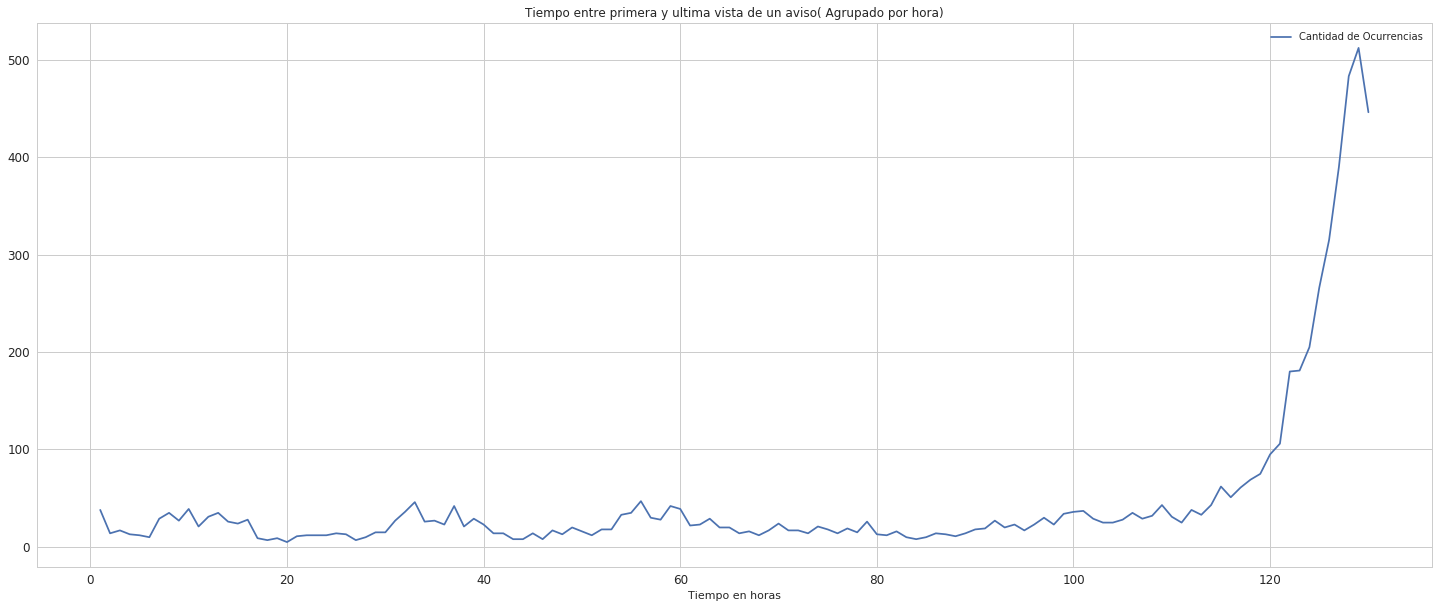

In [11]:
plt.figure(figsize = (40,10))
tmp.columns = [ 'Tiempo en horas','Cantidad de Ocurrencias']
tmp.plot(x="Tiempo en horas",y="Cantidad de Ocurrencias", title ="Tiempo entre primera y ultima vista de un aviso( Agrupado por hora)", figsize=(25, 10), legend=True, fontsize=12)

In [ ]:
## Conclusión
A partir del grafico, se puede observar que la mayoria de los avisos presentan entre que accede el primer usuario, y la utima vez que es visto, tiempo mayor